In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy as deepcopy
import math

In [64]:
reg = 10**(-1)
learning_rate = 10**(-1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
table = pd.read_csv('IA2-train.csv')
table

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,1,24,1,0,1,2630,187,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,44,1,0,1,56865,150,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,32,1,0,1,50126,188,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,56,1,0,1,45578,89,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,32,1,0,1,2630,227,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,41,1,0,0,34796,96,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,1,1,35,1,0,1,25667,53,0,0,...,0,0,0,0,0,0,0,0,0,1
5997,1,0,37,1,0,1,2630,183,0,0,...,0,0,0,0,0,0,0,1,0,1
5998,1,0,37,1,0,1,27226,138,0,0,...,0,0,0,0,0,0,0,0,0,1


# training L2

In [381]:
table = pd.read_csv('IA2-train.csv')
w = pd.Series(1, index=list(range(197)), dtype='float32')

xi = table.iloc[:,:197]

reg = 10**(-2)
learning_rate = 10**(-1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# normalizaion (age, annual_premium, vintage)
mean = []
std = []

mean.append(xi.loc[:,"Age"].mean())
std.append(xi.loc[:,"Age"].std())

mean.append(xi.loc[:,"Annual_Premium"].mean())
std.append(xi.loc[:,"Annual_Premium"].std())

mean.append(xi.loc[:,"Vintage"].mean())
std.append(xi.loc[:,"Vintage"].std())

xi.loc[:,"Age"] = (xi.loc[:,"Age"] - xi.loc[:,"Age"].mean()) / xi.loc[:,"Age"].std()
xi.loc[:,"Annual_Premium"] = (xi.loc[:,"Annual_Premium"] - xi.loc[:,"Annual_Premium"].mean()) / xi.loc[:,"Annual_Premium"].std()
xi.loc[:,"Vintage"] = (xi.loc[:,"Vintage"] - xi.loc[:,"Vintage"].mean()) / xi.loc[:,"Vintage"].std()

# result y
y = table.loc[:,['Response']]
yn = y['Response'].to_numpy()

dw = 0

# print(w)
for i in range(10000):
    print("==========Epoch ",i," ===============")
    result = yn - sigmoid(np.sum(xi.to_numpy() * w.to_numpy(),axis=1))
    result1 = np.expand_dims(result, axis=0)
    result1 = np.repeat(result1,repeats=197,axis=0)

    xr = np.multiply(xi,result1.T)
#     print(xr.to_numpy())
    w += learning_rate*(np.sum(xr,axis=0)/6000).to_numpy()
#     print(w)
    w[1:] -= reg*learning_rate*w[1:]
#     print(abs(max(abs((np.sum(xr,axis=0)/6000).to_numpy())) - dw))
    if abs(max(abs((np.sum(xr,axis=0)/6000).to_numpy())) - dw) < 10**(-7):
        print("break is worked")
        break
    dw = max(abs((np.sum(xr,axis=0)/6000).to_numpy()))
    print(dw)

#     print(reg*learning_rate*w[1:])
print(w.tolist())

data = xi.to_numpy() * w.to_numpy()
y_result = y['Response'].values.tolist()

# print(np.sum(xr.iloc[:,1:],axis=1) - xr.iloc[:,0])

predict = []
i = 0
for _ in np.sum(data,axis=1):
    if _ > 0:
        predict.append(1)
    else:
        predict.append(0)
    i += 1
    
# print(predict)
# print(y_result)
count = 0
for i in range(6000):
    if predict[i] == y_result[i]:
        count += 1

predict_acc = count / 6000
print("\n\n========predicted training accuracy========")
print(predict_acc)   

# =======================================================
# =======================================================
# =======================================================
# =======================================================


# table = pd.read_csv('IA2-dev.csv')

# xi = table.iloc[:,:197]

# xi.loc[:,"Age"] = (xi.loc[:,"Age"] - mean.pop(0)) / std.pop(0)
# xi.loc[:,"Annual_Premium"] = (xi.loc[:,"Annual_Premium"] - mean.pop(0)) / std.pop(0)
# xi.loc[:,"Vintage"] = (xi.loc[:,"Vintage"] - mean.pop(0)) / std.pop(0)

# # result y
# y = table.loc[:,['Response']]
# yn = y['Response'].to_numpy()

# data = xi.to_numpy() * w.to_numpy()
# y_result = y['Response'].values.tolist()

# # print("\n\n")
# # print(w.tolist())

# predict = []
# i = 0
# for _ in np.sum(data,axis=1):
#     if _ > 0:
#         predict.append(1)
#     else:
#         predict.append(0)
#     i += 1
    
# # print(predict)
# # print(y_result)
# count = 0
# for i in range(10000):
#     if predict[i] == y_result[i]:
#         count += 1

# predict_acc = count / 10000
# print("\n\n========predicted validation accuracy========")
# print(predict_acc) 


==========Epoch  0  ===============
0.4982959789201909
==========Epoch  1  ===============
0.4971437160427991
==========Epoch  2  ===============
0.49579489307910035
==========Epoch  3  ===============
0.4942203680330881
==========Epoch  4  ===============
0.49238816099328886
==========Epoch  5  ===============
0.490263652482496
==========Epoch  6  ===============
0.48780995366006363
==========Epoch  7  ===============
0.4849884761677499
==========Epoch  8  ===============
0.48175971998520256
==========Epoch  9  ===============
0.4780842824523782
==========Epoch  10  ===============
0.47392407105404605
==========Epoch  11  ===============
0.4692436784669799
==========Epoch  12  ===============
0.46401185392265915
==========Epoch  13  ===============
0.4582029841406755
==========Epoch  14  ===============
0.45179848385970417
==========Epoch  15  ===============
0.44478799322554724
==========Epoch  16  ===============
0.43717028821818066
==========Epoch  17  ===============
0.42895383028

0.053936330262144526
==========Epoch  146  ===============
0.05364109019405496
==========Epoch  147  ===============
0.05334877317135196
==========Epoch  148  ===============
0.053059345959977765
==========Epoch  149  ===============
0.05277277580263915
==========Epoch  150  ===============
0.052489030400116175
==========Epoch  151  ===============
0.05220807789422285
==========Epoch  152  ===============
0.051929886852262505
==========Epoch  153  ===============
0.051654426252836144
==========Epoch  154  ===============
0.05138166547287449
==========Epoch  155  ===============
0.0511115742757754
==========Epoch  156  ===============
0.05084412280054075
==========Epoch  157  ===============
0.05057928155181505
==========Epoch  158  ===============
0.050317021390738056
==========Epoch  159  ===============
0.05005731352653159
==========Epoch  160  ===============
0.04980012950874777
==========Epoch  161  ===============
0.04954544122011343
==========Epoch  162  ===============
0.0492932

0.03046056958193601
==========Epoch  289  ===============
0.030376267152748757
==========Epoch  290  ===============
0.030292592275665237
==========Epoch  291  ===============
0.030209538882963596
==========Epoch  292  ===============
0.030127100977418525
==========Epoch  293  ===============
0.030045272631396933
==========Epoch  294  ===============
0.02996404798596517
==========Epoch  295  ===============
0.02988342125000777
==========Epoch  296  ===============
0.029803386699357573
==========Epoch  297  ===============
0.02972393867593699
==========Epoch  298  ===============
0.029645071586910484
==========Epoch  299  ===============
0.02956677990384795
==========Epoch  300  ===============
0.02948905816189908
==========Epoch  301  ===============
0.0294119009589784
==========Epoch  302  ===============
0.029335302954960937
==========Epoch  303  ===============
0.029259258870888448
==========Epoch  304  ===============
0.029183763488186045
==========Epoch  305  ===============
0.029

0.022806751437235623
==========Epoch  430  ===============
0.022772948608852574
==========Epoch  431  ===============
0.022739336463174217
==========Epoch  432  ===============
0.02270591361318688
==========Epoch  433  ===============
0.022672678684571953
==========Epoch  434  ===============
0.02263963031556682
==========Epoch  435  ===============
0.02260676715682728
==========Epoch  436  ===============
0.022574087871291927
==========Epoch  437  ===============
0.022541591134048106
==========Epoch  438  ===============
0.022509275632199524
==========Epoch  439  ===============
0.02247714006473556
==========Epoch  440  ===============
0.022445183142402205
==========Epoch  441  ===============
0.022413403587574588
==========Epoch  442  ===============
0.02238180013413108
==========Epoch  443  ===============
0.022350371527329004
==========Epoch  444  ===============
0.022319116523681782
==========Epoch  445  ===============
0.022288033890837767
==========Epoch  446  ===============
0.

0.019425453212822092
==========Epoch  572  ===============
0.019409104438604118
==========Epoch  573  ===============
0.019392831772249933
==========Epoch  574  ===============
0.01937663477686623
==========Epoch  575  ===============
0.019360513018691076
==========Epoch  576  ===============
0.019344466067066548
==========Epoch  577  ===============
0.019328493494411677
==========Epoch  578  ===============
0.01931259487619563
==========Epoch  579  ===============
0.019296769790911196
==========Epoch  580  ===============
0.019281017820048547
==========Epoch  581  ===============
0.019265338548069243
==========Epoch  582  ===============
0.019249731562380516
==========Epoch  583  ===============
0.019234196453309836
==========Epoch  584  ===============
0.01921873281407966
==========Epoch  585  ===============
0.019203340240782584
==========Epoch  586  ===============
0.019188018332356536
==========Epoch  587  ===============
0.019172766690560443
==========Epoch  588  ===============


0.017786512689896224
==========Epoch  713  ===============
0.017780898435807217
==========Epoch  714  ===============
0.017775307552887837
==========Epoch  715  ===============
0.01776973992163643
==========Epoch  716  ===============
0.017764195423300055
==========Epoch  717  ===============
0.017758673939868876
==========Epoch  718  ===============
0.017753175354070325
==========Epoch  719  ===============
0.017747699549363803
==========Epoch  720  ===============
0.017742246409934954
==========Epoch  721  ===============
0.017736815820690352
==========Epoch  722  ===============
0.01773140766725191
==========Epoch  723  ===============
0.017726021835951664
==========Epoch  724  ===============
0.017720658213826398
==========Epoch  725  ===============
0.0177153166886123
==========Epoch  726  ===============
0.017709997148739914
==========Epoch  727  ===============
0.017704699483328687
==========Epoch  728  ===============
0.017699423582182055
==========Epoch  729  ===============
0

0.01718070195764863
==========Epoch  854  ===============
0.01717747420444725
==========Epoch  855  ===============
0.01717425839011425
==========Epoch  856  ===============
0.017171054461695624
==========Epoch  857  ===============
0.017167862366518107
==========Epoch  858  ===============
0.01716468205218725
==========Epoch  859  ===============
0.017161513466585766
==========Epoch  860  ===============
0.01715835655787176
==========Epoch  861  ===============
0.017155211274476948
==========Epoch  862  ===============
0.017152077565105013
==========Epoch  863  ===============
0.017148955378729753
==========Epoch  864  ===============
0.017145844664593433
==========Epoch  865  ===============
0.017142745372205195
==========Epoch  866  ===============
0.017139657451339267
==========Epoch  867  ===============
0.017136580852033265
==========Epoch  868  ===============
0.017133515524586668
==========Epoch  869  ===============
0.017130461419558988
==========Epoch  870  ===============
0.

0.016824947450675153
==========Epoch  994  ===============
0.016822978854403193
==========Epoch  995  ===============
0.016821016881984743
==========Epoch  996  ===============
0.0168190615070031
==========Epoch  997  ===============
0.016817112703164355
==========Epoch  998  ===============
0.0168151704442966
==========Epoch  999  ===============
0.016813234704349388
==========Epoch  1000  ===============
0.016811305457392966
==========Epoch  1001  ===============
0.016809382677617647
==========Epoch  1002  ===============
0.01680746633933319
==========Epoch  1003  ===============
0.016805556416968116
==========Epoch  1004  ===============
0.016803652885069065
==========Epoch  1005  ===============
0.016801755718300105
==========Epoch  1006  ===============
0.016799864891442192
==========Epoch  1007  ===============
0.016797980379392587
==========Epoch  1008  ===============
0.01679610215716398
==========Epoch  1009  ===============
0.01679423019988413
==========Epoch  1010  =========

0.01660360755755582
==========Epoch  1134  ===============
0.01660235545264459
==========Epoch  1135  ===============
0.01660110722202702
==========Epoch  1136  ===============
0.01659986285147263
==========Epoch  1137  ===============
0.01659862232681087
==========Epoch  1138  ===============
0.016597385633930418
==========Epoch  1139  ===============
0.016596152758779237
==========Epoch  1140  ===============
0.01659492368736398
==========Epoch  1141  ===============
0.016593698405750024
==========Epoch  1142  ===============
0.016592476900060944
==========Epoch  1143  ===============
0.016591259156478348
==========Epoch  1144  ===============
0.016590045161241625
==========Epoch  1145  ===============
0.01658883490064751
==========Epoch  1146  ===============
0.016587628361049978
==========Epoch  1147  ===============
0.016586425528859923
==========Epoch  1148  ===============
0.01658522639054484
==========Epoch  1149  ===============
0.01658403093262858
==========Epoch  1150  =====

0.01646127683719995
==========Epoch  1273  ===============
0.016460449204759253
==========Epoch  1274  ===============
0.016459623935527815
==========Epoch  1275  ===============
0.016458801021389528
==========Epoch  1276  ===============
0.016457980454259762
==========Epoch  1277  ===============
0.016457162226085262
==========Epoch  1278  ===============
0.016456346328844015
==========Epoch  1279  ===============
0.016455532754545112
==========Epoch  1280  ===============
0.016454721495228558
==========Epoch  1281  ===============
0.016453912542965188
==========Epoch  1282  ===============
0.016453105889856635
==========Epoch  1283  ===============
0.016452301528034948
==========Epoch  1284  ===============
0.016451499449662704
==========Epoch  1285  ===============
0.016450699646932673
==========Epoch  1286  ===============
0.016449902112067927
==========Epoch  1287  ===============
0.01644910683732142
==========Epoch  1288  ===============
0.0164483138149761
==========Epoch  1289  

0.01636633255938308
==========Epoch  1411  ===============
0.016365766074293624
==========Epoch  1412  ===============
0.016365201079809474
==========Epoch  1413  ===============
0.01636463757110661
==========Epoch  1414  ===============
0.016364075543378584
==========Epoch  1415  ===============
0.016363514991836577
==========Epoch  1416  ===============
0.01636295591170923
==========Epoch  1417  ===============
0.016362398298242577
==========Epoch  1418  ===============
0.016361842146699907
==========Epoch  1419  ===============
0.016361287452361917
==========Epoch  1420  ===============
0.01636073421052637
==========Epoch  1421  ===============
0.016360182416508343
==========Epoch  1422  ===============
0.016359632065639722
==========Epoch  1423  ===============
0.01635908315326957
==========Epoch  1424  ===============
0.016358535674763724
==========Epoch  1425  ===============
0.016357989625505033
==========Epoch  1426  ===============
0.01635744500089296
==========Epoch  1427  ==

0.016299612198312212
==========Epoch  1551  ===============
0.01629921437300782
==========Epoch  1552  ===============
0.016298817506784788
==========Epoch  1553  ===============
0.016298421596714248
==========Epoch  1554  ===============
0.01629802663987748
==========Epoch  1555  ===============
0.016297632633365883
==========Epoch  1556  ===============
0.016297239574280965
==========Epoch  1557  ===============
0.01629684745973425
==========Epoch  1558  ===============
0.016296456286847266
==========Epoch  1559  ===============
0.016296066052751523
==========Epoch  1560  ===============
0.016295676754588415
==========Epoch  1561  ===============
0.016295288389509277
==========Epoch  1562  ===============
0.016294900954675322
==========Epoch  1563  ===============
0.016294514447257456
==========Epoch  1564  ===============
0.016294128864436472
==========Epoch  1565  ===============
0.016293744203402884
==========Epoch  1566  ===============
0.016293360461356866
==========Epoch  1567 

0.016252656564882118
==========Epoch  1689  ===============
0.016252367256228552
==========Epoch  1690  ===============
0.01625207858398699
==========Epoch  1691  ===============
0.016251790546324297
==========Epoch  1692  ===============
0.016251503141413395
==========Epoch  1693  ===============
0.01625121636743327
==========Epoch  1694  ===============
0.01625093022256891
==========Epoch  1695  ===============
0.01625064470501132
==========Epoch  1696  ===============
0.016250359812957513
==========Epoch  1697  ===============
0.016250075544610547
==========Epoch  1698  ===============
0.01624979189817923
==========Epoch  1699  ===============
0.016249508871878447
==========Epoch  1700  ===============
0.01624922646392886
==========Epoch  1701  ===============
0.01624894467255714
==========Epoch  1702  ===============
0.01624866349599578
==========Epoch  1703  ===============
0.01624838293248299
==========Epoch  1704  ===============
0.016248102980262972
==========Epoch  1705  =====

0.016218042382017427
==========Epoch  1827  ===============
0.016217825883747164
==========Epoch  1828  ===============
0.016217609817995887
==========Epoch  1829  ===============
0.016217394183592495
==========Epoch  1830  ===============
0.016217178979369463
==========Epoch  1831  ===============
0.016216964204163135
==========Epoch  1832  ===============
0.016216749856813394
==========Epoch  1833  ===============
0.016216535936163817
==========Epoch  1834  ===============
0.01621632244106169
==========Epoch  1835  ===============
0.01621610937035797
==========Epoch  1836  ===============
0.0162158967229072
==========Epoch  1837  ===============
0.016215684497567495
==========Epoch  1838  ===============
0.0162154726932007
==========Epoch  1839  ===============
0.016215261308672128
==========Epoch  1840  ===============
0.016215050342850784
==========Epoch  1841  ===============
0.016214839794609213
==========Epoch  1842  ===============
0.01621462966282354
==========Epoch  1843  ===

0.01619180139182209
==========Epoch  1965  ===============
0.0161916349308457
==========Epoch  1966  ===============
0.01619146877094046
==========Epoch  1967  ===============
0.016191302911343304
==========Epoch  1968  ===============
0.016191137351293516
==========Epoch  1969  ===============
0.01619097209003267
==========Epoch  1970  ===============
0.016190807126804607
==========Epoch  1971  ===============
0.01619064246085549
==========Epoch  1972  ===============
0.016190478091433695
==========Epoch  1973  ===============
0.01619031401778997
==========Epoch  1974  ===============
0.016190150239177293
==========Epoch  1975  ===============
0.016189986754850828
==========Epoch  1976  ===============
0.016189823564068114
==========Epoch  1977  ===============
0.016189660666088783
==========Epoch  1978  ===============
0.01618949806017486
==========Epoch  1979  ===============
0.016189335745590432
==========Epoch  1980  ===============
0.01618917372160202
==========Epoch  1981  =====

0.016171379444500575
==========Epoch  2103  ===============
0.01617124820617581
==========Epoch  2104  ===============
0.01617111718250365
==========Epoch  2105  ===============
0.01617098637297714
==========Epoch  2106  ===============
0.01617085577709074
==========Epoch  2107  ===============
0.016170725394340384
==========Epoch  2108  ===============
0.016170595224223466
==========Epoch  2109  ===============
0.016170465266238842
==========Epoch  2110  ===============
0.016170335519886767
==========Epoch  2111  ===============
0.01617020598466896
==========Epoch  2112  ===============
0.01617007666008857
==========Epoch  2113  ===============
0.016169947545650154
==========Epoch  2114  ===============
0.01616981864085974
==========Epoch  2115  ===============
0.016169689945224806
==========Epoch  2116  ===============
0.01616956145825415
==========Epoch  2117  ===============
0.016169433179458015
==========Epoch  2118  ===============
0.016169305108348058
==========Epoch  2119  ====

0.01615509985636281
==========Epoch  2241  ===============
0.01615499401174997
==========Epoch  2242  ===============
0.016154888323838257
==========Epoch  2243  ===============
0.016154782792283946
==========Epoch  2244  ===============
0.016154677416744402
==========Epoch  2245  ===============
0.016154572196877773
==========Epoch  2246  ===============
0.01615446713234316
==========Epoch  2247  ===============
0.01615436222280071
==========Epoch  2248  ===============
0.01615425746791139
==========Epoch  2249  ===============
0.016154152867337124
==========Epoch  2250  ===============
0.01615404842074073
==========Epoch  2251  ===============
0.016153944127786042
==========Epoch  2252  ===============
0.016153839988137735
==========Epoch  2253  ===============
0.016153736001461402
==========Epoch  2254  ===============
0.016153632167423552
==========Epoch  2255  ===============
0.016153528485691657
==========Epoch  2256  ===============
0.016153424955934022
==========Epoch  2257  ==

In [285]:
data = xi.to_numpy() * w.to_numpy()


In [369]:
xi


,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
0,1,1,-1.171848,1,0,1,-1.605168,0.382089,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0.242588,1,0,1,1.488182,-0.060277,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,-0.606074,1,0,1,1.103816,0.394044,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1.091249,1,0,1,0.844416,-0.789583,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,-0.606074,1,0,1,-1.605168,0.860322,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0.030422,1,0,0,0.229453,-0.705892,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,1,1,-0.393909,1,0,1,-0.291229,-1.219993,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,1,0,-0.252465,1,0,1,-1.605168,0.334265,0,0,...,0,0,0,0,0,0,0,0,1,0
5998,1,0,-0.252465,1,0,1,-0.202310,-0.203747,0,0,...,0,0,0,0,0,0,0,0,0,0


In [308]:
xi.loc[:,"Age"].mean()

0.002253667954269064

In [289]:
xi

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
0,1,0,-1.242570,1,1,0,-0.259802,1.230953,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,-0.040300,1,0,1,0.288714,1.338555,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,-0.747518,1,0,1,0.226259,0.406000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,-1.101127,1,1,0,-1.605168,0.274486,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,-0.111021,1,0,1,1.489208,-1.638447,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,-1.242570,1,1,0,-0.420473,0.370133,0,0,...,1,0,0,0,0,0,0,0,0,0
9996,1,1,-0.606074,1,1,1,0.134488,-0.072233,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,1,1,0.596197,1,0,1,1.310914,1.398334,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,1,0,-1.242570,1,0,1,0.637717,-0.574378,0,0,...,1,0,0,0,0,0,0,0,0,0


# validate

In [195]:
table = pd.read_csv('IA2-dev.csv')
# w = pd.Series(1, index=list(range(197)), dtype='float32')

xi = table.iloc[:,:197]

# reg = 10**(-3)
# learning_rate = 10**(1)

print(w)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# dw = np.array(0)
# sum_dw = np.array(0)

# normalizaion (age, annual_premium, vintage)
# mean = []
# std = []

# mean.append(xi["Age"].mean())
# std.append(xi["Age"].std())

# mean.append(xi["Annual_Premium"].mean())
# std.append(xi["Annual_Premium"].std())

# mean.append(xi["Vintage"].mean())
# std.append(xi["Vintage"].std())

xi["Age"] = (xi["Age"] - mean.pop(0)) / std.pop(0)
xi["Annual_Premium"] = (xi["Annual_Premium"] - mean.pop(0)) / std.pop(0)
xi["Vintage"] = (xi["Vintage"] - mean.pop(0)) / std.pop(0)

# sum of each row
# sums=xi.sum(axis=1)

# result y
y = table.loc[:,['Response']]
yn = y['Response'].to_numpy()



# result = yn - sigmoid(np.sum(xi.to_numpy() * w.to_numpy(),axis=1))

# 6000개
# result.shape
# result1 = np.expand_dims(result, axis=0)
# result1 = np.repeat(result1,repeats=197,axis=0)

# xi = np.multiply(xi,result1.T)
# print(np.sum(xi,axis=0)/6000)
# w += learning_rate*(np.sum(xi,axis=0)/6000).to_numpy()
# print(w)
# # y - w*xi

# w[1:] -= reg*learning_rate*w[1:]
# print(w)
# for i in range(1000):
#     print("==========Epoch ",i," ===============")
#     result = yn - sigmoid(np.sum(xi.to_numpy() * w.to_numpy(),axis=1))
# #     print(result)
#     result1 = np.expand_dims(result, axis=0)
#     result1 = np.repeat(result1,repeats=197,axis=0)

#     xi = np.multiply(xi,result1.T)
#     w += learning_rate*(np.sum(xi,axis=0)/6000).to_numpy()
# #     print(w)
#     w[1:] -= reg*learning_rate*w[1:]
# #     print(10**(-3))
# #     print(abs(max(learning_rate*(np.sum(xi,axis=0)/6000).to_numpy()) < 10**(-5))
#     if abs(max(learning_rate*(np.sum(xi,axis=0)/6000).to_numpy())) < 10**(-5):
#         print("break is worked")
#         break
# #     print(reg*learning_rate*w[1:])
# print(w)

data = xi.to_numpy() * w.to_numpy()
xr = pd.DataFrame(data=data)
y_result = y['Response'].values.tolist()

# print(np.sum(xr.iloc[:,1:],axis=1) - xr.iloc[:,0])

predict = []
i = 0
for _ in np.sum(xr.iloc[:,1:],axis=1) - xr.iloc[:,0]:
    if _ > 0:
        predict.append(1)
    else:
        predict.append(0)
    i += 1
    
# print(predict)
# print(y_result)
count = 0
for i in range(10000):
    if predict[i] == y_result[i]:
        count += 1

predict_acc = count / 10000
print("\n\n========predicted accuracy========")
print(predict_acc) 

0      0.518262
1      0.185723
2      0.271782
3      0.132434
4      0.190032
         ...   
192    0.252660
193    0.254072
194    0.254187
195    0.245921
196    0.253235
Length: 197, dtype: float64


========predicted accuracy========
0.5347


<ipython-input-195-99f19681a64c>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xi["Age"] = (xi["Age"] - mean.pop(0)) / std.pop(0)
<ipython-input-195-99f19681a64c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xi["Annual_Premium"] = (xi["Annual_Premium"] - mean.pop(0)) / std.pop(0)
<ipython-input-195-99f19681a64c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [153]:
xi

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
0,1,0,-1.242570,1,1,0,-0.259802,1.230953,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,-0.040300,1,0,1,0.288714,1.338555,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,-0.747518,1,0,1,0.226259,0.406000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,-1.101127,1,1,0,-1.605168,0.274486,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,-0.111021,1,0,1,1.489208,-1.638447,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,-1.242570,1,1,0,-0.420473,0.370133,0,0,...,1,0,0,0,0,0,0,0,0,0
9996,1,1,-0.606074,1,1,1,0.134488,-0.072233,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,1,1,0.596197,1,0,1,1.310914,1.398334,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,1,0,-1.242570,1,0,1,0.637717,-0.574378,0,0,...,1,0,0,0,0,0,0,0,0,0


# training L1

In [383]:
table = pd.read_csv('IA2-train.csv')
w = pd.Series(1, index=list(range(197)), dtype='float32')

xi = table.iloc[:,:197]

reg = 10**(-3)
learning_rate = 10**(-1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sign(x):
    result = pd.Series(0, index=list(range(197)), dtype='float32')
    i =0
    for value in x:
        if value > 0:
            result[i] = 1
            i += 1
        elif value == 0:
            result[i] = 0
            i += 1 
        else:
            result[i] = -1
            i += 1
    return result
            
def max_w(w,reg,learning_rate):
    result = pd.Series(0, index=list(range(197)), dtype='float32')
    i =0
    for value in w:
        if (abs(value) - reg*learning_rate) > 0:
            result[i] = abs(value) - reg*learning_rate
            i += 1
        else:
            result[i] = 0
            i += 1
            
    return result


# normalizaion (age, annual_premium, vintage)
mean = []
std = []

mean.append(xi["Age"].mean())
std.append(xi["Age"].std())

mean.append(xi["Annual_Premium"].mean())
std.append(xi["Annual_Premium"].std())

mean.append(xi["Vintage"].mean())
std.append(xi["Vintage"].std())

xi["Age"] = (xi["Age"] - xi["Age"].mean()) / xi["Age"].std()
xi["Annual_Premium"] = (xi["Annual_Premium"] - xi["Annual_Premium"].mean()) / xi["Annual_Premium"].std()
xi["Vintage"] = (xi["Vintage"] - xi["Vintage"].mean()) / xi["Vintage"].std()

# result y
y = table.loc[:,['Response']]
yn = y['Response'].to_numpy()

# print(w)
for i in range(10000):
    print("==========Epoch ",i," ===============")
    result = yn - sigmoid(np.sum(xi.to_numpy() * w.to_numpy(),axis=1))
#     print(result)
    result1 = np.expand_dims(result, axis=0)
    result1 = np.repeat(result1,repeats=197,axis=0)

    xr = np.multiply(xi,result1.T)
    w += learning_rate*(np.sum(xr,axis=0)/6000).to_numpy()
#     print("\n===before===")
#     print(w)

    # L1 regulizaion
    sign_w = sign(w)
#     print(max_w(w,reg,learning_rate)[1:].tolist())
#     print(len(max_w(w,reg,learning_rate)[1:].tolist()))

    w[1:] = sign_w[1:]*max_w(w,reg,learning_rate)[1:]
#     print("\n===after===")

    dw = max(abs((np.sum(xr,axis=0)/6000).to_numpy()))

    if dw < 10**(-5):
        print("break is worked")
        break
#     print(reg*learning_rate*w[1:])
    print(dw)
    
print(w.tolist())

data = xi.to_numpy() * w.to_numpy()
xr = pd.DataFrame(data=data)
y_result = y['Response'].values.tolist()

# print(np.sum(xr.iloc[:,1:],axis=1) - xr.iloc[:,0])

predict = []
i = 0
for _ in np.sum(xr.iloc[:,1:],axis=1) + xr.iloc[:,0]:
    if _ > 0:
        predict.append(1)
    else:
        predict.append(0)
    i += 1
    
# print(predict)
# print(y_result)
count = 0
for i in range(6000):
    if predict[i] == y_result[i]:
        count += 1

predict_acc = count / 6000
print("\n\n========predicted training accuracy========")
print(predict_acc)   

# =======================================================
# =======================================================
# =======================================================
# =======================================================


table = pd.read_csv('IA2-dev.csv')

xi = table.iloc[:,:197]

xi["Age"] = (xi["Age"] - mean.pop(0)) / std.pop(0)
xi["Annual_Premium"] = (xi["Annual_Premium"] - mean.pop(0)) / std.pop(0)
xi["Vintage"] = (xi["Vintage"] - mean.pop(0)) / std.pop(0)

# result y
y = table.loc[:,['Response']]
yn = y['Response'].to_numpy()

data = xi.to_numpy() * w.to_numpy()
xr = pd.DataFrame(data=data)
y_result = y['Response'].values.tolist()

# print("\n\n")
# print(w.tolist())

predict = []
i = 0
for _ in np.sum(xr,axis=1):
    if _ > 0:
        predict.append(1)
    else:
        predict.append(0)
    i += 1
    
# print(predict)
# print(y_result)
count = 0
for i in range(10000):
    if predict[i] == y_result[i]:
        count += 1

predict_acc = count / 10000
print("\n\n========predicted validation accuracy========")
print(predict_acc) 


<ipython-input-383-ea678f087c53>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xi["Age"] = (xi["Age"] - xi["Age"].mean()) / xi["Age"].std()
<ipython-input-383-ea678f087c53>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xi["Annual_Premium"] = (xi["Annual_Premium"] - xi["Annual_Premium"].mean()) / xi["Annual_Premium"].std()
<ipython-input-383-ea678f087c53>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

==========Epoch  0  ===============
0.4982959789201909
==========Epoch  1  ===============
0.49716143032123744
==========Epoch  2  ===============
0.4958356517546481
==========Epoch  3  ===============
0.4942905456924352
==========Epoch  4  ===============
0.4924952919271989
==========Epoch  5  ===============
0.4904165368377409
==========Epoch  6  ===============
0.48801874372393217
==========Epoch  7  ===============
0.4852647341412597
==========Epoch  8  ===============
0.48211642306908614
==========Epoch  9  ===============
0.47853579500472976
==========Epoch  10  ===============
0.4744860321496482
==========Epoch  11  ===============
0.46993283145133624
==========Epoch  12  ===============
0.46484580105262785
==========Epoch  13  ===============
0.4591998744628104
==========Epoch  14  ===============
0.45297663939025856
==========Epoch  15  ===============
0.44616548033639736
==========Epoch  16  ===============
0.4387644649912217
==========Epoch  17  ===============
0.43078088624

0.05283697349839516
==========Epoch  146  ===============
0.05251758755775767
==========Epoch  147  ===============
0.05220115077305532
==========Epoch  148  ===============
0.05188763483310233
==========Epoch  149  ===============
0.05157700636575385
==========Epoch  150  ===============
0.051269235905028875
==========Epoch  151  ===============
0.05096429206318421
==========Epoch  152  ===============
0.0506621470700562
==========Epoch  153  ===============
0.05036277271643114
==========Epoch  154  ===============
0.05006613776079242
==========Epoch  155  ===============
0.049772214475921325
==========Epoch  156  ===============
0.04948097514138844
==========Epoch  157  ===============
0.049192391617030116
==========Epoch  158  ===============
0.04890643890128678
==========Epoch  159  ===============
0.04862308434836372
==========Epoch  160  ===============
0.04834230544729685
==========Epoch  161  ===============
0.04806407488517867
==========Epoch  162  ===============
0.0477883656

0.026756003449152795
==========Epoch  288  ===============
0.02665690538018269
==========Epoch  289  ===============
0.026558479224294065
==========Epoch  290  ===============
0.026460720604426897
==========Epoch  291  ===============
0.026363620071663364
==========Epoch  292  ===============
0.026267173670131767
==========Epoch  293  ===============
0.02617137397053824
==========Epoch  294  ===============
0.026076220023436292
==========Epoch  295  ===============
0.02598170259528817
==========Epoch  296  ===============
0.025887817022172722
==========Epoch  297  ===============
0.02579455689807011
==========Epoch  298  ===============
0.025701915600590455
==========Epoch  299  ===============
0.025609888849537844
==========Epoch  300  ===============
0.02551847036616873
==========Epoch  301  ===============
0.025427652734402433
==========Epoch  302  ===============
0.025337435918567717
==========Epoch  303  ===============
0.025247810357671197
==========Epoch  304  ===============
0.

0.017341256380951398
==========Epoch  430  ===============
0.01729756642209683
==========Epoch  431  ===============
0.0172540878190437
==========Epoch  432  ===============
0.01721082012870308
==========Epoch  433  ===============
0.017167759742202526
==========Epoch  434  ===============
0.01712490797347244
==========Epoch  435  ===============
0.017082259129356875
==========Epoch  436  ===============
0.017039817050634103
==========Epoch  437  ===============
0.01699757851703474
==========Epoch  438  ===============
0.016955539985339534
==========Epoch  439  ===============
0.0169137033230805
==========Epoch  440  ===============
0.016872065094680273
==========Epoch  441  ===============
0.016830624705828766
==========Epoch  442  ===============
0.016789378854705286
==========Epoch  443  ===============
0.016748326788260815
==========Epoch  444  ===============
0.016707467541743053
==========Epoch  445  ===============
0.016666801912665178
==========Epoch  446  ===============
0.016

0.012705363432706574
==========Epoch  573  ===============
0.01268146474326615
==========Epoch  574  ===============
0.012657654572186778
==========Epoch  575  ===============
0.012633931833614954
==========Epoch  576  ===============
0.01261029506725048
==========Epoch  577  ===============
0.012586745700204297
==========Epoch  578  ===============
0.01256328122369726
==========Epoch  579  ===============
0.01253990179910728
==========Epoch  580  ===============
0.012516608569177664
==========Epoch  581  ===============
0.012493397810687238
==========Epoch  582  ===============
0.012470272903820303
==========Epoch  583  ===============
0.012447230005181303
==========Epoch  584  ===============
0.012424270690190014
==========Epoch  585  ===============
0.012401394355194188
==========Epoch  586  ===============
0.012378600729622508
==========Epoch  587  ===============
0.012355887970308543
==========Epoch  588  ===============
0.012333255995479008
==========Epoch  589  ===============
0

0.010012147145665668
==========Epoch  715  ===============
0.009997156058060733
==========Epoch  716  ===============
0.009982210810444113
==========Epoch  717  ===============
0.009967308313463782
==========Epoch  718  ===============
0.009952450157590055
==========Epoch  719  ===============
0.009937634464715102
==========Epoch  720  ===============
0.009922862622370882
==========Epoch  721  ===============
0.00990813310028667
==========Epoch  722  ===============
0.009893445921638462
==========Epoch  723  ===============
0.009878803406786364
==========Epoch  724  ===============
0.009864202855894772
==========Epoch  725  ===============
0.00984964426990544
==========Epoch  726  ===============
0.00983512745827275
==========Epoch  727  ===============
0.00982065337597708
==========Epoch  728  ===============
0.009806221152822358
==========Epoch  729  ===============
0.009791830693267552
==========Epoch  730  ===============
0.00977748124633777
==========Epoch  731  ===============
0.

0.008260027304165262
==========Epoch  856  ===============
0.008249758305498001
==========Epoch  857  ===============
0.008239514185841545
==========Epoch  858  ===============
0.008229295804699607
==========Epoch  859  ===============
0.008219101931004728
==========Epoch  860  ===============
0.008208932614210759
==========Epoch  861  ===============
0.008198789174893877
==========Epoch  862  ===============
0.008188668960406542
==========Epoch  863  ===============
0.008178574334912621
==========Epoch  864  ===============
0.008168504098389004
==========Epoch  865  ===============
0.008158459392066721
==========Epoch  866  ===============
0.008148437558653215
==========Epoch  867  ===============
0.008138439923796731
==========Epoch  868  ===============
0.008128466409960405
==========Epoch  869  ===============
0.008118516948007937
==========Epoch  870  ===============
0.008108591631541682
==========Epoch  871  ===============
0.008098689271527114
==========Epoch  872  =============

0.007031912240169324
==========Epoch  996  ===============
0.007024437276587941
==========Epoch  997  ===============
0.007016977813115493
==========Epoch  998  ===============
0.007009533984002145
==========Epoch  999  ===============
0.007002105798813983
==========Epoch  1000  ===============
0.006994677290570192
==========Epoch  1001  ===============
0.006986841397888947
==========Epoch  1002  ===============
0.006979042769917688
==========Epoch  1003  ===============
0.006971281564552711
==========Epoch  1004  ===============
0.006963556142860422
==========Epoch  1005  ===============
0.006955866150688946
==========Epoch  1006  ===============
0.006948210359265206
==========Epoch  1007  ===============
0.006940586312116584
==========Epoch  1008  ===============
0.006932992909053715
==========Epoch  1009  ===============
0.00692543126783426
==========Epoch  1010  ===============
0.006917898571493822
==========Epoch  1011  ===============
0.006910394318442468
==========Epoch  1012  =

0.006124324500028642
==========Epoch  1133  ===============
0.006118589646727578
==========Epoch  1134  ===============
0.006112864581322502
==========Epoch  1135  ===============
0.006107151219681326
==========Epoch  1136  ===============
0.0061014475122355
==========Epoch  1137  ===============
0.006095753581917456
==========Epoch  1138  ===============
0.006090071289301072
==========Epoch  1139  ===============
0.0060843986895625255
==========Epoch  1140  ===============
0.006078736063850629
==========Epoch  1141  ===============
0.006073084784550886
==========Epoch  1142  ===============
0.006067443316406576
==========Epoch  1143  ===============
0.006061813371787427
==========Epoch  1144  ===============
0.006056194150610236
==========Epoch  1145  ===============
0.006050584284599381
==========Epoch  1146  ===============
0.006044986029717683
==========Epoch  1147  ===============
0.006039397351170708
==========Epoch  1148  ===============
0.006033818110782222
==========Epoch  114

0.00542087920165261
==========Epoch  1272  ===============
0.005416437255157265
==========Epoch  1273  ===============
0.005412002815608872
==========Epoch  1274  ===============
0.005407573524143037
==========Epoch  1275  ===============
0.0054031517695002605
==========Epoch  1276  ===============
0.005398736603292238
==========Epoch  1277  ===============
0.005394329072036939
==========Epoch  1278  ===============
0.005389928307515941
==========Epoch  1279  ===============
0.0053855349713406424
==========Epoch  1280  ===============
0.00538114818226381
==========Epoch  1281  ===============
0.005376767525724405
==========Epoch  1282  ===============
0.005372393456964183
==========Epoch  1283  ===============
0.005368026737561607
==========Epoch  1284  ===============
0.005363666644312205
==========Epoch  1285  ===============
0.005359314280088619
==========Epoch  1286  ===============
0.0053549685115066754
==========Epoch  1287  ===============
0.005350628425369411
==========Epoch  1

0.004868598944992481
==========Epoch  1410  ===============
0.004865004965715756
==========Epoch  1411  ===============
0.004861416831921306
==========Epoch  1412  ===============
0.004857832999069568
==========Epoch  1413  ===============
0.004854255013817372
==========Epoch  1414  ===============
0.004850682219564598
==========Epoch  1415  ===============
0.004847115188492117
==========Epoch  1416  ===============
0.004843552436405285
==========Epoch  1417  ===============
0.004839996540902541
==========Epoch  1418  ===============
0.004836444436024499
==========Epoch  1419  ===============
0.00483289840188551
==========Epoch  1420  ===============
0.004829357380153311
==========Epoch  1421  ===============
0.004825821944938151
==========Epoch  1422  ===============
0.004822290995573981
==========Epoch  1423  ===============
0.004818765771241104
==========Epoch  1424  ===============
0.004815245506647571
==========Epoch  1425  ===============
0.0048117310185756155
==========Epoch  14

0.004412669347156818
==========Epoch  1550  ===============
0.004409724570630246
==========Epoch  1551  ===============
0.004406783254714989
==========Epoch  1552  ===============
0.0044038454854529886
==========Epoch  1553  ===============
0.0044009112245839595
==========Epoch  1554  ===============
0.004397981732244617
==========Epoch  1555  ===============
0.004395055993568791
==========Epoch  1556  ===============
0.004392133761504843
==========Epoch  1557  ===============
0.004389215045939239
==========Epoch  1558  ===============
0.004386299877092655
==========Epoch  1559  ===============
0.004383390070699292
==========Epoch  1560  ===============
0.004380483836968601
==========Epoch  1561  ===============
0.004377580814863241
==========Epoch  1562  ===============
0.004374681283813802
==========Epoch  1563  ===============
0.004371787379994863
==========Epoch  1564  ===============
0.004368897633604752
==========Epoch  1565  ===============
0.004366011377942438
==========Epoch  

0.004043278432722941
==========Epoch  1687  ===============
0.004040815079212428
==========Epoch  1688  ===============
0.004038355101642372
==========Epoch  1689  ===============
0.004035898473680131
==========Epoch  1690  ===============
0.004033444678033873
==========Epoch  1691  ===============
0.004030994053070803
==========Epoch  1692  ===============
0.004028545575951626
==========Epoch  1693  ===============
0.004026099969316687
==========Epoch  1694  ===============
0.004023658023069622
==========Epoch  1695  ===============
0.004021218897618497
==========Epoch  1696  ===============
0.0040187826460805634
==========Epoch  1697  ===============
0.0040163498054109825
==========Epoch  1698  ===============
0.004013920271843398
==========Epoch  1699  ===============
0.00401149374703454
==========Epoch  1700  ===============
0.004009070185062733
==========Epoch  1701  ===============
0.004006648737449875
==========Epoch  1702  ===============
0.004004230324970592
==========Epoch  1

0.0037323214103839727
==========Epoch  1824  ===============
0.0037302334138936536
==========Epoch  1825  ===============
0.0037281480991639107
==========Epoch  1826  ===============
0.0037260657333585885
==========Epoch  1827  ===============
0.003723985219475316
==========Epoch  1828  ===============
0.0037219060564451004
==========Epoch  1829  ===============
0.003719829990606866
==========Epoch  1830  ===============
0.0037177564287799937
==========Epoch  1831  ===============
0.00371568479724586
==========Epoch  1832  ===============
0.0037136163379566534
==========Epoch  1833  ===============
0.003711550301962089
==========Epoch  1834  ===============
0.0037094868117261122
==========Epoch  1835  ===============
0.003707425828981704
==========Epoch  1836  ===============
0.0037053659565451477
==========Epoch  1837  ===============
0.0037033086827046777
==========Epoch  1838  ===============
0.0037012546126053572
==========Epoch  1839  ===============
0.0036992023648805957
========

0.003469332353389032
==========Epoch  1960  ===============
0.0034675453531668446
==========Epoch  1961  ===============
0.0034657600079569767
==========Epoch  1962  ===============
0.003463977552500142
==========Epoch  1963  ===============
0.0034621967930846924
==========Epoch  1964  ===============
0.0034604170437163026
==========Epoch  1965  ===============
0.0034586402209537256
==========Epoch  1966  ===============
0.0034568650310395858
==========Epoch  1967  ===============
0.003455092614668449
==========Epoch  1968  ===============
0.0034533206277693267
==========Epoch  1969  ===============
0.003451550867739489
==========Epoch  1970  ===============
0.0034497841512982448
==========Epoch  1971  ===============
0.003448017641245419
==========Epoch  1972  ===============
0.0034462539501304763
==========Epoch  1973  ===============
0.003444492029635218
==========Epoch  1974  ===============
0.003442732446025541
==========Epoch  1975  ===============
0.003440973740222774
==========

0.0032431108717025196
==========Epoch  2096  ===============
0.0032415640004001454
==========Epoch  2097  ===============
0.003240019601958133
==========Epoch  2098  ===============
0.0032384755444119354
==========Epoch  2099  ===============
0.003236934043215393
==========Epoch  2100  ===============
0.003235394068996404
==========Epoch  2101  ===============
0.003233855313424497
==========Epoch  2102  ===============
0.003232318082913403
==========Epoch  2103  ===============
0.0032307833140817715
==========Epoch  2104  ===============
0.003229248839308524
==========Epoch  2105  ===============
0.003227716947980755
==========Epoch  2106  ===============
0.003226186316786049
==========Epoch  2107  ===============
0.0032246571314157486
==========Epoch  2108  ===============
0.0032231295231976392
==========Epoch  2109  ===============
0.003221604319087702
==========Epoch  2110  ===============
0.0032200794770989526
==========Epoch  2111  ===============
0.0032185571127268334
==========E

0.003046505111628158
==========Epoch  2232  ===============
0.003045155699640128
==========Epoch  2233  ===============
0.003043806908482273
==========Epoch  2234  ===============
0.0030424598034485286
==========Epoch  2235  ===============
0.0030411140110690174
==========Epoch  2236  ===============
0.0030397693875248094
==========Epoch  2237  ===============
0.0030384258764180536
==========Epoch  2238  ===============
0.003037083724147339
==========Epoch  2239  ===============
0.0030357439202706093
==========Epoch  2240  ===============
0.0030344042143876275
==========Epoch  2241  ===============
0.0030330667268141523
==========Epoch  2242  ===============
0.003031729873068059
==========Epoch  2243  ===============
0.0030303941890576606
==========Epoch  2244  ===============
0.003029059654281969
==========Epoch  2245  ===============
0.003027726600490125
==========Epoch  2246  ===============
0.0030263957366859595
==========Epoch  2247  ===============
0.003025065017305862
==========

0.002870713122913577
==========Epoch  2371  ===============
0.0028695287518729477
==========Epoch  2372  ===============
0.0028683465320141484
==========Epoch  2373  ===============
0.002867164713950158
==========Epoch  2374  ===============
0.002865984688160275
==========Epoch  2375  ===============
0.0028648049813896894
==========Epoch  2376  ===============
0.0028636270587508316
==========Epoch  2377  ===============
0.002862449443102104
==========Epoch  2378  ===============
0.0028612735225881504
==========Epoch  2379  ===============
0.002860098310151457
==========Epoch  2380  ===============
0.002858924686577115
==========Epoch  2381  ===============
0.0028577519370755677
==========Epoch  2382  ===============
0.0028565804335107603
==========Epoch  2383  ===============
0.002855409302663011
==========Epoch  2384  ===============
0.0028542403671064243
==========Epoch  2385  ===============
0.0028530713946909583
==========Epoch  2386  ===============
0.0028519046416078703
=========

0.0027522933826232285
==========Epoch  2509  ===============
0.002751718251173225
==========Epoch  2510  ===============
0.0027511436328948495
==========Epoch  2511  ===============
0.002750569172841813
==========Epoch  2512  ===============
0.0027499952553495634
==========Epoch  2513  ===============
0.0027494219103124298
==========Epoch  2514  ===============
0.0027488486326545055
==========Epoch  2515  ===============
0.0027482758651594472
==========Epoch  2516  ===============
0.0027477040382565213
==========Epoch  2517  ===============
0.0027471318045330447
==========Epoch  2518  ===============
0.0027465601282113165
==========Epoch  2519  ===============
0.0027459893369356754
==========Epoch  2520  ===============
0.0027454180450995577
==========Epoch  2521  ===============
0.0027448473051540317
==========Epoch  2522  ===============
0.0027442774192326914
==========Epoch  2523  ===============
0.0027437082270615
==========Epoch  2524  ===============
0.002743138620695879
========

0.0026759651251890815
==========Epoch  2648  ===============
0.0026754417306923636
==========Epoch  2649  ===============
0.0026749179424052512
==========Epoch  2650  ===============
0.002674394629639846
==========Epoch  2651  ===============
0.0026738721865609207
==========Epoch  2652  ===============
0.002673349195986715
==========Epoch  2653  ===============
0.002672826676845986
==========Epoch  2654  ===============
0.0026723051909974035
==========Epoch  2655  ===============
0.0026717840736726083
==========Epoch  2656  ===============
0.002671262356242269
==========Epoch  2657  ===============
0.0026707416584570882
==========Epoch  2658  ===============
0.0026702214491993543
==========Epoch  2659  ===============
0.0026697017682734457
==========Epoch  2660  ===============
0.0026691820323497327
==========Epoch  2661  ===============
0.002668662757167876
==========Epoch  2662  ===============
0.0026681438550253803
==========Epoch  2663  ===============
0.0026676250102687163
=======

0.002606362609331024
==========Epoch  2787  ===============
0.0026058840185199336
==========Epoch  2788  ===============
0.002605405953972741
==========Epoch  2789  ===============
0.0026049286871462638
==========Epoch  2790  ===============
0.0026044517407651977
==========Epoch  2791  ===============
0.002603974382762299
==========Epoch  2792  ===============
0.002603497494427921
==========Epoch  2793  ===============
0.0026030215847957297
==========Epoch  2794  ===============
0.002602545867479195
==========Epoch  2795  ===============
0.002602070578416276
==========Epoch  2796  ===============
0.002601594712849808
==========Epoch  2797  ===============
0.002601119684956787
==========Epoch  2798  ===============
0.002600645084013704
==========Epoch  2799  ===============
0.0026001708608305685
==========Epoch  2800  ===============
0.0025996966557041315
==========Epoch  2801  ===============
0.002599222777186803
==========Epoch  2802  ===============
0.002598749378400184
==========Epo

0.002544089575220037
==========Epoch  2923  ===============
0.002543650976756104
==========Epoch  2924  ===============
0.0025432132366635662
==========Epoch  2925  ===============
0.0025427757837604213
==========Epoch  2926  ===============
0.002542338616199088
==========Epoch  2927  ===============
0.0025419019233622864
==========Epoch  2928  ===============
0.0025414652540504978
==========Epoch  2929  ===============
0.002541028880362509
==========Epoch  2930  ===============
0.002540592784167216
==========Epoch  2931  ===============
0.0025401571363141496
==========Epoch  2932  ===============
0.002539721361453627
==========Epoch  2933  ===============
0.002539285904553285
==========Epoch  2934  ===============
0.0025388508048771216
==========Epoch  2935  ===============
0.0025384159831156505
==========Epoch  2936  ===============
0.0025379820650121387
==========Epoch  2937  ===============
0.0025375474386267957
==========Epoch  2938  ===============
0.002537113387872443
==========

0.0024869942210339864
==========Epoch  3059  ===============
0.002486592397614823
==========Epoch  3060  ===============
0.002486190947209706
==========Epoch  3061  ===============
0.0024857897653713158
==========Epoch  3062  ===============
0.0024853882627931746
==========Epoch  3063  ===============
0.0024849869361050214
==========Epoch  3064  ===============
0.0024845863903343196
==========Epoch  3065  ===============
0.0024841862389158435
==========Epoch  3066  ===============
0.00248378640407847
==========Epoch  3067  ===============
0.0024833859156305673
==========Epoch  3068  ===============
0.002482986204817369
==========Epoch  3069  ===============
0.0024825867473921718
==========Epoch  3070  ===============
0.00248218761584869
==========Epoch  3071  ===============
0.0024817888904716807
==========Epoch  3072  ===============
0.0024813902875225457
==========Epoch  3073  ===============
0.0024809917072495
==========Epoch  3074  ===============
0.0024805935230642097
==========Ep

0.0024334624815675536
==========Epoch  3198  ===============
0.0024330938573196006
==========Epoch  3199  ===============
0.002432725473050432
==========Epoch  3200  ===============
0.002432357494637792
==========Epoch  3201  ===============
0.002431989798742762
==========Epoch  3202  ===============
0.0024316213124370885
==========Epoch  3203  ===============
0.002431253104694723
==========Epoch  3204  ===============
0.0024308857806406544
==========Epoch  3205  ===============
0.0024305189082335903
==========Epoch  3206  ===============
0.0024301522957351548
==========Epoch  3207  ===============
0.002429785802566957
==========Epoch  3208  ===============
0.002429419551961599
==========Epoch  3209  ===============
0.0024290533192015923
==========Epoch  3210  ===============
0.002428687330533139
==========Epoch  3211  ===============
0.002428321490994376
==========Epoch  3212  ===============
0.002427955897769517
==========Epoch  3213  ===============
0.002427590714326415
==========Ep

0.002384328814705281
==========Epoch  3337  ===============
0.0023839901498517893
==========Epoch  3338  ===============
0.0023836516254558816
==========Epoch  3339  ===============
0.0023833133316594098
==========Epoch  3340  ===============
0.002382975772201112
==========Epoch  3341  ===============
0.002382638599600061
==========Epoch  3342  ===============
0.002382300727885415
==========Epoch  3343  ===============
0.0023819631221965506
==========Epoch  3344  ===============
0.002381625632125702
==========Epoch  3345  ===============
0.0023812884435984406
==========Epoch  3346  ===============
0.0023809519780396615
==========Epoch  3347  ===============
0.0023806157459116614
==========Epoch  3348  ===============
0.0023802798978029495
==========Epoch  3349  ===============
0.0023799433673353677
==========Epoch  3350  ===============
0.0023796071397242085
==========Epoch  3351  ===============
0.002379271160615134
==========Epoch  3352  ===============
0.0023789359020020035
========

0.002340108436094275
==========Epoch  3473  ===============
0.002339796368630745
==========Epoch  3474  ===============
0.002339484526712343
==========Epoch  3475  ===============
0.0023391729050775936
==========Epoch  3476  ===============
0.0023388615085074937
==========Epoch  3477  ===============
0.0023385511333111116
==========Epoch  3478  ===============
0.0023382399522363924
==========Epoch  3479  ===============
0.002337929005050266
==========Epoch  3480  ===============
0.0023376182877591295
==========Epoch  3481  ===============
0.0023373077869756394
==========Epoch  3482  ===============
0.002336997588644841
==========Epoch  3483  ===============
0.00233668800296706
==========Epoch  3484  ===============
0.0023363786363883206
==========Epoch  3485  ===============
0.0023360685769602593
==========Epoch  3486  ===============
0.0023357587255732333
==========Epoch  3487  ===============
0.0023354491593103343
==========Epoch  3488  ===============
0.002335139823702502
==========

0.002299344886063526
==========Epoch  3609  ===============
0.002299057293876837
==========Epoch  3610  ===============
0.0022987699004184676
==========Epoch  3611  ===============
0.0022984827321574203
==========Epoch  3612  ===============
0.0022981957171043683
==========Epoch  3613  ===============
0.0022979082399152643
==========Epoch  3614  ===============
0.0022976209850447964
==========Epoch  3615  ===============
0.0022973339614274463
==========Epoch  3616  ===============
0.002297047398521067
==========Epoch  3617  ===============
0.002296761100935133
==========Epoch  3618  ===============
0.0022964751391324717
==========Epoch  3619  ===============
0.002296189280511441
==========Epoch  3620  ===============
0.0022959038740185283
==========Epoch  3621  ===============
0.002295618678342369
==========Epoch  3622  ===============
0.0022953328400623935
==========Epoch  3623  ===============
0.0022950472394367145
==========Epoch  3624  ===============
0.0022947620872615987
========

0.002261726256517884
==========Epoch  3745  ===============
0.0022614610082429152
==========Epoch  3746  ===============
0.002261195842066899
==========Epoch  3747  ===============
0.002260929973408622
==========Epoch  3748  ===============
0.0022606643739126243
==========Epoch  3749  ===============
0.0022603992331249644
==========Epoch  3750  ===============
0.002260134309077075
==========Epoch  3751  ===============
0.0022598695828776353
==========Epoch  3752  ===============
0.002259605056932943
==========Epoch  3753  ===============
0.0022593405034983275
==========Epoch  3754  ===============
0.0022590764402054416
==========Epoch  3755  ===============
0.002258812562736273
==========Epoch  3756  ===============
0.002258549030226726
==========Epoch  3757  ===============
0.002258284794703686
==========Epoch  3758  ===============
0.002258021020377695
==========Epoch  3759  ===============
0.002257757510130664
==========Epoch  3760  ===============
0.0022574941018353653
==========Ep

0.002226482770690019
==========Epoch  3883  ===============
0.0022262377903565227
==========Epoch  3884  ===============
0.0022259929375677014
==========Epoch  3885  ===============
0.0022257482749564353
==========Epoch  3886  ===============
0.0022255037968260077
==========Epoch  3887  ===============
0.0022252584880342605
==========Epoch  3888  ===============
0.0022250136497597417
==========Epoch  3889  ===============
0.002224769012849679
==========Epoch  3890  ===============
0.0022245244848273274
==========Epoch  3891  ===============
0.002224280149524678
==========Epoch  3892  ===============
0.0022240364055392853
==========Epoch  3893  ===============
0.0022237928545634665
==========Epoch  3894  ===============
0.0022235493962581955
==========Epoch  3895  ===============
0.0022233059951311048
==========Epoch  3896  ===============
0.0022230627899272252
==========Epoch  3897  ===============
0.0022228198304955283
==========Epoch  3898  ===============
0.0022225764054927422
=====

0.0021943862555619115
==========Epoch  4019  ===============
0.0021941594453847224
==========Epoch  4020  ===============
0.002193933221094718
==========Epoch  4021  ===============
0.0021937063066057197
==========Epoch  4022  ===============
0.002193479477830481
==========Epoch  4023  ===============
0.0021932529664162896
==========Epoch  4024  ===============
0.0021930265272122476
==========Epoch  4025  ===============
0.0021928002907755082
==========Epoch  4026  ===============
0.002192574414431001
==========Epoch  4027  ===============
0.0021923486124369143
==========Epoch  4028  ===============
0.002192123129196421
==========Epoch  4029  ===============
0.0021918977069398937
==========Epoch  4030  ===============
0.0021916723497329375
==========Epoch  4031  ===============
0.0021914475316468993
==========Epoch  4032  ===============
0.002191222785220291
==========Epoch  4033  ===============
0.0021909971201606294
==========Epoch  4034  ===============
0.002190771773811974
========

0.0021642607606948677
==========Epoch  4157  ===============
0.0021640513316763107
==========Epoch  4158  ===============
0.002163840938323523
==========Epoch  4159  ===============
0.0021636308705059682
==========Epoch  4160  ===============
0.0021634211662195173
==========Epoch  4161  ===============
0.0021632115209069005
==========Epoch  4162  ===============
0.002163001932835
==========Epoch  4163  ===============
0.0021627926471907873
==========Epoch  4164  ===============
0.0021625835690855856
==========Epoch  4165  ===============
0.0021623750523493946
==========Epoch  4166  ===============
0.0021621665956694873
==========Epoch  4167  ===============
0.0021619582429539637
==========Epoch  4168  ===============
0.00216175006990871
==========Epoch  4169  ===============
0.0021615419608957864
==========Epoch  4170  ===============
0.0021613339145510014
==========Epoch  4171  ===============
0.0021611252574081485
==========Epoch  4172  ===============
0.0021609169123571175
=========

0.002138197279073005
==========Epoch  4295  ===============
0.002138017898945943
==========Epoch  4296  ===============
0.0021378387085753893
==========Epoch  4297  ===============
0.002137659605328924
==========Epoch  4298  ===============
0.002137480542647413
==========Epoch  4299  ===============
0.00213730175242568
==========Epoch  4300  ===============
0.0021371230049268626
==========Epoch  4301  ===============
0.0021369434104622316
==========Epoch  4302  ===============
0.0021367643562137245
==========Epoch  4303  ===============
0.002136585360101045
==========Epoch  4304  ===============
0.0021364064224448902
==========Epoch  4305  ===============
0.0021362275772360117
==========Epoch  4306  ===============
0.0021360489327573234
==========Epoch  4307  ===============
0.0021358703330445817
==========Epoch  4308  ===============
0.00213569177588649
==========Epoch  4309  ===============
0.00213551350811305
==========Epoch  4310  ===============
0.0021353352915243757
==========Epo

0.00211407854694558
==========Epoch  4434  ===============
0.002113911332980063
==========Epoch  4435  ===============
0.0021137441558533605
==========Epoch  4436  ===============
0.002113577065864142
==========Epoch  4437  ===============
0.0021134102516714853
==========Epoch  4438  ===============
0.0021132434784805485
==========Epoch  4439  ===============
0.002113076756950925
==========Epoch  4440  ===============
0.0021129094303648202
==========Epoch  4441  ===============
0.002112742167826961
==========Epoch  4442  ===============
0.0021125749685329716
==========Epoch  4443  ===============
0.0021124080688157023
==========Epoch  4444  ===============
0.002112241466136791
==========Epoch  4445  ===============
0.00211207498499618
==========Epoch  4446  ===============
0.0021119085603438733
==========Epoch  4447  ===============
0.0021117424309254696
==========Epoch  4448  ===============
0.0021115763566645672
==========Epoch  4449  ===============
0.0021114103272786913
==========E

0.0020916215282227335
==========Epoch  4573  ===============
0.0020914660262104845
==========Epoch  4574  ===============
0.0020913105647246966
==========Epoch  4575  ===============
0.0020911552850660263
==========Epoch  4576  ===============
0.002091000058814365
==========Epoch  4577  ===============
0.0020908451116769234
==========Epoch  4578  ===============
0.0020906902401980174
==========Epoch  4579  ===============
0.002090534525282674
==========Epoch  4580  ===============
0.002090378868402184
==========Epoch  4581  ===============
0.0020902234970846603
==========Epoch  4582  ===============
0.002090068174412797
==========Epoch  4583  ===============
0.0020899128013969264
==========Epoch  4584  ===============
0.002089757713942488
==========Epoch  4585  ===============
0.0020896029225812613
==========Epoch  4586  ===============
0.002089448183243015
==========Epoch  4587  ===============
0.0020892935302385214
==========Epoch  4588  ===============
0.0020891389101847643
========

0.0020711612568844124
==========Epoch  4709  ===============
0.002071016095392893
==========Epoch  4710  ===============
0.0020708709806806294
==========Epoch  4711  ===============
0.0020707261537491924
==========Epoch  4712  ===============
0.0020705816498453817
==========Epoch  4713  ===============
0.002070437183458612
==========Epoch  4714  ===============
0.002070292740123052
==========Epoch  4715  ===============
0.002070148235282557
==========Epoch  4716  ===============
0.002070004005045537
==========Epoch  4717  ===============
0.0020698598025311885
==========Epoch  4718  ===============
0.0020697147469614374
==========Epoch  4719  ===============
0.0020695697483230735
==========Epoch  4720  ===============
0.002069425038313307
==========Epoch  4721  ===============
0.0020692803806360823
==========Epoch  4722  ===============
0.002069135814663196
==========Epoch  4723  ===============
0.0020689913026660416
==========Epoch  4724  ===============
0.002068847211245408
==========

0.002052083566599067
==========Epoch  4845  ===============
0.0020519483092844826
==========Epoch  4846  ===============
0.0020518131267206587
==========Epoch  4847  ===============
0.0020516779737410557
==========Epoch  4848  ===============
0.002051543104283193
==========Epoch  4849  ===============
0.0020514085072579273
==========Epoch  4850  ===============
0.0020512739367456135
==========Epoch  4851  ===============
0.0020511393918967043
==========Epoch  4852  ===============
0.0020510039767207863
==========Epoch  4853  ===============
0.0020508688695829226
==========Epoch  4854  ===============
0.0020507338089267094
==========Epoch  4855  ===============
0.0020505987977520214
==========Epoch  4856  ===============
0.0020504638769626906
==========Epoch  4857  ===============
0.002050329119703377
==========Epoch  4858  ===============
0.0020501944056987363
==========Epoch  4859  ===============
0.0020500597255066204
==========Epoch  4860  ===============
0.0020499250956791315
=====

0.002033911466572916
==========Epoch  4984  ===============
0.002033785088490009
==========Epoch  4985  ===============
0.002033658990203143
==========Epoch  4986  ===============
0.002033532941173987
==========Epoch  4987  ===============
0.00203340693511915
==========Epoch  4988  ===============
0.002033280960841305
==========Epoch  4989  ===============
0.0020331550584850627
==========Epoch  4990  ===============
0.0020330294354537017
==========Epoch  4991  ===============
0.0020329038560646068
==========Epoch  4992  ===============
0.002032778304446984
==========Epoch  4993  ===============
0.002032652796273947
==========Epoch  4994  ===============
0.002032527209054814
==========Epoch  4995  ===============
0.0020324019015451025
==========Epoch  4996  ===============
0.00203227663199952
==========Epoch  4997  ===============
0.0020321513889373435
==========Epoch  4998  ===============
0.0020320261936280495
==========Epoch  4999  ===============
0.002031901269208075
==========Epoch

0.002016983047576083
==========Epoch  5123  ===============
0.002016865411638019
==========Epoch  5124  ===============
0.002016747700177977
==========Epoch  5125  ===============
0.0020166300345958728
==========Epoch  5126  ===============
0.002016512414971049
==========Epoch  5127  ===============
0.002016395081797934
==========Epoch  5128  ===============
0.0020162777855162097
==========Epoch  5129  ===============
0.0020161605274881676
==========Epoch  5130  ===============
0.002016043308255552
==========Epoch  5131  ===============
0.002015926124588664
==========Epoch  5132  ===============
0.0020158092600744467
==========Epoch  5133  ===============
0.0020156924291559767
==========Epoch  5134  ===============
0.002015575632314248
==========Epoch  5135  ===============
0.0020154588588914457
==========Epoch  5136  ===============
0.0020153421276560206
==========Epoch  5137  ===============
0.002015225666415458
==========Epoch  5138  ===============
0.002015109236219469
==========Ep

0.0020015335429428667
==========Epoch  5259  ===============
0.002001423813203785
==========Epoch  5260  ===============
0.0020013143569245417
==========Epoch  5261  ===============
0.0020012049293981517
==========Epoch  5262  ===============
0.0020010955276301787
==========Epoch  5263  ===============
0.002000986151516922
==========Epoch  5264  ===============
0.0020008770430800463
==========Epoch  5265  ===============
0.002000767969035008
==========Epoch  5266  ===============
0.0020006588149252924
==========Epoch  5267  ===============
0.0020005496854747984
==========Epoch  5268  ===============
0.0020004405797810114
==========Epoch  5269  ===============
0.002000331736117552
==========Epoch  5270  ===============
0.002000222927645325
==========Epoch  5271  ===============
0.002000114142609819
==========Epoch  5272  ===============
0.0020000051914006215
==========Epoch  5273  ===============
0.0019998966505345925
==========Epoch  5274  ===============
0.0019997881382564473
========

0.0019842598549214972
==========Epoch  5395  ===============
0.001984119176592019
==========Epoch  5396  ===============
0.0019839786063416227
==========Epoch  5397  ===============
0.0019838382725352456
==========Epoch  5398  ===============
0.0019836980527465097
==========Epoch  5399  ===============
0.0019835584235058353
==========Epoch  5400  ===============
0.0019834188930114957
==========Epoch  5401  ===============
0.001983279464698027
==========Epoch  5402  ===============
0.0019831402826212896
==========Epoch  5403  ===============
0.0019830013131142982
==========Epoch  5404  ===============
0.001982862591197908
==========Epoch  5405  ===============
0.001982723094099853
==========Epoch  5406  ===============
0.001982583721674829
==========Epoch  5407  ===============
0.0019824445816610157
==========Epoch  5408  ===============
0.0019823059705198196
==========Epoch  5409  ===============
0.00198216748350648
==========Epoch  5410  ===============
0.001982029105574886
==========

0.001966148087617981
==========Epoch  5534  ===============
0.001966026025210868
==========Epoch  5535  ===============
0.0019659041492055673
==========Epoch  5536  ===============
0.00196578228185857
==========Epoch  5537  ===============
0.001965660538573263
==========Epoch  5538  ===============
0.0019655389095424485
==========Epoch  5539  ===============
0.0019654172708998482
==========Epoch  5540  ===============
0.0019652957536571264
==========Epoch  5541  ===============
0.00196517458949742
==========Epoch  5542  ===============
0.001965053549768826
==========Epoch  5543  ===============
0.001964932524478383
==========Epoch  5544  ===============
0.0019648116271911275
==========Epoch  5545  ===============
0.0019646907136620234
==========Epoch  5546  ===============
0.0019645699197561707
==========Epoch  5547  ===============
0.001964449251011203
==========Epoch  5548  ===============
0.001964328708972566
==========Epoch  5549  ===============
0.001964208184096444
==========Epoc

0.0019514277804403791
==========Epoch  5672  ===============
0.0019513265008463865
==========Epoch  5673  ===============
0.0019512253269096452
==========Epoch  5674  ===============
0.001951124136759571
==========Epoch  5675  ===============
0.0019510229245783923
==========Epoch  5676  ===============
0.0019509216965023788
==========Epoch  5677  ===============
0.001950820812691575
==========Epoch  5678  ===============
0.00195072004835448
==========Epoch  5679  ===============
0.0019506190310358779
==========Epoch  5680  ===============
0.001950518124766118
==========Epoch  5681  ===============
0.0019504172054235944
==========Epoch  5682  ===============
0.0019503162634821466
==========Epoch  5683  ===============
0.001950215659654236
==========Epoch  5684  ===============
0.001950115041644891
==========Epoch  5685  ===============
0.0019500145444914627
==========Epoch  5686  ===============
0.0019499140362035335
==========Epoch  5687  ===============
0.0019498134286868472
=========

0.0019378638534176173
==========Epoch  5808  ===============
0.0019377646393775425
==========Epoch  5809  ===============
0.0019376645506453754
==========Epoch  5810  ===============
0.001937564356362944
==========Epoch  5811  ===============
0.001937464057637379
==========Epoch  5812  ===============
0.001937363785748461
==========Epoch  5813  ===============
0.0019372636644772025
==========Epoch  5814  ===============
0.0019371638121292104
==========Epoch  5815  ===============
0.001937064083445403
==========Epoch  5816  ===============
0.0019369643689360852
==========Epoch  5817  ===============
0.0019368647985488938
==========Epoch  5818  ===============
0.001936765240363302
==========Epoch  5819  ===============
0.0019366655568761923
==========Epoch  5820  ===============
0.0019365662688430128
==========Epoch  5821  ===============
0.0019364667623090828
==========Epoch  5822  ===============
0.0019363673827408187
==========Epoch  5823  ===============
0.0019362680225427618
=======

0.0019246017298706116
==========Epoch  5946  ===============
0.0019245095383043332
==========Epoch  5947  ===============
0.0019244173709878755
==========Epoch  5948  ===============
0.0019243252373651893
==========Epoch  5949  ===============
0.001924233294766775
==========Epoch  5950  ===============
0.0019241413779462287
==========Epoch  5951  ===============
0.0019240498430052326
==========Epoch  5952  ===============
0.0019239583304495635
==========Epoch  5953  ===============
0.0019238669523420236
==========Epoch  5954  ===============
0.001923775597714469
==========Epoch  5955  ===============
0.0019236842699171346
==========Epoch  5956  ===============
0.0019235929437158028
==========Epoch  5957  ===============
0.0019235014075188346
==========Epoch  5958  ===============
0.0019234102296981884
==========Epoch  5959  ===============
0.0019233190978569495
==========Epoch  5960  ===============
0.0019232279864844712
==========Epoch  5961  ===============
0.0019231369926888775
====

0.0019126330262984948
==========Epoch  6082  ===============
0.0019125471612600584
==========Epoch  6083  ===============
0.0019124612960584918
==========Epoch  6084  ===============
0.001912375534943031
==========Epoch  6085  ===============
0.0019122897711765401
==========Epoch  6086  ===============
0.001912204134882075
==========Epoch  6087  ===============
0.0019121187262778295
==========Epoch  6088  ===============
0.0019120334392241994
==========Epoch  6089  ===============
0.001911948144064586
==========Epoch  6090  ===============
0.0019118628499941196
==========Epoch  6091  ===============
0.0019117775941739463
==========Epoch  6092  ===============
0.001911692343415893
==========Epoch  6093  ===============
0.00191160721217668
==========Epoch  6094  ===============
0.0019115223156841137
==========Epoch  6095  ===============
0.001911437424430878
==========Epoch  6096  ===============
0.0019113526660371608
==========Epoch  6097  ===============
0.001911267908391526
==========

0.0019015208604079787
==========Epoch  6218  ===============
0.0019014431820560571
==========Epoch  6219  ===============
0.0019013657572362899
==========Epoch  6220  ===============
0.0019012883921857965
==========Epoch  6221  ===============
0.0019012111503600275
==========Epoch  6222  ===============
0.0019011339268992446
==========Epoch  6223  ===============
0.0019010567208925036
==========Epoch  6224  ===============
0.0019009796569635614
==========Epoch  6225  ===============
0.0019009026142204504
==========Epoch  6226  ===============
0.0019008255827969473
==========Epoch  6227  ===============
0.0019007486809000055
==========Epoch  6228  ===============
0.0019006717942885401
==========Epoch  6229  ===============
0.0019005949135125432
==========Epoch  6230  ===============
0.001900518170600019
==========Epoch  6231  ===============
0.001900441449893533
==========Epoch  6232  ===============
0.0019003647433133797
==========Epoch  6233  ===============
0.00190028815810199
======

0.001891478134886889
==========Epoch  6354  ===============
0.001891407472537556
==========Epoch  6355  ===============
0.0018913368266343144
==========Epoch  6356  ===============
0.0018912664211612935
==========Epoch  6357  ===============
0.0018911959262928313
==========Epoch  6358  ===============
0.0018911254523377745
==========Epoch  6359  ===============
0.0018910549882800247
==========Epoch  6360  ===============
0.0018909846508859403
==========Epoch  6361  ===============
0.0018909143240552287
==========Epoch  6362  ===============
0.00189084399978831
==========Epoch  6363  ===============
0.0018907738000471586
==========Epoch  6364  ===============
0.001890703987661366
==========Epoch  6365  ===============
0.001890634216113926
==========Epoch  6366  ===============
0.001890564566165397
==========Epoch  6367  ===============
0.001890494968607309
==========Epoch  6368  ===============
0.0018904251417433083
==========Epoch  6369  ===============
0.0018903553320113607
==========

0.001882644101805089
==========Epoch  6489  ===============
0.001882584791844058
==========Epoch  6490  ===============
0.0018825254645386943
==========Epoch  6491  ===============
0.00188246599832071
==========Epoch  6492  ===============
0.0018824065044291307
==========Epoch  6493  ===============
0.0018823469843203037
==========Epoch  6494  ===============
0.0018822874437546377
==========Epoch  6495  ===============
0.0018822277806555237
==========Epoch  6496  ===============
0.001882168226201783
==========Epoch  6497  ===============
0.001882108655954744
==========Epoch  6498  ===============
0.0018820488250633324
==========Epoch  6499  ===============
0.0018819880900322254
==========Epoch  6500  ===============
0.001881927366844273
==========Epoch  6501  ===============
0.001881866576095934
==========Epoch  6502  ===============
0.001881805796587981
==========Epoch  6503  ===============
0.0018817453558120356
==========Epoch  6504  ===============
0.001881684799722051
==========Ep

0.0018745589328296335
==========Epoch  6624  ===============
0.0018745022460316594
==========Epoch  6625  ===============
0.0018744453358278985
==========Epoch  6626  ===============
0.0018743873235178962
==========Epoch  6627  ===============
0.0018743292510006845
==========Epoch  6628  ===============
0.0018742709929028146
==========Epoch  6629  ===============
0.0018742126592495223
==========Epoch  6630  ===============
0.0018741541429690039
==========Epoch  6631  ===============
0.0018740954251227073
==========Epoch  6632  ===============
0.001874036764580605
==========Epoch  6633  ===============
0.0018739781678429382
==========Epoch  6634  ===============
0.001873919523078616
==========Epoch  6635  ===============
0.0018738607088626498
==========Epoch  6636  ===============
0.0018738018505619991
==========Epoch  6637  ===============
0.0018737428141694362
==========Epoch  6638  ===============
0.00187368361036216
==========Epoch  6639  ===============
0.0018736234783157417
======

0.0018664698955349415
==========Epoch  6760  ===============
0.001866412076095643
==========Epoch  6761  ===============
0.0018663542693495977
==========Epoch  6762  ===============
0.0018662963605941539
==========Epoch  6763  ===============
0.0018662387105922982
==========Epoch  6764  ===============
0.0018661811904144509
==========Epoch  6765  ===============
0.0018661236941977188
==========Epoch  6766  ===============
0.0018660660970367638
==========Epoch  6767  ===============
0.001866008516796321
==========Epoch  6768  ===============
0.0018659509489294607
==========Epoch  6769  ===============
0.001865893512595069
==========Epoch  6770  ===============
0.001865835976255669
==========Epoch  6771  ===============
0.0018657784634406992
==========Epoch  6772  ===============
0.0018657209682577977
==========Epoch  6773  ===============
0.0018656637254837708
==========Epoch  6774  ===============
0.0018656064810211035
==========Epoch  6775  ===============
0.0018655493995528491
======

0.0018588002489790653
==========Epoch  6898  ===============
0.0018587454850002446
==========Epoch  6899  ===============
0.0018586906236988702
==========Epoch  6900  ===============
0.0018586357865176082
==========Epoch  6901  ===============
0.0018585810704074318
==========Epoch  6902  ===============
0.0018585266038161805
==========Epoch  6903  ===============
0.00185847214957775
==========Epoch  6904  ===============
0.0018584175918321324
==========Epoch  6905  ===============
0.0018583630582896173
==========Epoch  6906  ===============
0.0018583085338745185
==========Epoch  6907  ===============
0.0018582540273189405
==========Epoch  6908  ===============
0.0018581995246485675
==========Epoch  6909  ===============
0.0018581450370729277
==========Epoch  6910  ===============
0.001858090559373018
==========Epoch  6911  ===============
0.0018580361066552254
==========Epoch  6912  ===============
0.0018579816934198383
==========Epoch  6913  ===============
0.001857927421751248
======

0.0018526376256794688
==========Epoch  7033  ===============
0.0018525946885909
==========Epoch  7034  ===============
0.0018525516543931979
==========Epoch  7035  ===============
0.001852508750006826
==========Epoch  7036  ===============
0.0018524657220195836
==========Epoch  7037  ===============
0.0018524227111509774
==========Epoch  7038  ===============
0.0018523796123809469
==========Epoch  7039  ===============
0.0018523365331224375
==========Epoch  7040  ===============
0.0018522934626309005
==========Epoch  7041  ===============
0.0018522504149400356
==========Epoch  7042  ===============
0.0018522073804818375
==========Epoch  7043  ===============
0.0018521642426126584
==========Epoch  7044  ===============
0.0018521211347234854
==========Epoch  7045  ===============
0.0018520780368663278
==========Epoch  7046  ===============
0.0018520349479491677
==========Epoch  7047  ===============
0.001851991999707486
==========Epoch  7048  ===============
0.0018519490543262708
=======

0.0018468663178679288
==========Epoch  7169  ===============
0.0018468247000763185
==========Epoch  7170  ===============
0.0018467830949485814
==========Epoch  7171  ===============
0.001846741375266058
==========Epoch  7172  ===============
0.0018466997695183445
==========Epoch  7173  ===============
0.001846658173150202
==========Epoch  7174  ===============
0.001846616814829334
==========Epoch  7175  ===============
0.0018465753432224444
==========Epoch  7176  ===============
0.0018465340143656356
==========Epoch  7177  ===============
0.001846492682844985
==========Epoch  7178  ===============
0.0018464512502972515
==========Epoch  7179  ===============
0.0018464098261941088
==========Epoch  7180  ===============
0.001846368409517425
==========Epoch  7181  ===============
0.0018463268858732187
==========Epoch  7182  ===============
0.0018462854753960513
==========Epoch  7183  ===============
0.0018462440824974476
==========Epoch  7184  ===============
0.001846202689659668
========

0.0018413759868854452
==========Epoch  7305  ===============
0.00184133722873436
==========Epoch  7306  ===============
0.0018412984821367174
==========Epoch  7307  ===============
0.0018412598645327692
==========Epoch  7308  ===============
0.0018412212681847245
==========Epoch  7309  ===============
0.001841182695503925
==========Epoch  7310  ===============
0.0018411442896056887
==========Epoch  7311  ===============
0.0018411059002230842
==========Epoch  7312  ===============
0.0018410674115547205
==========Epoch  7313  ===============
0.0018410289433010553
==========Epoch  7314  ===============
0.0018409904930975264
==========Epoch  7315  ===============
0.0018409520672896384
==========Epoch  7316  ===============
0.001840913649488896
==========Epoch  7317  ===============
0.0018408751286018326
==========Epoch  7318  ===============
0.0018408366213751534
==========Epoch  7319  ===============
0.001840798135116078
==========Epoch  7320  ===============
0.0018407597825468188
=======

0.0018368865995711872
==========Epoch  7443  ===============
0.001836857653169682
==========Epoch  7444  ===============
0.0018368286902536877
==========Epoch  7445  ===============
0.0018367997088884127
==========Epoch  7446  ===============
0.001836770600360122
==========Epoch  7447  ===============
0.0018367414877895998
==========Epoch  7448  ===============
0.0018367123760850514
==========Epoch  7449  ===============
0.0018366833876034467
==========Epoch  7450  ===============
0.0018366542811267981
==========Epoch  7451  ===============
0.001836625172441351
==========Epoch  7452  ===============
0.0018365960533555097
==========Epoch  7453  ===============
0.0018365669203333473
==========Epoch  7454  ===============
0.0018365377775319768
==========Epoch  7455  ===============
0.0018365088675532134
==========Epoch  7456  ===============
0.001836479955176507
==========Epoch  7457  ===============
0.0018364509173372223
==========Epoch  7458  ===============
0.0018364218841070842
======

0.001833010370013746
==========Epoch  7579  ===============
0.0018329826952667924
==========Epoch  7580  ===============
0.0018329550300427615
==========Epoch  7581  ===============
0.0018329277230925871
==========Epoch  7582  ===============
0.0018329003085319543
==========Epoch  7583  ===============
0.001832872903686332
==========Epoch  7584  ===============
0.0018328455159764472
==========Epoch  7585  ===============
0.0018328181409526009
==========Epoch  7586  ===============
0.001832790652943477
==========Epoch  7587  ===============
0.0018327631938532835
==========Epoch  7588  ===============
0.0018327357469082527
==========Epoch  7589  ===============
0.0018327083092399825
==========Epoch  7590  ===============
0.0018326808942562636
==========Epoch  7591  ===============
0.0018326533700229462
==========Epoch  7592  ===============
0.0018326259627896525
==========Epoch  7593  ===============
0.001832598568650584
==========Epoch  7594  ===============
0.0018325711960922966
======

0.0018293846571880447
==========Epoch  7715  ===============
0.0018293590845341132
==========Epoch  7716  ===============
0.001829333517349298
==========Epoch  7717  ===============
0.001829307962101185
==========Epoch  7718  ===============
0.0018292824172920644
==========Epoch  7719  ===============
0.0018292568972681814
==========Epoch  7720  ===============
0.0018292312720035043
==========Epoch  7721  ===============
0.0018292056568974685
==========Epoch  7722  ===============
0.001829180063803366
==========Epoch  7723  ===============
0.0018291544835258423
==========Epoch  7724  ===============
0.0018291288005317687
==========Epoch  7725  ===============
0.0018291032423858112
==========Epoch  7726  ===============
0.001829077700378754
==========Epoch  7727  ===============
0.0018290521774021276
==========Epoch  7728  ===============
0.0018290266623783304
==========Epoch  7729  ===============
0.0018290010559677975
==========Epoch  7730  ===============
0.0018289754637585726
======

0.0018260079980012502
==========Epoch  7851  ===============
0.001825983706955094
==========Epoch  7852  ===============
0.0018259594229660108
==========Epoch  7853  ===============
0.0018259348842508218
==========Epoch  7854  ===============
0.0018259103314654914
==========Epoch  7855  ===============
0.0018258856301281768
==========Epoch  7856  ===============
0.0018258607848368135
==========Epoch  7857  ===============
0.0018258359175764263
==========Epoch  7858  ===============
0.0018258109158162056
==========Epoch  7859  ===============
0.0018257860093614008
==========Epoch  7860  ===============
0.0018257610805650876
==========Epoch  7861  ===============
0.0018257359102732918
==========Epoch  7862  ===============
0.0018257107343714449
==========Epoch  7863  ===============
0.0018256854217943263
==========Epoch  7864  ===============
0.0018256599648445342
==========Epoch  7865  ===============
0.001825634488420695
==========Epoch  7866  ===============
0.0018256088889062785
====

0.0018223033137862027
==========Epoch  7986  ===============
0.0018222738857630089
==========Epoch  7987  ===============
0.0018222443214218856
==========Epoch  7988  ===============
0.0018222149880290565
==========Epoch  7989  ===============
0.0018221854984488714
==========Epoch  7990  ===============
0.0018221558808813577
==========Epoch  7991  ===============
0.0018221262507831962
==========Epoch  7992  ===============
0.0018220966202290587
==========Epoch  7993  ===============
0.0018220668665087504
==========Epoch  7994  ===============
0.0018220371026753726
==========Epoch  7995  ===============
0.001822007096005549
==========Epoch  7996  ===============
0.0018219769695336744
==========Epoch  7997  ===============
0.0018219468347212531
==========Epoch  7998  ===============
0.0018219166942840992
==========Epoch  7999  ===============
0.001821886440599948
==========Epoch  8000  ===============
0.001821856177371889
==========Epoch  8001  ===============
0.001821825851133046
======

0.0018180434959210118
==========Epoch  8121  ===============
0.001818011409519792
==========Epoch  8122  ===============
0.001817979275602784
==========Epoch  8123  ===============
0.0018179472872548856
==========Epoch  8124  ===============
0.0018179152459290122
==========Epoch  8125  ===============
0.0018178832089587405
==========Epoch  8126  ===============
0.0018178511273895508
==========Epoch  8127  ===============
0.0018178190597308989
==========Epoch  8128  ===============
0.0018177869434145026
==========Epoch  8129  ===============
0.001817754840432899
==========Epoch  8130  ===============
0.0018177227530129293
==========Epoch  8131  ===============
0.0018176906126839184
==========Epoch  8132  ===============
0.0018176584807149986
==========Epoch  8133  ===============
0.0018176263092614603
==========Epoch  8134  ===============
0.00181759414873262
==========Epoch  8135  ===============
0.001817561938850228
==========Epoch  8136  ===============
0.0018175299451795113
========

0.0018139523979380995
==========Epoch  8257  ===============
0.00181392201685015
==========Epoch  8258  ===============
0.0018138915953322975
==========Epoch  8259  ===============
0.001813861421908826
==========Epoch  8260  ===============
0.0018138312001209557
==========Epoch  8261  ===============
0.0018138009875470465
==========Epoch  8262  ===============
0.0018137707246171175
==========Epoch  8263  ===============
0.0018137404773909012
==========Epoch  8264  ===============
0.0018137101891226356
==========Epoch  8265  ===============
0.0018136799075682834
==========Epoch  8266  ===============
0.0018136495843215563
==========Epoch  8267  ===============
0.0018136192678399035
==========Epoch  8268  ===============
0.0018135889808506202
==========Epoch  8269  ===============
0.0018135586452991993
==========Epoch  8270  ===============
0.001813528317998333
==========Epoch  8271  ===============
0.0018134979473878805
==========Epoch  8272  ===============
0.0018134675872076595
======

0.0018099252574144912
==========Epoch  8393  ===============
0.0018098974614980117
==========Epoch  8394  ===============
0.0018098696020192745
==========Epoch  8395  ===============
0.001809841656998325
==========Epoch  8396  ===============
0.001809813634985715
==========Epoch  8397  ===============
0.001809785536219409
==========Epoch  8398  ===============
0.0018097572795190153
==========Epoch  8399  ===============
0.001809728952566249
==========Epoch  8400  ===============
0.0018097007769343396
==========Epoch  8401  ===============
0.0018096724288611122
==========Epoch  8402  ===============
0.0018096440696894211
==========Epoch  8403  ===============
0.0018096156338178284
==========Epoch  8404  ===============
0.0018095871352506417
==========Epoch  8405  ===============
0.0018095586195569415
==========Epoch  8406  ===============
0.0018095300294161578
==========Epoch  8407  ===============
0.0018095013734287962
==========Epoch  8408  ===============
0.0018094726621571008
======

0.0018059101442436487
==========Epoch  8528  ===============
0.001805879770565221
==========Epoch  8529  ===============
0.0018058493993467369
==========Epoch  8530  ===============
0.001805818980280975
==========Epoch  8531  ===============
0.0018057885774478495
==========Epoch  8532  ===============
0.001805758177335699
==========Epoch  8533  ===============
0.0018057277238205038
==========Epoch  8534  ===============
0.001805697275810806
==========Epoch  8535  ===============
0.001805666780799011
==========Epoch  8536  ===============
0.0018056362964924883
==========Epoch  8537  ===============
0.001805605770329072
==========Epoch  8538  ===============
0.0018055752462161347
==========Epoch  8539  ===============
0.00180554561390406
==========Epoch  8540  ===============
0.0018055161533247054
==========Epoch  8541  ===============
0.0018054857444503177
==========Epoch  8542  ===============
0.0018054563554344102
==========Epoch  8543  ===============
0.0018054269074190396
==========

0.0018034601229675075
==========Epoch  8663  ===============
0.0018034382338921332
==========Epoch  8664  ===============
0.0018034163364068529
==========Epoch  8665  ===============
0.001803394381068936
==========Epoch  8666  ===============
0.0018033723563914623
==========Epoch  8667  ===============
0.0018033502664894455
==========Epoch  8668  ===============
0.001803328227750946
==========Epoch  8669  ===============
0.0018033061247750854
==========Epoch  8670  ===============
0.0018032839704837105
==========Epoch  8671  ===============
0.0018032617519313128
==========Epoch  8672  ===============
0.0018032396205358908
==========Epoch  8673  ===============
0.0018032174329024292
==========Epoch  8674  ===============
0.001803195182268394
==========Epoch  8675  ===============
0.0018031728771948211
==========Epoch  8676  ===============
0.001803150502642786
==========Epoch  8677  ===============
0.0018031283130426493
==========Epoch  8678  ===============
0.001803106058911628
=======

0.0018003176662959941
==========Epoch  8799  ===============
0.0018002936696895552
==========Epoch  8800  ===============
0.0018002696800064324
==========Epoch  8801  ===============
0.0018002456331515399
==========Epoch  8802  ===============
0.001800221640271833
==========Epoch  8803  ===============
0.0018001975897240837
==========Epoch  8804  ===============
0.0018001736914041754
==========Epoch  8805  ===============
0.0018001499692886884
==========Epoch  8806  ===============
0.0018001262354241927
==========Epoch  8807  ===============
0.0018001024432819565
==========Epoch  8808  ===============
0.0018000786655047254
==========Epoch  8809  ===============
0.0018000548281286131
==========Epoch  8810  ===============
0.0018000309430416094
==========Epoch  8811  ===============
0.0018000070091897266
==========Epoch  8812  ===============
0.0017999830790102578
==========Epoch  8813  ===============
0.0017999590902531709
==========Epoch  8814  ===============
0.0017999350548332754
===

0.0017974541246053193
==========Epoch  8935  ===============
0.0017974380973723983
==========Epoch  8936  ===============
0.0017974221117498944
==========Epoch  8937  ===============
0.0017974060609966358
==========Epoch  8938  ===============
0.0017973899705201462
==========Epoch  8939  ===============
0.001797373816150266
==========Epoch  8940  ===============
0.001797357586559117
==========Epoch  8941  ===============
0.0017973413204747833
==========Epoch  8942  ===============
0.001797324986319492
==========Epoch  8943  ===============
0.001797308591896702
==========Epoch  8944  ===============
0.0017972921565777818
==========Epoch  8945  ===============
0.0017972756541017483
==========Epoch  8946  ===============
0.0017972590761182131
==========Epoch  8947  ===============
0.0017972424561946408
==========Epoch  8948  ===============
0.0017972257892950759
==========Epoch  8949  ===============
0.0017972090611584294
==========Epoch  8950  ===============
0.0017971925224198385
======

0.0017949905921133488
==========Epoch  9071  ===============
0.001794969918253616
==========Epoch  9072  ===============
0.0017949491632881008
==========Epoch  9073  ===============
0.0017949283247818257
==========Epoch  9074  ===============
0.00179490741377784
==========Epoch  9075  ===============
0.001794886424320957
==========Epoch  9076  ===============
0.0017948654656565158
==========Epoch  9077  ===============
0.001794844430471566
==========Epoch  9078  ===============
0.001794823326254387
==========Epoch  9079  ===============
0.0017948023807987218
==========Epoch  9080  ===============
0.0017947815112505966
==========Epoch  9081  ===============
0.001794760594841349
==========Epoch  9082  ===============
0.0017947396055354083
==========Epoch  9083  ===============
0.0017947185474753333
==========Epoch  9084  ===============
0.0017946974303649995
==========Epoch  9085  ===============
0.001794676228738375
==========Epoch  9086  ===============
0.0017946549968563153
==========

0.0017919702604765142
==========Epoch  9206  ===============
0.0017919469162751263
==========Epoch  9207  ===============
0.0017919235523935315
==========Epoch  9208  ===============
0.001791900135173047
==========Epoch  9209  ===============
0.0017918766839788323
==========Epoch  9210  ===============
0.0017918532118298047
==========Epoch  9211  ===============
0.00179182967648331
==========Epoch  9212  ===============
0.0017918064616133929
==========Epoch  9213  ===============
0.0017917832146380475
==========Epoch  9214  ===============
0.0017917599130907766
==========Epoch  9215  ===============
0.0017917365912886408
==========Epoch  9216  ===============
0.0017917132165183093
==========Epoch  9217  ===============
0.0017916899483241752
==========Epoch  9218  ===============
0.0017916666507555702
==========Epoch  9219  ===============
0.0017916433016649986
==========Epoch  9220  ===============
0.0017916199347647356
==========Epoch  9221  ===============
0.001791596533953023
======

0.001788959499407481
==========Epoch  9341  ===============
0.0017889480356436123
==========Epoch  9342  ===============
0.0017889362034257358
==========Epoch  9343  ===============
0.0017889242694611098
==========Epoch  9344  ===============
0.0017889122201252125
==========Epoch  9345  ===============
0.0017889000849248809
==========Epoch  9346  ===============
0.0017888878579232514
==========Epoch  9347  ===============
0.0017888753852014912
==========Epoch  9348  ===============
0.0017888628135107178
==========Epoch  9349  ===============
0.001788850386232487
==========Epoch  9350  ===============
0.0017888377347801648
==========Epoch  9351  ===============
0.00178882500319668
==========Epoch  9352  ===============
0.001788812169279926
==========Epoch  9353  ===============
0.001788799121268506
==========Epoch  9354  ===============
0.0017887859831145156
==========Epoch  9355  ===============
0.001788772757444989
==========Epoch  9356  ===============
0.0017887594494238133
=========

0.0017867411084040103
==========Epoch  9477  ===============
0.0017867224014562221
==========Epoch  9478  ===============
0.0017867036528287402
==========Epoch  9479  ===============
0.0017866848800712758
==========Epoch  9480  ===============
0.0017866660580623996
==========Epoch  9481  ===============
0.001786647192273911
==========Epoch  9482  ===============
0.001786628288615156
==========Epoch  9483  ===============
0.001786609356718967
==========Epoch  9484  ===============
0.0017865903704636231
==========Epoch  9485  ===============
0.001786571362865778
==========Epoch  9486  ===============
0.0017865523071387956
==========Epoch  9487  ===============
0.0017865332331920268
==========Epoch  9488  ===============
0.001786514114200008
==========Epoch  9489  ===============
0.0017864949581199816
==========Epoch  9490  ===============
0.001786475762904944
==========Epoch  9491  ===============
0.0017864565283117497
==========Epoch  9492  ===============
0.0017864372733962799
========

0.0017840707278749465
==========Epoch  9613  ===============
0.0017840500660241405
==========Epoch  9614  ===============
0.0017840293794546865
==========Epoch  9615  ===============
0.0017840086631265794
==========Epoch  9616  ===============
0.0017839879150021018
==========Epoch  9617  ===============
0.0017839671480170856
==========Epoch  9618  ===============
0.0017839463389460756
==========Epoch  9619  ===============
0.0017839263766713368
==========Epoch  9620  ===============
0.001783906501743339
==========Epoch  9621  ===============
0.0017838865671997188
==========Epoch  9622  ===============
0.001783866568074089
==========Epoch  9623  ===============
0.001783846522937407
==========Epoch  9624  ===============
0.0017838264265819847
==========Epoch  9625  ===============
0.0017838062692598668
==========Epoch  9626  ===============
0.0017837860647134788
==========Epoch  9627  ===============
0.0017837662745216732
==========Epoch  9628  ===============
0.001783746444148542
======

0.0017781175942791526
==========Epoch  9748  ===============
0.0017776722751909695
==========Epoch  9749  ===============
0.00177724084169945
==========Epoch  9750  ===============
0.0017768224736261068
==========Epoch  9751  ===============
0.0017764161137412398
==========Epoch  9752  ===============
0.0017760227181687167
==========Epoch  9753  ===============
0.001775640671956926
==========Epoch  9754  ===============
0.0017752689435674533
==========Epoch  9755  ===============
0.0017749085475433552
==========Epoch  9756  ===============
0.0017745580638271075
==========Epoch  9757  ===============
0.0017742180934264148
==========Epoch  9758  ===============
0.001773887883361309
==========Epoch  9759  ===============
0.0017735668970108858
==========Epoch  9760  ===============
0.0017732547900225128
==========Epoch  9761  ===============
0.0017729506503314165
==========Epoch  9762  ===============
0.0017726556098039176
==========Epoch  9763  ===============
0.001772368191296577
=======

0.0017587649514121768
==========Epoch  9885  ===============
0.0017587134162741496
==========Epoch  9886  ===============
0.0017586618758154001
==========Epoch  9887  ===============
0.0017586104878530423
==========Epoch  9888  ===============
0.0017585590985460995
==========Epoch  9889  ===============
0.00175850796714385
==========Epoch  9890  ===============
0.001758456835723816
==========Epoch  9891  ===============
0.0017584058543420524
==========Epoch  9892  ===============
0.0017583548920928423
==========Epoch  9893  ===============
0.00175830407278308
==========Epoch  9894  ===============
0.0017582532575269277
==========Epoch  9895  ===============
0.0017582024599073467
==========Epoch  9896  ===============
0.001758151805701411
==========Epoch  9897  ===============
0.001758101168217746
==========Epoch  9898  ===============
0.001758050684573781
==========Epoch  9899  ===============
0.0017580002121767432
==========Epoch  9900  ===============
0.0017579488874013517
==========



========predicted validation accuracy========
0.7941


<ipython-input-383-ea678f087c53>:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xi["Age"] = (xi["Age"] - mean.pop(0)) / std.pop(0)
<ipython-input-383-ea678f087c53>:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xi["Annual_Premium"] = (xi["Annual_Premium"] - mean.pop(0)) / std.pop(0)
<ipython-input-383-ea678f087c53>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [250]:
def max_w(w,reg,learning_rate):
    result = pd.Series(0, index=list(range(197)), dtype='float32')
    i =0
    for value in w:
        if abs(value) - reg*learning_rate > 0:
            result[i] = abs(value) - reg*learning_rate
            i += 1
        else:
            result[i] = 0
            
    return result

In [254]:
max_w(w,reg,learning_rate)

0      0.834575
1      0.019361
2      0.123067
3      0.102039
4      0.079228
         ...   
192    0.267801
193    0.271432
194    0.271861
195    0.255972
196    0.269329
Length: 197, dtype: float32

In [251]:
w

0     -0.844575
1      0.029361
2      0.133067
3     -0.112039
4      0.089228
         ...   
192    0.277801
193    0.281432
194    0.281861
195    0.265972
196    0.279329
Length: 197, dtype: float64

In [255]:
abs(w) - reg*learning_rate
    

0      0.834575
1      0.019361
2      0.123067
3      0.102039
4      0.079228
         ...   
192    0.267801
193    0.271432
194    0.271861
195    0.255972
196    0.269329
Length: 197, dtype: float64

In [240]:
def sign(x):
    i =0
    for value in x:
        if value > 0:
            x[i] = 1
            i += 1
        elif value == 0:
            x[i] = 0
            i += 1 
        else:
            x[i] = -1
            i += 1
            

In [231]:
w

0     -0.900922
1     -0.135819
2      0.555606
3     -0.890702
4      0.070934
         ...   
192    0.978943
193    0.998044
194    1.000000
195    0.907906
196    0.986440
Length: 197, dtype: float64

In [232]:
sign(w)
w

0     -1.0
1     -1.0
2      1.0
3     -1.0
4      1.0
      ... 
192    1.0
193    1.0
194    1.0
195    1.0
196    1.0
Length: 197, dtype: float64

In [117]:
w

0      0.950718
1      0.000042
2      0.000044
3      0.000041
4      0.000042
         ...   
192    0.000043
193    0.000043
194    0.000043
195    0.000043
196    0.000043
Length: 197, dtype: float64

In [92]:
xr.iloc[:,0]

0       1.423097e-32
1       6.968418e-34
2       1.512399e-33
3       4.336812e-34
4       5.164827e-33
            ...     
5995    3.846467e-32
5996    8.871777e-33
5997    1.608348e-32
5998    6.977803e-33
5999    2.743797e-34
Name: 0, Length: 6000, dtype: float64

In [102]:
predict = []
i = 0
for _ in np.sum(xr.iloc[:,1:],axis=1) - xr.iloc[:,0]:
    if _ > 0:
        predict.append(1)
    else:
        predict.append(0)
    i += 1

In [113]:
y_result = y['Response'].values.tolist()

In [115]:
count = 0
for i in range(6000):
    if predict[i] == y_result[i]:
        count += 1

predict_acc = count / 6000
print(predict_acc)

0.5173333333333333


In [6]:
xi

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
0,1,1,-1.171848,1,0,1,-1.605168,0.382089,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0.242588,1,0,1,1.488182,-0.060277,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,-0.606074,1,0,1,1.103816,0.394044,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1.091249,1,0,1,0.844416,-0.789583,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,-0.606074,1,0,1,-1.605168,0.860322,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0.030422,1,0,0,0.229453,-0.705892,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,1,1,-0.393909,1,0,1,-0.291229,-1.219993,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,1,0,-0.252465,1,0,1,-1.605168,0.334265,0,0,...,0,0,0,0,0,0,0,0,1,0
5998,1,0,-0.252465,1,0,1,-0.202310,-0.203747,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
result1

NameError: name 'result1' is not defined

In [200]:
xi.to_numpy() * w.to_numpy()

array([[ 1.        ,  1.        , -1.1718484 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.24258755, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        , -0.60607402, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.        , -0.25246503, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.        , -0.25246503, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        ,  1.8691889 , ...,  0.        ,
         0.        ,  0.        ]])

In [199]:
(np.sum(xi.to_numpy() * w.to_numpy(),axis=1))

array([4.60507169, 7.67049202, 6.89178617, ..., 4.47663173, 5.34147793,
       9.55567298])

In [54]:
xi

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
0,1.0,1.0,-1.171848,1.0,0.0,1.0,-1.605168,0.382089,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.242588,1.0,0.0,1.0,1.488182,-0.060277,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,-0.606074,1.0,0.0,1.0,1.103816,0.394044,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.091249,1.0,0.0,1.0,0.844416,-0.789583,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,-0.606074,1.0,0.0,1.0,-1.605168,0.860322,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.0,0.0,0.030422,1.0,0.0,0.0,0.229453,-0.705892,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5996,1.0,1.0,-0.393909,1.0,0.0,1.0,-0.291229,-1.219993,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5997,1.0,0.0,-0.252465,1.0,0.0,1.0,-1.605168,0.334265,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5998,1.0,0.0,-0.252465,1.0,0.0,1.0,-0.202310,-0.203747,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
sums=xi.sum(axis=1)

In [15]:
sums

0       4.605072
1       7.670492
2       6.891786
3       8.146082
4       5.649079
          ...   
5995    4.553983
5996    5.094869
5997    4.476632
5998    5.341478
5999    9.555673
Length: 6000, dtype: float64

In [61]:
for _ in range(6000):
    sums[_] = sigmoid(sums[_])

In [18]:
sigmoid(sums[0])

0.9900980442874465

In [29]:
sum(((y.to_numpy()[0][0] - sigmoid(sums[0])) * xi.iloc[0,:]).to_numpy())

0.045599215912715214

In [19]:
y = table.loc[:,['Response']]

In [13]:
yn = y['Response'].to_numpy()

In [76]:
result = yn - sums

In [75]:
xi.shape

(6000, 197)

In [26]:
result

NameError: name 'result' is not defined

In [77]:
result.shape

(6000,)

In [89]:
(result[0] * xi.iloc[0,:])

dummy                       0.009902
Gender                      0.009902
Age                        -0.011604
Driving_License             0.009902
Previously_Insured          0.000000
                              ...   
Policy_Sales_Channel_157    0.000000
Policy_Sales_Channel_158    0.000000
Policy_Sales_Channel_159    0.000000
Policy_Sales_Channel_160    0.000000
Policy_Sales_Channel_163    0.000000
Name: 0, Length: 197, dtype: float64

In [100]:
len((result[1] * xi.iloc[1,:]).to_numpy() + (result[0] * xi.iloc[0,:]).to_numpy())

197

In [118]:
dw = (result[0] * xi.iloc[0,:]).to_numpy()

In [120]:
dw + (result[1] * xi.iloc[1,:]).to_numpy()

array([ 0.01036813,  0.00990196, -0.0114905 ,  0.01036813,  0.        ,
        0.01036813, -0.01520056,  0.00375532,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00046617,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00990196,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01036813,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [137]:
result

0       0.009902
1       0.000466
2       0.001015
3       0.000290
4       0.003508
          ...   
5995   -0.989584
5996    0.006091
5997    0.011244
5998    0.004766
5999   -0.999929
Length: 6000, dtype: float64

In [138]:
xi

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
0,1.0,1.0,-1.171848,1.0,0.0,1.0,-1.605168,0.382089,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.242588,1.0,0.0,1.0,1.488182,-0.060277,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,-0.606074,1.0,0.0,1.0,1.103816,0.394044,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.091249,1.0,0.0,1.0,0.844416,-0.789583,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,-0.606074,1.0,0.0,1.0,-1.605168,0.860322,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.0,0.0,0.030422,1.0,0.0,0.0,0.229453,-0.705892,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5996,1.0,1.0,-0.393909,1.0,0.0,1.0,-0.291229,-1.219993,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5997,1.0,0.0,-0.252465,1.0,0.0,1.0,-1.605168,0.334265,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5998,1.0,0.0,-0.252465,1.0,0.0,1.0,-0.202310,-0.203747,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
dw = np.array(0)
sum_dw = np.array(0)

for i in range(10000):    
    for _ in range(6000):
        dw = ((result[_] * xi.iloc[_,:])).to_numpy()
        sum_dw = np.add(sum_dw,dw)

    sum((sum_dw)/6000) * alpha

In [172]:
sum((sum_dw)/6000) * alpha

-0.31574180484243053

In [170]:
alpha = 10**(-1)


In [176]:
w

0      1.010368
1      1.009902
2      0.988509
3      1.010368
4      1.000000
         ...   
192    1.000000
193    1.000000
194    1.000000
195    1.000000
196    1.000000
Length: 197, dtype: float64

<AxesSubplot:title={'center':'training_acc / valid_acc as the λ value varies'}, xlabel='regularization parameter(10**(x))', ylabel='accuracy(%)'>

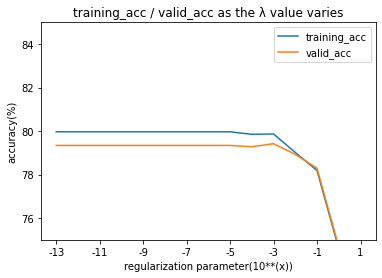

In [423]:
data = [[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.7985,0.7928],[0.798666667,0.7942],[0.790166667,0.7893],[0.781833333,0.7829],[0.745833333,0.7467],[0.504666667,0.5066]]

acc_data = pd.DataFrame(data,columns=['training_acc','valid_acc'],index=['-13', '-12', '-11', '-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','0','1'])
acc_data = acc_data*100  
acc_data.plot(ylim=(75,85),title="training_acc / valid_acc as the λ value varies",xlabel="regularization parameter(10**(x))",ylabel="accuracy(%)")


In [394]:
d = {'training_acc':[0.799666667,0.799666667,0.799666667,0.799666667,0.799666667,0.799666667,],'valid_acc':[]}

In [409]:
acc_data

,training_acc,valid_acc
0,79.966667,79.34
1,79.966667,79.34
2,79.966667,79.34
3,79.966667,79.34
4,79.966667,79.34
5,79.966667,79.34
6,79.966667,79.34
7,79.966667,79.34
8,79.850000,79.28
9,79.866667,79.42


In [574]:
data = [[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.7985,0.7928],[0.798666667,0.7942],[0.790166667,0.7893],[0.781833333,0.7829],[0.745833333,0.7467],[0.504666667,0.5066]]

acc_data = pd.DataFrame(data,columns=['training_acc','valid_acc'],index=['-13', '-12', '-11', '-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','0','1'])
acc_data = acc_data*100

acc_data
# acc_data.plot(ylim=(78,82),title="training_acc / valid_acc as the λ value varies",xlabel="regularization parameter(10**(x))",ylabel="accuracy(%)")


,training_acc,valid_acc
-13,79.966667,79.34
-12,79.966667,79.34
-11,79.966667,79.34
-10,79.966667,79.34
-9,79.966667,79.34
-8,79.966667,79.34
-7,79.966667,79.34
-6,79.966667,79.34
-5,79.966667,79.34
-4,79.850000,79.28


best regularization para = 10**(-3)

10**(-3)의 best w is 

In [425]:
best = [-1.8880073079702318, 0.04405891782522549, -0.3754146919034199, -0.27572148977389177, -2.584157691647018, 2.1443828659481325, 0.04687182342521992, -0.061216713890377195, 0.0017410420080636129, 0.36741808971252155, 0.35400225535585084, 0.9604945958776238, 0.3585212374848623, 0.48570541382112326, 0.5521064654741058, 0.3742816805580841, 0.20263256654627884, 0.13287022182047445, 0.5331335806716806, 0.44218771167370446, 0.4442717252572889, 0.5240538977288928, 0.5374535616817863, 0.029728663713423167, 0.3924594135988752, 0.16900971085832842, 0.374441123588835, 0.5603360223489294, 0.16456166197914324, 0.26515865953750767, 0.09833238579063629, 0.37643989929465427, 0.4570086498989285, 0.11896554580505879, 0.22945137995524936, 0.37661652957875236, 0.5118009396890655, 0.5585052284128811, 0.386299337633963, 0.4690834061822394, 0.21896574178392963, 0.10910727305194425, 0.7032469141309611, 0.6831835673245849, 0.31924894697671524, 0.005701760484081768, 0.49867258115862945, 0.4376723334212539, 0.398424057120022, 0.5202255156180529, 0.38409604976909656, 0.40141676694675943, 0.3608764034231195, 0.2898718466844702, 0.22683787405002523, 0.09531611558991557, -0.012053358200141273, 0.3105742812638367, -0.14444828059929507, 0.4142456384108633, 0.3282454773420837, 0.07004601631476738, -0.3391952159536935, 0.23459698728215606, 0.47065420889612203, 0.36786104643292905, 0.5815022641699029, 0.6082428442758676, 0.40653880477287685, 0.3175957575316019, 0.37881497177452583, 0.3396382365031566, 0.14941613717298438, 0.3520435230653055, 0.32874099490529074, 0.4862705793141957, 0.2214404566849279, 0.021186911791577986, 0.4105213659151319, 0.3613001438116317, 0.3679614970654289, 0.36786104643292905, 0.31227289729470137, 0.24503588588862357, 0.3350694316027412, 0.47436562272162486, 0.6651778134233809, 0.8286969106862547, 0.36786104643292905, 0.36786104643292905, 0.3517018221665251, 0.39484984395261763, 0.5020954195671785, 0.36786104643292905, 0.39806283159246175, 0.36786104643292905, 0.3503496360317179, 0.36786104643292905, 0.36786104643292905, 0.3952147664898837, 0.4014877051427848, 0.36786104643292905, 0.35362249315950833, 0.36786104643292905, 0.363922092401822, 0.4018227307955209, 0.2937196196046728, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.33672586201027854, 0.36786104643292905, 0.4039209650549812, 0.3383945372214281, 0.39411189700557087, 0.36786104643292905, 0.36786104643292905, 0.39384561142223845, 0.5043985504955891, 0.2975170758839547, 0.36786104643292905, 0.317771727032382, 0.3100279981629344, 0.3122939551963271, 0.3657194615940177, 0.36786104643292905, 0.3636700604352399, 0.36786104643292905, 0.3066356339979132, 0.36590787444343603, 0.36786104643292905, 0.36786104643292905, 0.4014484454723651, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.36522812636596963, 0.36786104643292905, 0.36786104643292905, 0.4019532956258066, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.3929915972828222, 0.36786104643292905, 0.3614519745683298, 0.36391309730199545, 0.28121955183422426, 0.36786104643292905, 0.3904137423330054, 0.33562593530315543, 0.36786104643292905, 0.36786104643292905, 0.2135422950423009, 0.36786104643292905, 0.36786104643292905, 0.36121292911802044, 0.3960143333347951, 0.2503295040864666, 0.36786104643292905, 0.7143985210648585, 0.12169504766201995, 0.36786104643292905, 0.41121161268911693, 0.31813632622196647, 0.36786104643292905, 0.39244811806712, 0.30657360059921723, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.2983524566373073, 0.34731094317631905, 0.35733073228808604, 0.36786104643292905, 0.32667319816947665, 0.3192178312200283, 0.4069470561076368, 0.3653862719818564, 0.34431562480846695, 0.30795176348295517, 0.3545010841243389, 0.1776650045706933, -0.41103381764255503, 0.30558613450502625, 0.5926245636236047, 0.5336075407164408, 0.4590167618764321, 0.8049464505162917, 0.3908811683544599, 0.36786104643292905, -1.0153970270496662, 0.5719454160067934]

In [429]:
abs_list = []
for _ in best:
    abs_list.append(abs(_))

In [430]:
abs_list

[1.8880073079702318,
 0.04405891782522549,
 0.3754146919034199,
 0.27572148977389177,
 2.584157691647018,
 2.1443828659481325,
 0.04687182342521992,
 0.061216713890377195,
 0.0017410420080636129,
 0.36741808971252155,
 0.35400225535585084,
 0.9604945958776238,
 0.3585212374848623,
 0.48570541382112326,
 0.5521064654741058,
 0.3742816805580841,
 0.20263256654627884,
 0.13287022182047445,
 0.5331335806716806,
 0.44218771167370446,
 0.4442717252572889,
 0.5240538977288928,
 0.5374535616817863,
 0.029728663713423167,
 0.3924594135988752,
 0.16900971085832842,
 0.374441123588835,
 0.5603360223489294,
 0.16456166197914324,
 0.26515865953750767,
 0.09833238579063629,
 0.37643989929465427,
 0.4570086498989285,
 0.11896554580505879,
 0.22945137995524936,
 0.37661652957875236,
 0.5118009396890655,
 0.5585052284128811,
 0.386299337633963,
 0.4690834061822394,
 0.21896574178392963,
 0.10910727305194425,
 0.7032469141309611,
 0.6831835673245849,
 0.31924894697671524,
 0.005701760484081768,
 0.49867

In [490]:
best = [-2.13999302557034, 0.03551426199828656, -0.40978651491956886, -1.1465547950227213, -3.192162905979158, 2.2363191305645027, 0.046688344637599695, -0.06396271045502806, 0.40606285334615966, 0.9808523549269845, 0.9358418867704167, 1.7478644126611518, 0.9386683681684261, 1.145659886492831, 1.240451149418829, 0.9432100874678839, 0.7484616759567699, 0.6074268590133758, 1.2127932210724912, 1.0431769860890814, 1.0937464272836603, 1.1852088903999005, 1.1998758935751697, 0.5393287107962653, 1.0035757298470516, 0.6819205442953751, 0.9430630008722121, 1.2514693052435055, 0.6651984106252783, 0.8174205215546186, 0.5645667774312522, 0.9756263946839246, 1.086138732118839, 0.5973599526886386, 0.7571480812621021, 0.9825089213384576, 1.068786967274186, 1.203822855416285, 0.9752042848553633, 1.1409571504372822, 0.7466895295480345, 0.591910483262625, 1.4838510927945763, 1.3745119376093613, 0.903463780645858, 0.45229249249214004, 1.1544853194956155, 1.0207835186202772, 1.02955482261943, 1.119398940763369, 1.0086599706534074, 1.0185652844340152, 0.9745965509399208, 0.8528801090468082, 0.7873328054868824, 0.589319943893136, 0.42035910258587195, 0.8916198836434707, 0.2789768993870892, 1.0580149842985378, 0.9204501240916976, -0.0038181487946972645, -0.32374993727525214, 0.18619151581995505, 1.1355052606107212, 0.9900498287989168, 1.2922596655211924, 1.3368575192206262, 1.0309252717604167, 0.9083965170433381, 0.9994248203728286, 0.9397687933084743, 0.6399075913660743, 0.9472998679362863, 0.9067379540576225, 1.1663287369334134, 0.7619777049481711, 0.44909442525518006, 1.0532451161318666, 0.9775548969133762, 0.9855872740857745, 0.9900498287989168, 0.9007386100487541, 0.7882984158551882, 0.9257115738253419, 1.13272763312625, 1.3941794355767765, 1.4157962261487498, 0.9900498287989168, 0.9900498287989168, 0.9523123256059544, 1.0107043518622336, 1.1591260565261807, 0.9900498287989168, 1.036166180910407, 0.9900498287989168, 0.9614972891171581, 0.9900498287989168, 0.9900498287989168, 1.0315393854694566, 1.041882807671443, 0.9900498287989168, 0.9621606518234196, 0.9900498287989168, 0.9843461524748262, 1.0413593828770205, 0.871047402817707, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 0.9217446772031388, 0.9900498287989168, 1.0443666112782548, 0.9264660782082373, 1.0295829602424122, 0.9900498287989168, 0.9900498287989168, 1.0291572902073862, 1.1932915478463761, 0.8768739605206163, 0.9900498287989168, 0.9115292904163175, 0.8992194944815766, 0.9028593371924614, 0.9860995052718889, 0.9900498287989168, 0.9822323563350898, 0.9900498287989168, 0.8938654044733605, 0.9864065298638219, 0.9900498287989168, 0.9900498287989168, 1.0394851585412463, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 0.9783629495937711, 0.9900498287989168, 0.9900498287989168, 1.0405323488216414, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 1.0266459649453743, 0.9900498287989168, 0.9796698432494897, 0.9842999211618918, 0.8493344013676137, 0.9900498287989168, 1.0223152982332984, 0.9359038726348904, 0.9900498287989168, 0.9900498287989168, 0.7413788408754004, 0.9900498287989168, 0.9900498287989168, 0.9619191680721286, 1.0303292905397272, 0.7989805879647622, 0.9900498287989168, 1.2847911108423895, 0.5966350131156052, 0.9900498287989168, 1.052137059011649, 0.9116820602293669, 0.9900498287989168, 1.0256052558302633, 0.8912185404883113, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 0.8783995104922859, 0.9472201763657863, 0.9727104781841768, 0.9900498287989168, 0.9222385388088926, 0.9130491046006682, 1.0398977751303655, 0.9855504012912001, 0.9501364314476239, 0.8948762355869105, 0.9550059466491982, 0.6524370802988803, 0.01888677599127993, 0.8825779705295261, 1.1878304784384268, 1.1845982425238617, 1.0108335412126963, 1.452959869025843, 1.0168568351615201, 0.9900498287989168, -0.8947107754476481, 1.186017577506526]
max_list = []
abs_list = []
abs_list2 = []

for _ in best:
    abs_list.append(abs(_))

for _ in best:
    abs_list2.append(abs(_))  
    
m = max(abs_list)
for _ in range(6):
    for i,v in enumerate(abs_list2):
        if v==m:
            max_list.append([abs_list.index(v),v])
            abs_list2.pop(i)
            m = max(abs_list2)
            break
# [max_list.append([i,v]) for i,v in enumerate(abs_list) if v == m]

In [491]:
max_list

[[4, 3.192162905979158],
 [5, 2.2363191305645027],
 [0, 2.13999302557034],
 [11, 1.7478644126611518],
 [42, 1.4838510927945763],
 [192, 1.452959869025843]]

In [488]:
max_list

[[4, 3.192162905979158],
 [5, 2.2363191305645027],
 [0, 2.13999302557034],
 [11, 1.7478644126611518],
 [42, 1.4838510927945763],
 [192, 1.452959869025843]]

In [494]:
xi.iloc[:,192]

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Policy_Sales_Channel_157, Length: 10000, dtype: int64

In [ ]:
best 10**(-3)

1:Previously_Insured
2:Vehicle_Damage
3:dummy
4:Policy_Sales_Channel_160
5:Region_Code_3
6:Policy_Sales_Channel_26


best+ (larger) 10**(-2)

1:Vehicle_Damage
2:Previously_Insured
3:dummy
4:Policy_Sales_Channel_26
5:Policy_Sales_Channel_152
6:Policy_Sales_Channel_160


best_ (smaller) 10**(-4)

1:Previously_Insured
2:Vehicle_Damage
3:dummy
4:Region_Code_3
5:Driving_License
6:Policy_Sales_Channel_26

================================

best__ / best++

10(-1)

1:Vehicle_Damage
2:Previously_Insured
3:dummy
4:Policy_Sales_Channel_152
5:Vehicle_Age_1
6:Vehicle_Age_0


10(-5)

1:Previously_Insured
2:Vehicle_Damage
3:dummy
4:Region_Code_3
5:Region_Code_34
6:Policy_Sales_Channel_157

 

In [523]:
# -7 -1
w_list = [-2.143019010038607, 0.035394907226345515, -0.41021590952572085, -1.1610605934368743, -3.201479919188036, 2.237356652320221, 0.046684567920804845, -0.06399756469668244, 0.41288978550107114, 0.990544907747479, 0.9450532136406199, 1.7597871817929551, 0.947857112864147, 1.1559503245344973, 1.2510864475345642, 0.9521393252583193, 0.7571756262862095, 0.6151765339216324, 1.2233249254145249, 1.0525801292637669, 1.1039059007977474, 1.195486494147108, 1.2101664529054548, 0.5476306469754626, 1.0132032252775713, 0.6902372724281733, 0.9520460812373369, 1.2621748013833987, 0.6733492985955547, 0.8262450302718468, 0.5722611894188018, 0.9850988353199435, 1.0959752460159171, 0.605207201343225, 0.7656443328165324, 0.9920640557160474, 1.077634057032064, 1.2138428491303324, 0.9844533521577744, 1.1514411072662707, 0.7551847737220703, 0.5997867132596701, 1.4957920752899927, 1.3851358908079427, 0.9126979785100944, 0.45972596801547233, 1.1647147173235661, 1.029952876783895, 1.0394850241451037, 1.1287599549745344, 1.0185232730373168, 1.0282671344961618, 0.9843147998285697, 0.8618258045569189, 0.7962502280613409, 0.5973692720970037, 0.427573607765229, 0.9008761805719704, 0.2860856170176911, 1.068147360673858, 0.9298652283261386, -0.004879230369600583, -0.32358984271990016, 0.18543624638369752, 1.1458808537134748, 0.9999000049993331, 1.3032253410982682, 1.3480703190857544, 1.0407025816307083, 0.9177574478742184, 1.009223924366682, 0.9493026115535566, 0.6478918279220391, 0.956729468526249, 0.9158789777700655, 1.1769316695756853, 0.7706820530278492, 0.4562697392682484, 1.0633615803246201, 0.987312100609432, 0.995359117863553, 0.9999000049993331, 0.9101216805923296, 0.7970417729829776, 0.9350870527381756, 1.1429897784710883, 1.4053335548450492, 1.4249510783917614, 0.9999000049993331, 0.9999000049993331, 0.9618139130274038, 1.0203661890335518, 1.1693393959820042, 0.9999000049993331, 1.0462247280913024, 0.9999000049993331, 0.9711888875815301, 0.9999000049993331, 0.9999000049993331, 1.0415769982222942, 1.0519679246958087, 0.9999000049993331, 0.9718073007941345, 0.9999000049993331, 0.9941704830328665, 1.051438481144962, 0.8802811170867406, 0.9999000049993331, 0.9999000049993331, 0.9999000049993331, 0.9310128420859295, 0.9999000049993331, 1.0544538726868247, 0.9357762780288299, 1.0396083177291309, 0.9999000049993331, 0.9999000049993331, 1.0391803922592726, 1.2040144443477006, 0.886115246502976, 0.9999000049993331, 0.9209865840852058, 0.9086173336891822, 0.9122760203648492, 0.995921322798546, 0.9999000049993331, 0.9920256969429743, 0.9999000049993331, 0.9032369211946523, 0.9962302707913896, 0.9999000049993331, 0.9999000049993331, 1.0495390688748083, 0.9999000049993331, 0.9999000049993331, 0.9999000049993331, 0.9999000049993331, 0.9880670053090705, 0.9999000049993331, 0.9999000049993331, 1.0505953962192434, 0.9999000049993331, 0.9999000049993331, 0.9999000049993331, 0.9999000049993331, 0.9999000049993331, 0.9999000049993331, 1.0366438318608502, 0.9999000049993331, 0.9894601589395865, 0.9941238189200942, 0.8584325217433201, 0.9999000049993331, 1.032288925628865, 0.9454387558056834, 0.9999000049993331, 0.9999000049993331, 0.7499183788300727, 0.9999000049993331, 0.9999000049993331, 0.9714079939389642, 1.0403327195897385, 0.8076916857130522, 0.9999000049993331, 1.2937387778050373, 0.6044418043342227, 0.9999000049993331, 1.0622213446689208, 0.9211366691760702, 0.9999000049993331, 1.03559630995807, 0.9005490458008463, 0.9999000049993331, 0.9999000049993331, 0.9999000049993331, 0.8876672492791512, 0.9567356331640129, 0.9824562046708389, 0.9999000049993331, 0.9317041536045608, 0.9225075212412712, 1.0498599942229632, 0.9953691500261024, 0.9597479547712313, 0.9042396652154472, 0.9645116784534532, 0.6601230447989479, 0.025971428275285095, 0.8917885503865552, 1.1970699107464193, 1.194678081742599, 1.0195272676245315, 1.4628803231418583, 1.0267253092504443, 0.9999000049993331, -0.8917779174076387, 1.19552267748247]

count = 0
for _ in w_list:
    if abs(_) < 0.05:
        count += 1
        print(_)
        
print("\n\n=============sparsity==================================")
print(count/197)



0.035394907226345515
0.046684567920804845
-0.004879230369600583
0.025971428275285095


=============sparsity==================================
0.02030456852791878


In [516]:
# -5 -1
w_list = [-2.13999302557034, 0.03551426199828656, -0.40978651491956886, -1.1465547950227213, -3.192162905979158, 2.2363191305645027, 0.046688344637599695, -0.06396271045502806, 0.40606285334615966, 0.9808523549269845, 0.9358418867704167, 1.7478644126611518, 0.9386683681684261, 1.145659886492831, 1.240451149418829, 0.9432100874678839, 0.7484616759567699, 0.6074268590133758, 1.2127932210724912, 1.0431769860890814, 1.0937464272836603, 1.1852088903999005, 1.1998758935751697, 0.5393287107962653, 1.0035757298470516, 0.6819205442953751, 0.9430630008722121, 1.2514693052435055, 0.6651984106252783, 0.8174205215546186, 0.5645667774312522, 0.9756263946839246, 1.086138732118839, 0.5973599526886386, 0.7571480812621021, 0.9825089213384576, 1.068786967274186, 1.203822855416285, 0.9752042848553633, 1.1409571504372822, 0.7466895295480345, 0.591910483262625, 1.4838510927945763, 1.3745119376093613, 0.903463780645858, 0.45229249249214004, 1.1544853194956155, 1.0207835186202772, 1.02955482261943, 1.119398940763369, 1.0086599706534074, 1.0185652844340152, 0.9745965509399208, 0.8528801090468082, 0.7873328054868824, 0.589319943893136, 0.42035910258587195, 0.8916198836434707, 0.2789768993870892, 1.0580149842985378, 0.9204501240916976, -0.0038181487946972645, -0.32374993727525214, 0.18619151581995505, 1.1355052606107212, 0.9900498287989168, 1.2922596655211924, 1.3368575192206262, 1.0309252717604167, 0.9083965170433381, 0.9994248203728286, 0.9397687933084743, 0.6399075913660743, 0.9472998679362863, 0.9067379540576225, 1.1663287369334134, 0.7619777049481711, 0.44909442525518006, 1.0532451161318666, 0.9775548969133762, 0.9855872740857745, 0.9900498287989168, 0.9007386100487541, 0.7882984158551882, 0.9257115738253419, 1.13272763312625, 1.3941794355767765, 1.4157962261487498, 0.9900498287989168, 0.9900498287989168, 0.9523123256059544, 1.0107043518622336, 1.1591260565261807, 0.9900498287989168, 1.036166180910407, 0.9900498287989168, 0.9614972891171581, 0.9900498287989168, 0.9900498287989168, 1.0315393854694566, 1.041882807671443, 0.9900498287989168, 0.9621606518234196, 0.9900498287989168, 0.9843461524748262, 1.0413593828770205, 0.871047402817707, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 0.9217446772031388, 0.9900498287989168, 1.0443666112782548, 0.9264660782082373, 1.0295829602424122, 0.9900498287989168, 0.9900498287989168, 1.0291572902073862, 1.1932915478463761, 0.8768739605206163, 0.9900498287989168, 0.9115292904163175, 0.8992194944815766, 0.9028593371924614, 0.9860995052718889, 0.9900498287989168, 0.9822323563350898, 0.9900498287989168, 0.8938654044733605, 0.9864065298638219, 0.9900498287989168, 0.9900498287989168, 1.0394851585412463, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 0.9783629495937711, 0.9900498287989168, 0.9900498287989168, 1.0405323488216414, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 1.0266459649453743, 0.9900498287989168, 0.9796698432494897, 0.9842999211618918, 0.8493344013676137, 0.9900498287989168, 1.0223152982332984, 0.9359038726348904, 0.9900498287989168, 0.9900498287989168, 0.7413788408754004, 0.9900498287989168, 0.9900498287989168, 0.9619191680721286, 1.0303292905397272, 0.7989805879647622, 0.9900498287989168, 1.2847911108423895, 0.5966350131156052, 0.9900498287989168, 1.052137059011649, 0.9116820602293669, 0.9900498287989168, 1.0256052558302633, 0.8912185404883113, 0.9900498287989168, 0.9900498287989168, 0.9900498287989168, 0.8783995104922859, 0.9472201763657863, 0.9727104781841768, 0.9900498287989168, 0.9222385388088926, 0.9130491046006682, 1.0398977751303655, 0.9855504012912001, 0.9501364314476239, 0.8948762355869105, 0.9550059466491982, 0.6524370802988803, 0.01888677599127993, 0.8825779705295261, 1.1878304784384268, 1.1845982425238617, 1.0108335412126963, 1.452959869025843, 1.0168568351615201, 0.9900498287989168, -0.8947107754476481, 1.186017577506526]


count = 0
for _ in w_list:
    if abs(_) < 0.05:
        count += 1
        print(_)
        
print("\n\n=============sparsity==================================")
print(count/197)


0.03551426199828656
0.046688344637599695
-0.0038181487946972645
0.01888677599127993


=============sparsity==================================
0.02030456852791878


In [522]:
# -4 -1
w_list = [-1.9258901849504586, 0.03300739424828426, -0.4067987873886869, -1.3486308369724593, -2.9421207657448045, 2.2279844201280925, 0.05044042950173807, -0.0612307741098666, 0.6045605018502174, 0.9408923229472936, 0.9113150839686197, 1.5148652204684414, 0.9238861872365332, 1.033481506253195, 1.0757253457683658, 0.9130931388088476, 0.7193468531763021, 0.6969973439849156, 1.0571665845990044, 0.9790634872193911, 0.9901645479657559, 1.0739990279254048, 1.0877047350414657, 0.5354630585709963, 0.953606899554553, 0.7515062815791872, 0.9189338629274962, 1.1022526967936677, 0.7566026946825485, 0.8361992343017591, 0.7135281478320495, 0.9433939482844461, 1.0025187149405583, 0.7196854754001558, 0.8048868679851461, 0.9364998037569314, 1.0375515510253177, 1.0959662114033, 0.9150985986463783, 1.0204642203985608, 0.79876713623739, 0.6214545692186171, 1.2260498424450277, 1.2266970630987666, 0.8514545157523418, 0.5682395593840479, 1.0537574416964801, 0.9816929082375919, 0.958792673534459, 1.0637738594429167, 0.9594339702898148, 0.957693070569618, 0.9399334737069703, 0.8203375588963673, 0.7319661730583633, 0.6042237373831338, 0.5407216878706691, 0.8933809826119372, 0.3345386852954606, 0.9852728066127711, 0.9093485961832408, 0.08615677592519701, -0.3136565111548977, 0.285667250637777, 1.021312631038272, 0.9507156590282949, 1.1068782500614405, 1.128389654736458, 0.9427684801794284, 0.8590413400638025, 0.9520201044579709, 0.9269570133902898, 0.72794247354348, 0.92485532959585, 0.8718551782625937, 1.0344506827286888, 0.8065326764264933, 0.6411197298454361, 0.9814881952335135, 0.9395535134252141, 0.9473823200366929, 0.9507156590282949, 0.9037947325528762, 0.8406173135812329, 0.9099830790160828, 1.0120596481499613, 1.1760743103753994, 1.3485173704620148, 0.9507156590282949, 0.9507156590282949, 0.9171897082269034, 0.9356388850372558, 1.0345572097587528, 0.9507156590282949, 0.9716883933037839, 0.9507156590282949, 0.9341583206365265, 0.9507156590282949, 0.9507156590282949, 0.9714626285180952, 0.9718698488473492, 0.9507156590282949, 0.9351109188033778, 0.9507156590282949, 0.9463291040432918, 0.975748950106624, 0.8913090689829264, 0.9507156590282949, 0.9507156590282949, 0.9507156590282949, 0.8972434201310281, 0.9507156590282949, 0.9751697986240574, 0.8962792445269833, 0.9702363427868792, 0.9507156590282949, 0.9507156590282949, 0.9699664883227213, 1.0513790692960667, 0.8814398076253043, 0.9507156590282949, 0.906298336577036, 0.9019742541921592, 0.9037605973639821, 0.9472145041635565, 0.9507156590282949, 0.9437718628250545, 0.9507156590282949, 0.8997399703183183, 0.9474762440584357, 0.9507156590282949, 0.9507156590282949, 0.9729546012643769, 0.9507156590282949, 0.9507156590282949, 0.9507156590282949, 0.9507156590282949, 0.9437017277881609, 0.9507156590282949, 0.9507156590282949, 0.9746068015660336, 0.9507156590282949, 0.9507156590282949, 0.9507156590282949, 0.9507156590282949, 0.9507156590282949, 0.9507156590282949, 0.9681495998992299, 0.9507156590282949, 0.9422393857524726, 0.9462958514145854, 0.8782801623594108, 0.9507156590282949, 0.9659181449002513, 0.9178870926900173, 0.9507156590282949, 0.9507156590282949, 0.8188144818630524, 0.9507156590282949, 0.9507156590282949, 0.9199076820046991, 0.9701424025913529, 0.7201791198874385, 0.9507156590282949, 1.2232110625547497, 0.7331128249003865, 0.9507156590282949, 0.9777083475962973, 0.9076066124104147, 0.9507156590282949, 0.9681148518696293, 0.8996317187842857, 0.9507156590282949, 0.9507156590282949, 0.9507156590282949, 0.8939692509116138, 0.9244352830442241, 0.9357796966449192, 0.9507156590282949, 0.9085638152853821, 0.9096704014014148, 0.9751264507469332, 0.946810016523054, 0.9258349768460226, 0.899706378052997, 0.925975182973502, 0.7303921904680738, 0.029148341575960645, 0.894062597345952, 1.1042413280097527, 1.0506754388816013, 0.9551885470432115, 1.3380737940052132, 0.961553073000394, 0.9507156590282949, -0.6601244950045425, 1.0894154706642636]

count = 0
for _ in w_list:
    if abs(_) < 0.1:
        count += 1
        print(_)
        
print("\n\n=============sparsity==================================")
print(count/197)


0.03300739424828426
0.05044042950173807
-0.0612307741098666
0.08615677592519701
0.029148341575960645


=============sparsity==================================
0.025380710659898477


In [521]:
# -3 -1
w_list = [-1.8880073079702318, 0.04405891782522549, -0.3754146919034199, -0.27572148977389177, -2.584157691647018, 2.1443828659481325, 0.04687182342521992, -0.061216713890377195, 0.0017410420080636129, 0.36741808971252155, 0.35400225535585084, 0.9604945958776238, 0.3585212374848623, 0.48570541382112326, 0.5521064654741058, 0.3742816805580841, 0.20263256654627884, 0.13287022182047445, 0.5331335806716806, 0.44218771167370446, 0.4442717252572889, 0.5240538977288928, 0.5374535616817863, 0.029728663713423167, 0.3924594135988752, 0.16900971085832842, 0.374441123588835, 0.5603360223489294, 0.16456166197914324, 0.26515865953750767, 0.09833238579063629, 0.37643989929465427, 0.4570086498989285, 0.11896554580505879, 0.22945137995524936, 0.37661652957875236, 0.5118009396890655, 0.5585052284128811, 0.386299337633963, 0.4690834061822394, 0.21896574178392963, 0.10910727305194425, 0.7032469141309611, 0.6831835673245849, 0.31924894697671524, 0.005701760484081768, 0.49867258115862945, 0.4376723334212539, 0.398424057120022, 0.5202255156180529, 0.38409604976909656, 0.40141676694675943, 0.3608764034231195, 0.2898718466844702, 0.22683787405002523, 0.09531611558991557, -0.012053358200141273, 0.3105742812638367, -0.14444828059929507, 0.4142456384108633, 0.3282454773420837, 0.07004601631476738, -0.3391952159536935, 0.23459698728215606, 0.47065420889612203, 0.36786104643292905, 0.5815022641699029, 0.6082428442758676, 0.40653880477287685, 0.3175957575316019, 0.37881497177452583, 0.3396382365031566, 0.14941613717298438, 0.3520435230653055, 0.32874099490529074, 0.4862705793141957, 0.2214404566849279, 0.021186911791577986, 0.4105213659151319, 0.3613001438116317, 0.3679614970654289, 0.36786104643292905, 0.31227289729470137, 0.24503588588862357, 0.3350694316027412, 0.47436562272162486, 0.6651778134233809, 0.8286969106862547, 0.36786104643292905, 0.36786104643292905, 0.3517018221665251, 0.39484984395261763, 0.5020954195671785, 0.36786104643292905, 0.39806283159246175, 0.36786104643292905, 0.3503496360317179, 0.36786104643292905, 0.36786104643292905, 0.3952147664898837, 0.4014877051427848, 0.36786104643292905, 0.35362249315950833, 0.36786104643292905, 0.363922092401822, 0.4018227307955209, 0.2937196196046728, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.33672586201027854, 0.36786104643292905, 0.4039209650549812, 0.3383945372214281, 0.39411189700557087, 0.36786104643292905, 0.36786104643292905, 0.39384561142223845, 0.5043985504955891, 0.2975170758839547, 0.36786104643292905, 0.317771727032382, 0.3100279981629344, 0.3122939551963271, 0.3657194615940177, 0.36786104643292905, 0.3636700604352399, 0.36786104643292905, 0.3066356339979132, 0.36590787444343603, 0.36786104643292905, 0.36786104643292905, 0.4014484454723651, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.36522812636596963, 0.36786104643292905, 0.36786104643292905, 0.4019532956258066, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.3929915972828222, 0.36786104643292905, 0.3614519745683298, 0.36391309730199545, 0.28121955183422426, 0.36786104643292905, 0.3904137423330054, 0.33562593530315543, 0.36786104643292905, 0.36786104643292905, 0.2135422950423009, 0.36786104643292905, 0.36786104643292905, 0.36121292911802044, 0.3960143333347951, 0.2503295040864666, 0.36786104643292905, 0.7143985210648585, 0.12169504766201995, 0.36786104643292905, 0.41121161268911693, 0.31813632622196647, 0.36786104643292905, 0.39244811806712, 0.30657360059921723, 0.36786104643292905, 0.36786104643292905, 0.36786104643292905, 0.2983524566373073, 0.34731094317631905, 0.35733073228808604, 0.36786104643292905, 0.32667319816947665, 0.3192178312200283, 0.4069470561076368, 0.3653862719818564, 0.34431562480846695, 0.30795176348295517, 0.3545010841243389, 0.1776650045706933, -0.41103381764255503, 0.30558613450502625, 0.5926245636236047, 0.5336075407164408, 0.4590167618764321, 0.8049464505162917, 0.3908811683544599, 0.36786104643292905, -1.0153970270496662, 0.5719454160067934]
count = 0
for _ in w_list:
    if abs(_) < 0.1:
        count += 1
        print(_)
        
print("\n\n===============================================")
print(count/197)

0.04405891782522549
0.04687182342521992
-0.061216713890377195
0.0017410420080636129
0.029728663713423167
0.09833238579063629
0.005701760484081768
0.09531611558991557
-0.012053358200141273
0.07004601631476738
0.021186911791577986


0.05583756345177665


In [555]:
# -2 -1
w_list = [-1.2288306970102822, 0.05324521018200515, -0.25014843891514077, -0.08434273743752671, -1.540442328954597, 1.5971590260481374, 0.048768627450716334, -0.049551137994820096, 0.04163999510606365, 0.0992413028250953, 0.10545617134506144, 0.2719825788302891, 0.11160688493038463, 0.12466123425304898, 0.1230629721592908, 0.10443734483343174, 0.015433731419402703, 0.05563565423478471, 0.12410892360636326, 0.12104662525172075, 0.10938577733114381, 0.13729736402054987, 0.1444049479249206, -0.025112167369415305, 0.10681008192606262, 0.058974518557091335, 0.1166057685375381, 0.14252124506178795, 0.06710943379657613, 0.07696435394727154, 0.05775085707912373, 0.1120386936796322, 0.12331547723330796, 0.05598431428867387, 0.07782439967717844, 0.10010706193419043, 0.27875664098578873, 0.15086494620691418, 0.09370176261012395, 0.11218436447608898, 0.0718634579216764, 0.028985395012905944, 0.15963561245948085, 0.19097823234367728, 0.071194099980242, 0.01767648409091628, 0.13714395456111236, 0.13748827234128627, 0.10347554549502541, 0.17326937635633197, 0.1054577119513962, 0.10814477115474476, 0.09944373101647547, 0.07744508660926908, 0.02695433782281715, 0.025527495018705885, 0.01018878875271017, 0.09132415730657532, -0.07338568529926633, 0.11025509150796271, 0.09429179392246681, 0.17386681448780533, -0.35619946111338124, 0.24222242456279694, 0.11406999530821564, 0.10206542386177554, 0.13644014453586126, 0.13906200063119734, 0.09388071251328825, 0.07850635239081967, 0.1026695449945618, 0.09879485611891009, 0.05299149788744199, 0.10125376333549319, 0.0856385885938874, 0.11834238974465477, 0.07079335469591204, 0.0412623392568607, 0.10814710932063426, 0.09865490720429569, 0.10236270680379778, 0.10206542386177554, 0.09347527440140327, 0.08266318633969601, 0.09576666869712627, 0.11765343493659808, 0.15153094379424417, 0.4385350487547694, 0.10206542386177554, 0.10206542386177554, 0.09473461778281284, 0.09593973921891152, 0.12850882688106283, 0.10206542386177554, 0.10531267477271655, 0.10206542386177554, 0.09835548539643249, 0.10206542386177554, 0.10206542386177554, 0.10626469494335486, 0.10438817652870877, 0.10206542386177554, 0.10054607817702434, 0.10206542386177554, 0.10028114799765257, 0.10706871792321208, 0.09192535408282168, 0.10206542386177554, 0.10206542386177554, 0.10206542386177554, 0.09522584273662481, 0.10206542386177554, 0.10613135762034054, 0.09216034031546012, 0.10609113163459163, 0.10206542386177554, 0.10206542386177554, 0.106031265148782, 0.12180595188940495, 0.08480088254704703, 0.10206542386177554, 0.09268077329099332, 0.09283553736834883, 0.09311514320536873, 0.1009163875988767, 0.10206542386177554, 0.09985796020457785, 0.10206542386177554, 0.09253677846226491, 0.10103823972575039, 0.10206542386177554, 0.10206542386177554, 0.10690400591769926, 0.10206542386177554, 0.10206542386177554, 0.10206542386177554, 0.10206542386177554, 0.1023915679033808, 0.10206542386177554, 0.10206542386177554, 0.10713297088334102, 0.10206542386177554, 0.10206542386177554, 0.10206542386177554, 0.10206542386177554, 0.10206542386177554, 0.10206542386177554, 0.10616042625916268, 0.10206542386177554, 0.09917651597703248, 0.10031222099456835, 0.08939581342992442, 0.10206542386177554, 0.10586698704875656, 0.0959927764839836, 0.10206542386177554, 0.10206542386177554, 0.07885237060561619, 0.10206542386177554, 0.10206542386177554, 0.09653161400608824, 0.10612077185007827, 0.036143371905756456, 0.10206542386177554, 0.374455179625633, 0.06362991863855949, 0.10206542386177554, 0.10746671287842753, 0.09363085716993279, 0.10206542386177554, 0.10619714754226325, 0.09305969727175366, 0.10206542386177554, 0.10206542386177554, 0.10206542386177554, 0.09148242173976921, 0.0983676441510864, 0.09812489082532981, 0.10206542386177554, 0.09237648391894922, 0.0940422993682517, 0.10881764950116624, 0.10083699155707196, 0.09672542692272447, 0.0928897958847648, 0.1008445838360448, 0.05980284745831092, -0.4125928156227345, 0.09301236268076704, 0.2042475577447327, 0.13768839653128184, 0.1754216115949583, 0.28750086031114586, 0.10530757239015419, 0.10206542386177554, -0.3798090530635784, 0.1757635786296361]
count = 0
for _ in w_list:
    if abs(_) < 0.1:
        count += 1
#         print(_)
        
print("\n\n===============================================")
print(count/197)



0.350253807106599


In [554]:
# -1 -1
w_list = [-0.45229320641080006, 0.04652572693516429, 0.00836408757939334, 0.005243276832219383, -0.6089915812394767, 0.6537780744904625, 0.043755587101658694, -0.03172759004168803, -0.005859015143149545, -0.0009024403868342457, 0.0021475334052920374, 0.02145677192657219, 0.0038038801707403597, 0.0031396495743887657, -0.005335967465398589, -0.000802712169502051, -0.022429265306564194, -0.0061921431004196776, -0.0010439719072868274, -0.0016941863185358768, 0.0003110880828188213, 0.003098467817900736, 0.005512881419089503, -0.020886102232908422, -0.00036334074419101933, -0.00644509671047514, 0.004012367415613602, 0.006317789848378112, -0.003526375086655574, -0.006350429111977828, -0.0055212807212070515, 0.0036967772296357367, 0.004555797423167479, -0.007193237807397015, -0.0022618942837908194, -0.0021206563652851353, 0.12104139968411098, 0.0005797567053413072, -0.010893845424917026, -9.881459628639772e-06, -0.004529972658504735, -0.01222153263703091, 0.006836610895537996, 0.011290714298627685, -0.008929338755681757, -0.011928230099733431, 0.00745659336466546, 0.008418627684133179, 0.00013714266710682026, 0.010316741277787674, 0.0007170314107597983, 0.001309244542708766, -0.0010846656841492332, -0.003638686196741553, -0.018256421833673517, -0.008716129361451627, -0.012840165346896693, -0.002006150337452493, -0.03235682986465102, 0.0013033194252808728, -0.0011202217474384987, 0.1408302163887215, -0.22024897616457131, 0.07941875977597732, -0.0002923208945218706, 2.248774849816438e-44, 0.004371455545521225, 0.004650450710410335, -0.003416485581955904, -0.004018965497804947, -0.00014358452581872739, -0.00029962889990444217, -0.00887209888086216, 0.0003364917445090685, -0.002588440275049295, 0.0016349491857680274, -0.004324199579801484, -0.007187724048432444, 0.0006811280397217069, -0.001460285577835553, 0.00030740821019674007, 2.248774849816438e-44, -0.000982584888380851, -0.002429317614798805, -0.0005984373858156067, 0.0021022365582219716, 0.005917085882359731, 0.1335342960689792, 2.248774849816438e-44, 2.248774849816438e-44, -0.0020273375344468667, -0.00181536246127149, 0.004824204413352463, 2.248774849816438e-44, 8.951759329579303e-05, 2.248774849816438e-44, -0.0004808407368124687, 2.248774849816438e-44, 2.248774849816438e-44, 0.000589375708278849, -0.00015766293354746425, 2.248774849816438e-44, 0.00019721404858097748, 2.248774849816438e-44, -0.0005463477362380323, 0.0006539879981763462, -0.0009861617293388991, 2.248774849816438e-44, 2.248774849816438e-44, 2.248774849816438e-44, 2.192252053944369e-05, 2.248774849816438e-44, 0.00015164465512515526, -0.001183471050193188, 0.0005790926692793112, 2.248774849816438e-44, 2.248774849816438e-44, 0.0005690547640894775, 0.002400166185942633, -0.0038614642604255876, 2.248774849816438e-44, -0.0014432312800147344, -0.0009784725049805645, -0.0009559359955879064, -0.0004851289255874067, 2.248774849816438e-44, -0.0009593383674321681, 2.248774849816438e-44, -0.0009879567081066327, -0.00045338221318254215, 2.248774849816438e-44, 2.248774849816438e-44, 0.000706404588161617, 2.248774849816438e-44, 2.248774849816438e-44, 2.248774849816438e-44, 2.248774849816438e-44, 0.0003667023501781905, 2.248774849816438e-44, 2.248774849816438e-44, 0.000680296863089446, 2.248774849816438e-44, 2.248774849816438e-44, 2.248774849816438e-44, 2.248774849816438e-44, 2.248774849816438e-44, 2.248774849816438e-44, 0.0006515834956765691, 2.248774849816438e-44, -0.0009329329887504249, -0.0005307542645030255, -0.0013325847808695833, 2.248774849816438e-44, 0.0006401362533546008, -0.0008070657641721505, 2.248774849816438e-44, 2.248774849816438e-44, -0.0022989036461795826, 2.248774849816438e-44, 2.248774849816438e-44, -0.0017777600546758443, 0.0002671045028353919, -0.006634516483458754, 2.248774849816438e-44, 0.12596338788791567, -0.0034572274930643352, 2.248774849816438e-44, 0.0005671746521910427, -0.0009956564358057645, 2.248774849816438e-44, 0.0006696579933985177, -0.0009663058088377518, 2.248774849816438e-44, 2.248774849816438e-44, 2.248774849816438e-44, -0.0014496099865005097, -0.00042451900867633655, -0.0007266051753124364, 2.248774849816438e-44, -0.001944401556588536, -0.0009835951485523526, 0.0010679708608185014, -0.0005319380386166604, -0.0009896692459577109, -0.0009581459721617286, 0.000831704457960873, -0.008945092861953137, -0.2465640917854525, -0.001119847213919351, 0.026946578624278163, 0.007014151670876509, 0.03369227031544447, 0.042728605422927377, 0.0005754330705450482, 2.248774849816438e-44, -0.0858898335799634, 0.017216379870247687]
count = 0
for _ in w_list:
    if abs(_) < 0.1:
        count += 1
#         print(_)
        
print("\n\n===============================================")
print(count/197)



0.9543147208121827


In [556]:
# 0 -1
w_list = [-0.09590290900411225, 0.013326236527481718, 0.04982208194991651, 0.00031290823324744293, -0.10237412666106924, 0.10847828002381119, 0.01652486108370886, -0.008828005977752611, -0.00041347322831370163, -7.830775884860134e-05, 0.00013198839565856595, 0.0015028076193485374, 0.00046902037322764714, 0.00021752996352428537, -0.0019296195928353995, -0.00018242775342563919, -0.0028848588248727783, -0.0008756277314816748, -0.0008945510782234168, -0.0009751866549379087, -0.00016453243998662412, -0.00022537649347670864, 0.0002120454132641751, -0.0030233631613937727, -0.0003534573149089331, -0.0008473606432623274, 0.00034160026094518404, 0.0007196082804104558, -0.00024528783691291154, -0.0013029045458513842, -0.0006670123226747049, 0.0005114526142682031, 0.0006344615997684086, -0.0010716919569401942, -0.00020064594094823507, -0.0006136126410906362, 0.029295305842208467, -0.0011197163756801148, -0.0030257671529591024, -5.870986134290175e-05, -0.0007150360854257155, -0.0016427968005904097, 0.0005790938032529762, 0.0006840549105226342, -0.0017642705864112367, -0.0016382596681622026, 0.00098509705712344, 0.0010363915682535438, 1.0712357248602105e-05, 4.357322932815948e-05, 8.020462967991173e-05, 0.00011481460650152111, -0.00023954581029469335, -0.0006661198638245867, -0.002902306192718063, -0.0010959430834244618, -0.00116254969192864, -0.0003576217551798033, -0.0042901785211999464, 0.00014563616314735068, -8.727931815476444e-05, 0.04241722553771404, -0.05556320790239734, 0.013145982364683149, -0.0002274843672386831, 2e-323, 0.0005337276585523013, 0.0005502310329601205, -0.0002979646152993095, -0.00039338788009703, -9.387035274193302e-06, -8.956355007793826e-06, -0.0009820383838711776, 0.00011223042163732136, -4.843513489025411e-05, 0.00014570772378704486, -0.000391607614722517, -0.0006245811796857369, 7.01708732870013e-05, -0.00021693216724841377, 6.45116369125526e-05, 2e-323, -8.134506554386049e-05, -0.00023013141881665566, -1.3230721429758784e-05, 0.0002659139379157468, 0.0008796528418696193, 0.027169298551635697, 2e-323, 2e-323, -0.00023388521968801938, -7.140735594724171e-05, 0.000623721120209084, 2e-323, -1.2576700699965474e-06, 2e-323, -1.668988707701669e-05, 2e-323, 2e-323, 7.009117374951346e-05, -1.1696991472662042e-05, 2e-323, 6.208766285931386e-05, 2e-323, -7.105885419601872e-05, 7.157527326785262e-05, -7.786683019157987e-05, 2e-323, 2e-323, 2e-323, 0.00016205406925756335, 2e-323, -2.967653263249216e-07, 1.0687376653146968e-05, 6.977798040692335e-05, 2e-323, 2e-323, 6.93206021603342e-05, 0.00027700109186518064, -0.00044889144019887733, 2e-323, -0.0001512666378513792, -7.860247459977516e-05, -7.792900617670462e-05, -7.161240986947728e-05, 2e-323, -0.0001440402533391382, 2e-323, -7.840438148424124e-05, -7.08417157347572e-05, 2e-323, 2e-323, 7.390346419006424e-05, 2e-323, 2e-323, 2e-323, 2e-323, 6.673367533120556e-05, 2e-323, 2e-323, 7.19137657508745e-05, 2e-323, 2e-323, 2e-323, 2e-323, 2e-323, 2e-323, 7.265933303354097e-05, 2e-323, -0.00013735194614033624, -7.044202585436716e-05, -9.033865811775794e-05, 2e-323, 7.251054883460544e-05, -7.647056395518103e-05, 2e-323, 2e-323, -0.0001650650219360311, 2e-323, 2e-323, -0.0002271828988277761, 4.001284931487005e-06, 0.0006405694400701221, 2e-323, 0.02566130668647596, -0.00019087939633263622, 2e-323, 6.693480690889104e-05, -8.139677998809008e-05, 2e-323, 7.40801723693769e-05, -7.926670619626169e-05, 2e-323, 2e-323, 2e-323, -0.00014889971225432957, -1.2253298503807477e-05, -7.55317339532088e-05, 2e-323, -0.0002240332256754902, -8.149928226631908e-05, 0.00013704948015449964, -7.453697899744289e-05, -8.886629456038682e-05, -7.794821199337115e-05, 0.00019226867480274818, -0.0015922407290918264, -0.05503011826806517, -0.0001771302205854643, 0.0036889525330539214, 0.0009194681541956532, 0.005041269984378271, 0.00555539903296735, 0.00011969190407116025, 2e-323, -0.012019518170953791, 0.00218572598609136]
count = 0
for _ in w_list:
    if abs(_) < 0.1:
        count += 1
#         print(_)
        
print("\n\n===============================================")
print(count/197)



0.9898477157360406


In [557]:
# 1 -1
w_list = [-0.01866720871969128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
count = 0
for _ in w_list:
    if abs(_) < 0.1:
        count += 1
#         print(_)
        
print("\n\n===============================================")
print(count/197)



1.0


<AxesSubplot:title={'center':'Sparsity as the λ value varies'}, xlabel='regularization parameter(10**(x))', ylabel='sparsity'>

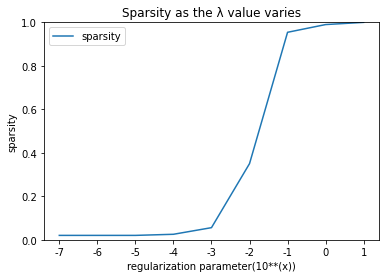

In [526]:
data = [0.02030456852791878,0.02030456852791878,0.02030456852791878,0.025380710659898477,0.05583756345177665,0.350253807106599,0.9543147208121827,0.9898477157360406,1]

spar_data = pd.DataFrame(data,columns=['sparsity'],index=['-7','-6','-5','-4','-3','-2','-1','0','1'])
spar_data.plot(ylim=(0,1),title="Sparsity as the λ value varies",xlabel="regularization parameter(10**(x))",ylabel="sparsity")


# L1 regularization

In [575]:
data = [[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.799666667,0.7934],[0.800333333,0.7931],[0.794833333,0.7941],[0.7825,0.7848],[0.770333333,0.7723],[0.504666667,0.5066],[0.504666667,0.5066],[0.504666667,0.5066],[0.504666667,0.5066]]

acc_data = pd.DataFrame(data,columns=['training_acc','valid_acc'],index=['-13', '-12', '-11', '-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','0','1','2','3'])
acc_data = acc_data*100  
# acc_data.plot(ylim=(78,82),title="training_acc / valid_acc as the λ value varies",xlabel="regularization parameter(10**(x))",ylabel="accuracy(%)")
acc_data


,training_acc,valid_acc
-13,79.966667,79.34
-12,79.966667,79.34
-11,79.966667,79.34
-10,79.966667,79.34
-9,79.966667,79.34
-8,79.966667,79.34
-7,79.966667,79.34
-6,79.966667,79.34
-5,79.966667,79.34
-4,80.033333,79.31


<AxesSubplot:title={'center':'training_acc / valid_acc as the λ value varies'}, xlabel='regularization parameter(10**(x))', ylabel='accuracy(%)'>

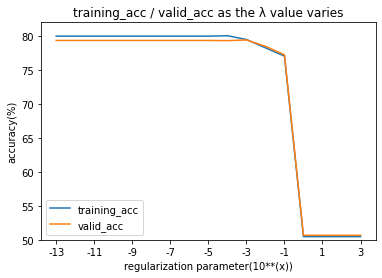

In [529]:
acc_data.plot(ylim=(50,82),title="training_acc / valid_acc as the λ value varies",xlabel="regularization parameter(10**(x))",ylabel="accuracy(%)")


In [549]:
best = [-2.1374529752461884, 0.03524201363325119, -0.409566193819046, -1.147408366203308, -3.1983697414398193, 2.2373127937316895, 0.04660528898239136, -0.06391460448503494, 0.40326058864593506, 0.9806614518165588, 0.9352928996086121, 1.7499215602874756, 0.9381601214408875, 1.1459949016571045, 1.2412736415863037, 0.942561149597168, 0.7476650476455688, 0.6054416298866272, 1.2132781744003296, 1.042837142944336, 1.0937539339065552, 1.1856623888015747, 1.2004112005233765, 0.5378308296203613, 1.0033905506134033, 0.6802520751953125, 0.9424563646316528, 1.2524241209030151, 0.6634839177131653, 0.8162801861763, 0.5624150633811951, 0.97528076171875, 1.0862410068511963, 0.5952174663543701, 0.7559213638305664, 0.9821355938911438, 1.0681849718093872, 1.2041432857513428, 0.9746144413948059, 1.1414141654968262, 0.745417058467865, 0.5901744961738586, 1.4858845472335815, 1.3751780986785889, 0.9027267694473267, 0.449990451335907, 1.1549503803253174, 1.02036452293396, 1.029532551765442, 1.1191511154174805, 1.0087060928344727, 1.0183501243591309, 0.9744364619255066, 0.8519613742828369, 0.7864987254142761, 0.5877971053123474, 0.4178668260574341, 0.8910422921180725, 0.2764532268047333, 1.058249831199646, 0.9200149178504944, -0.005890978034585714, -0.3242386281490326, 0.18313704431056976, 1.1359792947769165, 0.9898672103881836, 1.2934798002243042, 1.3384528160095215, 1.031051516532898, 0.9082083106040955, 0.9994011521339417, 0.9394256472587585, 0.6382367014884949, 0.9470136761665344, 0.9062665104866028, 1.1671420335769653, 0.7608363032341003, 0.4465183615684509, 1.0534425973892212, 0.9774027466773987, 0.9855397939682007, 0.9898672103881836, 0.9002487659454346, 0.7872539758682251, 0.9253613948822021, 1.1333889961242676, 1.395848274230957, 1.4162001609802246, 0.9898672103881836, 0.9898672103881836, 0.9521147608757019, 1.0108047723770142, 1.1598554849624634, 0.9898672103881836, 1.0364073514938354, 0.9898672103881836, 0.9612838625907898, 0.9898672103881836, 0.9898672103881836, 1.0315227508544922, 1.0420982837677002, 0.9898672103881836, 0.9619755744934082, 0.9898672103881836, 0.9842437505722046, 1.041716456413269, 0.8703706860542297, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 0.9214158058166504, 0.9898672103881836, 1.0446642637252808, 0.9261037111282349, 1.029689073562622, 0.9898672103881836, 0.9898672103881836, 1.0293831825256348, 1.1941865682601929, 0.8762432932853699, 0.9898672103881836, 0.9110915064811707, 0.898743212223053, 0.9023990631103516, 0.9860180020332336, 0.9898672103881836, 0.9821222424507141, 0.9898672103881836, 0.8933751583099365, 0.9862889051437378, 0.9898672103881836, 0.9898672103881836, 1.039786458015442, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 0.9782711863517761, 0.9898672103881836, 0.9898672103881836, 1.0406147241592407, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 1.0268259048461914, 0.9898672103881836, 0.9795757532119751, 0.9842042326927185, 0.8485689759254456, 0.9898672103881836, 1.022425889968872, 0.935609757900238, 0.9898672103881836, 0.9898672103881836, 0.7401078343391418, 0.9898672103881836, 0.9898672103881836, 0.9617042541503906, 1.0304052829742432, 0.7988356947898865, 0.9898672103881836, 1.2851742506027222, 0.5946949124336243, 0.9898672103881836, 1.0524497032165527, 0.9112399220466614, 0.9898672103881836, 1.0256561040878296, 0.8906586766242981, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 0.8777679204940796, 0.9469631314277649, 0.9725801348686218, 0.9898672103881836, 0.9218271970748901, 0.9125992059707642, 1.0400612354278564, 0.9855092763900757, 0.9498609900474548, 0.8943614363670349, 0.9548472166061401, 0.6506369709968567, 0.017652440816164017, 0.8819574117660522, 1.1883774995803833, 1.185455560684204, 1.0110042095184326, 1.454119086265564, 1.0169490575790405, 0.9898672103881836, -0.8948881030082703, 1.1866108179092407]
max_list = []
abs_list = []
abs_list2 = []

for _ in best:
    abs_list.append(abs(_))

for _ in best:
    abs_list2.append(abs(_))  
    
m = max(abs_list)
for _ in range(6):
    for i,v in enumerate(abs_list2):
        if v==m:
            max_list.append([abs_list.index(v),v])
            abs_list2.pop(i)
            m = max(abs_list2)
            break

In [550]:
max_list

[[4, 3.1983697414398193],
 [5, 2.2373127937316895],
 [0, 2.1374529752461884],
 [11, 1.7499215602874756],
 [42, 1.4858845472335815],
 [192, 1.454119086265564]]

In [553]:
xi.iloc[:,192]

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Policy_Sales_Channel_157, Length: 10000, dtype: int64

In [ ]:
# best 10**(-3)

# 1:Previously_Insured
# 2:Vehicle_Damage
# 3:dummy
# 4:Policy_Sales_Channel_160
# 5:Region_Code_3
# 6:Policy_Sales_Channel_157


# best+ (larger) 10**(-2)

# 1:Previously_Insured
# 2:Vehicle_Damage
# 3:dummy
# 4:Policy_Sales_Channel_152
# 5:Vehicle_Age_1
# 6:Region_Code_28


# best_ (smaller) 10**(-4)

# 1:Previously_Insured
# 2:Vehicle_Damage
# 3:dummy
# 4:Region_Code_3
# 5:Region_Code_34
# 6:Policy_Sales_Channel_157

# ================================

In [558]:
# -7 -1
w_list = [-2.1429789813954345, 0.03539184853434563, -0.41021502017974854, -1.1610735654830933, -3.201550006866455, 2.237358808517456, 0.04668436199426651, -0.0639968141913414, 0.4128618538379669, 0.990533709526062, 0.9450482726097107, 1.7598066329956055, 0.9478526711463928, 1.1559573411941528, 1.2510929107666016, 0.9521338939666748, 0.7571647763252258, 0.6151577830314636, 1.2233318090438843, 1.0525774955749512, 1.103891372680664, 1.1954898834228516, 1.2101705074310303, 0.5476149916648865, 1.0132111310958862, 0.6902206540107727, 0.9520546197891235, 1.2621867656707764, 0.6733326315879822, 0.8262345790863037, 0.5722401142120361, 0.9851040840148926, 1.0959798097610474, 0.6051865220069885, 0.7656323909759521, 0.9920660853385925, 1.0776245594024658, 1.2138440608978271, 0.9844473004341125, 1.1514240503311157, 0.7551719546318054, 0.5997690558433533, 1.495813012123108, 1.3851420879364014, 0.9126917719841003, 0.459703266620636, 1.164719820022583, 1.0299452543258667, 1.0394755601882935, 1.128756046295166, 1.0185083150863647, 1.0282680988311768, 0.9843069911003113, 0.8618168234825134, 0.7962404489517212, 0.5973536968231201, 0.42754918336868286, 0.900868833065033, 0.2860596776008606, 1.0681606531143188, 0.9298630356788635, -0.004895013757050037, -0.32359278202056885, 0.18541240692138672, 1.1458967924118042, 1.0, 1.3032294511795044, 1.3480905294418335, 1.0406936407089233, 0.9177553653717041, 1.0092504024505615, 0.9492946863174438, 0.6478748917579651, 0.9567228555679321, 0.9158743023872375, 1.17695152759552, 0.7706710696220398, 0.4562436640262604, 1.0634026527404785, 0.9873326420783997, 0.9953590035438538, 1.0, 0.9101097583770752, 0.7970317602157593, 0.9350837469100952, 1.1430225372314453, 1.405350685119629, 1.4249502420425415, 1.0, 1.0, 0.9618110656738281, 1.0203783512115479, 1.1693203449249268, 1.0, 1.046170949935913, 1.0, 0.9711813926696777, 1.0, 1.0, 1.0417126417160034, 1.0520081520080566, 1.0, 0.9718082547187805, 1.0, 0.994195282459259, 1.0514965057373047, 0.8802744150161743, 1.0, 1.0, 1.0, 0.9310095906257629, 1.0, 1.0544064044952393, 0.9357737898826599, 1.0393391847610474, 1.0, 1.0, 1.039136290550232, 1.2040337324142456, 0.8861086368560791, 1.0, 0.9209826588630676, 0.9086143970489502, 0.9122717976570129, 0.9959742426872253, 1.0, 0.9920585751533508, 1.0, 0.9032291769981384, 0.9962676167488098, 1.0, 1.0, 1.0495784282684326, 1.0, 1.0, 1.0, 1.0, 0.9880602955818176, 1.0, 1.0, 1.0506739616394043, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0365910530090332, 1.0, 0.9894307255744934, 0.9941495060920715, 0.858420193195343, 1.0, 1.0323768854141235, 0.9454353451728821, 1.0, 1.0, 0.7499070763587952, 1.0, 1.0, 0.9714053273200989, 1.0403341054916382, 0.8076897263526917, 1.0, 1.2937365770339966, 0.6044228672981262, 1.0, 1.0621613264083862, 0.9211335182189941, 1.0, 1.0356175899505615, 0.9005435109138489, 1.0, 1.0, 1.0, 0.8877248764038086, 0.9567320346832275, 0.982456624507904, 1.0, 0.9317005276679993, 0.9225048422813416, 1.0498380661010742, 0.9953214526176453, 0.9597471952438354, 0.9042342305183411, 0.9645105600357056, 0.6601046919822693, 0.025956537574529648, 0.8917849659919739, 1.1970735788345337, 1.1946866512298584, 1.0195266008377075, 1.4628900289535522, 1.026781678199768, 1.0, -0.8917798399925232, 1.1955270767211914]
count = 0
for _ in w_list:
    if abs(_) < 0.1:
        count += 1
#         print(_)
        
print("\n\n===============================================")
print(count/197)



0.025380710659898477


In [559]:
# -6 -1
w_list = [-2.1424699368242175, 0.03537912666797638, -0.4101541042327881, -1.159830093383789, -3.201260805130005, 2.23734712600708, 0.04667612165212631, -0.06398928910493851, 0.4119894802570343, 0.9896544814109802, 0.9441614151000977, 1.7589079141616821, 0.9469717144966125, 1.1550546884536743, 1.2502012252807617, 0.9512583613395691, 0.7562980651855469, 0.6142726540565491, 1.2224189043045044, 1.0516902208328247, 1.10298752784729, 1.194596767425537, 1.2092840671539307, 0.5467251539230347, 1.0122900009155273, 0.6893143057823181, 0.9511532783508301, 1.2612990140914917, 0.672436535358429, 0.8253284692764282, 0.5713470578193665, 0.9842098355293274, 1.0950946807861328, 0.6042794585227966, 0.7647490501403809, 0.9911572337150574, 1.0767738819122314, 1.2129629850387573, 0.9835524559020996, 1.1505484580993652, 0.7542855143547058, 0.5988970398902893, 1.4949084520339966, 1.3842363357543945, 0.9117783308029175, 0.4588204026222229, 1.1638309955596924, 1.0290770530700684, 1.0385254621505737, 1.127880334854126, 1.0175135135650635, 1.0273592472076416, 0.9834240674972534, 0.860924243927002, 0.7953545451164246, 0.5964851975440979, 0.42666929960250854, 0.8999761343002319, 0.2851860523223877, 1.0672756433486938, 0.9289647936820984, -0.0049920943565666676, -0.3236526548862457, 0.18520274758338928, 1.1449952125549316, 0.9988079071044922, 1.3023582696914673, 1.3472063541412354, 1.0398331880569458, 0.9168872833251953, 1.0081919431686401, 0.9484030604362488, 0.64699786901474, 0.9558506608009338, 0.9150026440620422, 1.1760815382003784, 0.7697771787643433, 0.4553599953651428, 1.062480092048645, 0.9863899946212769, 0.9944712519645691, 0.9988079071044922, 0.9092237949371338, 0.7961429953575134, 0.9342008233070374, 1.1421259641647339, 1.4044878482818604, 1.424155831336975, 0.9988079071044922, 0.9988079071044922, 0.9609318375587463, 1.0195050239562988, 1.168497920036316, 0.9988079071044922, 1.0451273918151855, 0.9988079071044922, 0.9702900648117065, 0.9988079071044922, 0.9988079071044922, 1.0407838821411133, 1.0510516166687012, 0.9988079071044922, 0.9709110260009766, 0.9988079071044922, 0.99322509765625, 1.0504533052444458, 0.8793491125106812, 0.9988079071044922, 0.9988079071044922, 0.9988079071044922, 0.9301384091377258, 0.9988079071044922, 1.0533602237701416, 0.934894323348999, 1.0388325452804565, 0.9988079071044922, 0.9988079071044922, 1.0380327701568604, 1.203153371810913, 0.8852126598358154, 0.9988079071044922, 0.9200852513313293, 0.9077141284942627, 0.9113746285438538, 0.9949910640716553, 0.9988079071044922, 0.9911043047904968, 0.9988079071044922, 0.9023389220237732, 0.9952607154846191, 0.9988079071044922, 0.9988079071044922, 1.0485996007919312, 0.9988079071044922, 0.9988079071044922, 0.9988079071044922, 0.9988079071044922, 0.9871876239776611, 0.9988079071044922, 0.9988079071044922, 1.049820065498352, 0.9988079071044922, 0.9988079071044922, 0.9988079071044922, 0.9988079071044922, 0.9988079071044922, 0.9988079071044922, 1.0357059240341187, 0.9988079071044922, 0.9885770678520203, 0.9931862950325012, 0.8575324416160583, 0.9988079071044922, 1.0314359664916992, 0.9445443749427795, 0.9988079071044922, 0.9988079071044922, 0.749015212059021, 0.9988079071044922, 0.9988079071044922, 0.9705248475074768, 1.039499044418335, 0.8068854212760925, 0.9988079071044922, 1.2929612398147583, 0.6035382747650146, 0.9988079071044922, 1.0612074136734009, 0.9202331304550171, 0.9988079071044922, 1.0347968339920044, 0.8996472358703613, 0.9988079071044922, 0.9988079071044922, 0.9988079071044922, 0.8867326974868774, 0.955846905708313, 0.9815573692321777, 0.9988079071044922, 0.9308040142059326, 0.9216006398200989, 1.0489705801010132, 0.9945200085639954, 0.9588465690612793, 0.9033380150794983, 0.9636315107345581, 0.6592434644699097, 0.025203436613082886, 0.8908887505531311, 1.196284294128418, 1.1938512325286865, 1.0187525749206543, 1.462094783782959, 1.0258647203445435, 0.9988079071044922, -0.8920616507530212, 1.1947184801101685]
count = 0
for _ in w_list:
    if abs(_) < 0.1:
        count += 1
#         print(_)
        
print("\n\n===============================================")
print(count/197)



0.025380710659898477


In [560]:
# -5 -1
w_list = [-2.1374529752461884, 0.03524201363325119, -0.409566193819046, -1.147408366203308, -3.1983697414398193, 2.2373127937316895, 0.04660528898239136, -0.06391460448503494, 0.40326058864593506, 0.9806614518165588, 0.9352928996086121, 1.7499215602874756, 0.9381601214408875, 1.1459949016571045, 1.2412736415863037, 0.942561149597168, 0.7476650476455688, 0.6054416298866272, 1.2132781744003296, 1.042837142944336, 1.0937539339065552, 1.1856623888015747, 1.2004112005233765, 0.5378308296203613, 1.0033905506134033, 0.6802520751953125, 0.9424563646316528, 1.2524241209030151, 0.6634839177131653, 0.8162801861763, 0.5624150633811951, 0.97528076171875, 1.0862410068511963, 0.5952174663543701, 0.7559213638305664, 0.9821355938911438, 1.0681849718093872, 1.2041432857513428, 0.9746144413948059, 1.1414141654968262, 0.745417058467865, 0.5901744961738586, 1.4858845472335815, 1.3751780986785889, 0.9027267694473267, 0.449990451335907, 1.1549503803253174, 1.02036452293396, 1.029532551765442, 1.1191511154174805, 1.0087060928344727, 1.0183501243591309, 0.9744364619255066, 0.8519613742828369, 0.7864987254142761, 0.5877971053123474, 0.4178668260574341, 0.8910422921180725, 0.2764532268047333, 1.058249831199646, 0.9200149178504944, -0.005890978034585714, -0.3242386281490326, 0.18313704431056976, 1.1359792947769165, 0.9898672103881836, 1.2934798002243042, 1.3384528160095215, 1.031051516532898, 0.9082083106040955, 0.9994011521339417, 0.9394256472587585, 0.6382367014884949, 0.9470136761665344, 0.9062665104866028, 1.1671420335769653, 0.7608363032341003, 0.4465183615684509, 1.0534425973892212, 0.9774027466773987, 0.9855397939682007, 0.9898672103881836, 0.9002487659454346, 0.7872539758682251, 0.9253613948822021, 1.1333889961242676, 1.395848274230957, 1.4162001609802246, 0.9898672103881836, 0.9898672103881836, 0.9521147608757019, 1.0108047723770142, 1.1598554849624634, 0.9898672103881836, 1.0364073514938354, 0.9898672103881836, 0.9612838625907898, 0.9898672103881836, 0.9898672103881836, 1.0315227508544922, 1.0420982837677002, 0.9898672103881836, 0.9619755744934082, 0.9898672103881836, 0.9842437505722046, 1.041716456413269, 0.8703706860542297, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 0.9214158058166504, 0.9898672103881836, 1.0446642637252808, 0.9261037111282349, 1.029689073562622, 0.9898672103881836, 0.9898672103881836, 1.0293831825256348, 1.1941865682601929, 0.8762432932853699, 0.9898672103881836, 0.9110915064811707, 0.898743212223053, 0.9023990631103516, 0.9860180020332336, 0.9898672103881836, 0.9821222424507141, 0.9898672103881836, 0.8933751583099365, 0.9862889051437378, 0.9898672103881836, 0.9898672103881836, 1.039786458015442, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 0.9782711863517761, 0.9898672103881836, 0.9898672103881836, 1.0406147241592407, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 1.0268259048461914, 0.9898672103881836, 0.9795757532119751, 0.9842042326927185, 0.8485689759254456, 0.9898672103881836, 1.022425889968872, 0.935609757900238, 0.9898672103881836, 0.9898672103881836, 0.7401078343391418, 0.9898672103881836, 0.9898672103881836, 0.9617042541503906, 1.0304052829742432, 0.7988356947898865, 0.9898672103881836, 1.2851742506027222, 0.5946949124336243, 0.9898672103881836, 1.0524497032165527, 0.9112399220466614, 0.9898672103881836, 1.0256561040878296, 0.8906586766242981, 0.9898672103881836, 0.9898672103881836, 0.9898672103881836, 0.8777679204940796, 0.9469631314277649, 0.9725801348686218, 0.9898672103881836, 0.9218271970748901, 0.9125992059707642, 1.0400612354278564, 0.9855092763900757, 0.9498609900474548, 0.8943614363670349, 0.9548472166061401, 0.6506369709968567, 0.017652440816164017, 0.8819574117660522, 1.1883774995803833, 1.185455560684204, 1.0110042095184326, 1.454119086265564, 1.0169490575790405, 0.9898672103881836, -0.8948881030082703, 1.1866108179092407]
count = 0
for _ in w_list:
    if abs(_) < 0.1:
        count += 1
#         print(_)
        
print("\n\n===============================================")
print(count/197)



0.025380710659898477


In [561]:
# -4 -1
w_list = [-2.092517976070764, 0.03453710675239563, -0.4029042422771454, -1.028528094291687, -3.170905590057373, 2.2353155612945557, 0.04567568749189377, -0.06325187534093857, 0.3160543143749237, 0.8907139897346497, 0.8458808660507202, 1.6600525379180908, 0.8506922125816345, 1.055385708808899, 1.1519089937210083, 0.855703592300415, 0.6613661050796509, 0.5171969532966614, 1.1220217943191528, 0.9539179801940918, 1.0015201568603516, 1.0952965021133423, 1.1114299297332764, 0.4472370743751526, 0.9139049053192139, 0.5893470644950867, 0.8554955124855042, 1.1636959314346313, 0.5740287899971008, 0.725232720375061, 0.4730069935321808, 0.8862096667289734, 0.9978339672088623, 0.504411518573761, 0.6675730347633362, 0.891743004322052, 0.9832550883293152, 1.1157100200653076, 0.8851977586746216, 1.0503911972045898, 0.6562846302986145, 0.5032581090927124, 1.3953394889831543, 1.2847989797592163, 0.8114460706710815, 0.3602389097213745, 1.0662654638290405, 0.9334955215454102, 0.9388079047203064, 1.0314735174179077, 0.9187604188919067, 0.9282886385917664, 0.8846879601478577, 0.7619078159332275, 0.698345422744751, 0.5008074641227722, 0.32970502972602844, 0.800891637802124, 0.18980152904987335, 0.9688093066215515, 0.8305605053901672, -0.00758709479123354, -0.33516812324523926, 0.16820462048053741, 1.0467137098312378, 0.8998641967773438, 1.2050557136535645, 1.2511507272720337, 0.9438493847846985, 0.8218263387680054, 0.9098867177963257, 0.8496884703636169, 0.5510943531990051, 0.8589275479316711, 0.8194170594215393, 1.0786924362182617, 0.6715686321258545, 0.3583422601222992, 0.9636218547821045, 0.8873705863952637, 0.8963780403137207, 0.8998641967773438, 0.8105313777923584, 0.698485791683197, 0.8373013138771057, 1.0461208820343018, 1.3101259469985962, 1.3407272100448608, 0.8998641967773438, 0.8998641967773438, 0.8641775846481323, 0.9242501854896545, 1.0743043422698975, 0.8998641967773438, 0.9464410543441772, 0.8998641967773438, 0.8712292313575745, 0.8998641967773438, 0.8998641967773438, 0.9419195652008057, 0.9519729018211365, 0.8998641967773438, 0.8727090954780579, 0.8998641967773438, 0.8942255973815918, 0.9517530202865601, 0.7807701230049133, 0.8998641967773438, 0.8998641967773438, 0.8998641967773438, 0.8345764875411987, 0.8998641967773438, 0.9548607468605042, 0.8386214375495911, 0.9400275349617004, 0.8998641967773438, 0.8998641967773438, 0.9396503567695618, 1.1051424741744995, 0.7865901589393616, 0.8998641967773438, 0.8211711645126343, 0.8090699315071106, 0.8126746416091919, 0.8960079550743103, 0.8998641967773438, 0.8921026587486267, 0.8998641967773438, 0.8037678599357605, 0.896275520324707, 0.8998641967773438, 0.8998641967773438, 0.950376570224762, 0.8998641967773438, 0.8998641967773438, 0.8998641967773438, 0.8998641967773438, 0.8893081545829773, 0.8998641967773438, 0.8998641967773438, 0.9513263702392578, 0.8998641967773438, 0.8998641967773438, 0.8998641967773438, 0.8998641967773438, 0.8998641967773438, 0.8998641967773438, 0.9372163414955139, 0.8998641967773438, 0.8895429372787476, 0.8941900730133057, 0.7589868903160095, 0.8998641967773438, 0.9328696131706238, 0.8463441133499146, 0.8998641967773438, 0.8998641967773438, 0.6511567234992981, 0.8998641967773438, 0.8998641967773438, 0.8737578988075256, 0.9407259821891785, 0.7209662795066833, 0.8998641967773438, 1.2117663621902466, 0.5066280364990234, 0.8998641967773438, 0.9631577134132385, 0.8213223218917847, 0.8998641967773438, 0.9362199306488037, 0.8007981777191162, 0.8998641967773438, 0.8998641967773438, 0.8998641967773438, 0.7878678441047668, 0.8582831621170044, 0.8828516602516174, 0.8998641967773438, 0.8321358561515808, 0.8225842714309692, 0.950988233089447, 0.8954756259918213, 0.8600294589996338, 0.8046192526817322, 0.867242693901062, 0.5671279430389404, -0.03210005164146423, 0.7932314276695251, 1.1124930381774902, 1.102613925933838, 0.9380874037742615, 1.3770333528518677, 0.9279103875160217, 0.8998641967773438, -0.9144787192344666, 1.1080549955368042]
count = 0
for _ in w_list:
    if abs(_) < 0.1:
        count += 1
#         print(_)
        
print("\n\n===============================================")
print(count/197)



0.025380710659898477


In [564]:
# -3 -1
w_list = [-1.7453589556398639, 0.02967051975429058, -0.33850938081741333, 0.0, -2.925712823867798, 2.205366849899292, 0.043950919061899185, -0.05492197349667549, -0.0, 0.007081410847604275, 0.0, 0.8175603747367859, 0.005455485079437494, 0.168447345495224, 0.2822367548942566, 0.017507893964648247, -0.0, -0.0, 0.2373335212469101, 0.12351450324058533, 0.10838104039430618, 0.21949896216392517, 0.25501585006713867, -0.016120024025440216, 0.03747297078371048, -0.0, 0.043749190866947174, 0.2936982214450836, -0.0, -0.0, -0.0, 0.021142898127436638, 0.1489385962486267, -0.0, -0.0, 0.00741597032174468, 0.29732465744018555, 0.29650574922561646, 0.06250183284282684, 0.16077105700969696, -0.0, -0.0, 0.5019559860229492, 0.43874019384384155, 0.0, -0.0, 0.20432181656360626, 0.11701998859643936, 0.0470309779047966, 0.257826566696167, 0.02304455079138279, 0.05262360721826553, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.061124060302972794, 0.07614027708768845, -0.0, 0.0, -0.4065152406692505, 0.07462813705205917, 0.16820234060287476, 0.0, 0.33641207218170166, 0.3896805942058563, 0.0947684794664383, -0.0, 0.020489156246185303, -0.0, -0.0, 0.0, 0.0, 0.19484752416610718, -0.0, -0.0, 0.06738623976707458, -0.0, 0.008718162775039673, 0.0, -0.0, -0.0, 0.0, 0.18367630243301392, 0.4823119044303894, 0.6532423496246338, 0.0, 0.0, 0.0, 0.07590676099061966, 0.2348354160785675, 0.0, 0.04920140281319618, 0.0, -0.0, 0.0, 0.0, 0.04589719697833061, 0.052008870989084244, 0.0, -0.0, 0.0, -0.0, 0.05466924235224724, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05961790680885315, 0.0, 0.04413887858390808, 0.0, 0.0, 0.04373053088784218, 0.220973402261734, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.05628105625510216, 0.0, 0.0, 0.0, 0.0, 0.005496158730238676, 0.0, 0.0, 0.05849543586373329, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04311540350317955, 0.0, -0.0, -0.0, -0.0, 0.0, 0.03888530656695366, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.006359999068081379, 0.04680531471967697, 0.0, 0.0, 0.5425604581832886, -0.0, 0.0, 0.07413313537836075, -0.0, 0.0, 0.04302515462040901, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.06883181631565094, -0.0, -0.0, -0.0, 0.0, -0.0, -0.4915080964565277, -0.0, 0.40595120191574097, 0.3009496331214905, 0.27943170070648193, 0.6632097363471985, 0.04541565105319023, 0.0, -1.0425443649291992, 0.38821494579315186]
count = 0
for _ in w_list:
    if abs(_) < 0.01:
        count += 1
#         print(_)
        
print("\n\n===============================================")
print(count/197)



0.6192893401015228


In [568]:
# -2 -1
w_list = [-1.056431172196778, 0.0, -0.0, 0.0, -1.9061294794082642, 1.8940398693084717, 0.013466856442391872, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.026139847934246063, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.23978739976882935, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.025087228044867516, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.33061620593070984, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0]
count = 0
for _ in w_list:
    if abs(_) < 0.01:
        count += 1
#         print(_)
        
print("\n\n===============================================")
print(count/197)



0.9593908629441624


In [570]:
# -1 -1
w_list = [-0.5235835354868296, 0.0, 0.0, 0.0, -0.0, 0.7098802328109741, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0]
count = 0
for _ in w_list:
    if abs(_) < 0.01:
        count += 1
#         print(_)
        
print("\n\n===============================================")
print(count/197)



0.9898477157360406


In [572]:
# 0 -1
w_list = [-0.01866720871969131, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0]
count = 0
for _ in w_list:
    if abs(_) < 0.1:
        count += 1
#         print(_)
        
print("\n\n===============================================")
print(count/197)



1.0


<AxesSubplot:title={'center':'Sparsity as the λ value varies'}, xlabel='regularization parameter(10**(x))', ylabel='sparsity'>

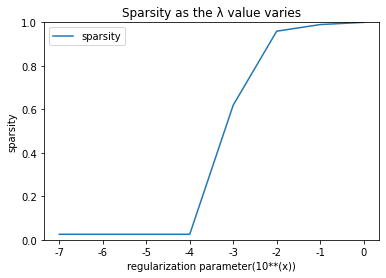

In [573]:
data = [0.025380710659898477,0.025380710659898477,0.025380710659898477,0.025380710659898477,0.6192893401015228,0.9593908629441624,0.9898477157360406,1]

spar_data = pd.DataFrame(data,columns=['sparsity'],index=['-7','-6','-5','-4','-3','-2','-1','0'])
spar_data.plot(ylim=(0,1),title="Sparsity as the λ value varies",xlabel="regularization parameter(10**(x))",ylabel="sparsity")


# Kaggle competition

In [604]:
min(table.loc[:,'Age'])

20

In [ ]:
# 85 20

In [616]:
com1 = pd.read_csv('IA2-train.csv')
com1.insert(2, "age_2", 0)
com1.insert(3, "age_3", 0)
com1.insert(4, "age_4", 0)
com1.insert(5, "age_5", 0)
com1.insert(6, "age_6", 0)
com1.insert(7, "age_7", 0)
com1.insert(8, "age_8", 0)

for i in com1.index:
    if com1.loc[i,'Age'] >= 20 and com1.loc[i,'Age'] <30:
        com1.loc[i,'age_2'] = 1
    if com1.loc[i,'Age'] >= 30 and com1.loc[i,'Age'] <40:
        com1.loc[i,'age_3'] = 1
    if com1.loc[i,'Age'] >= 40 and com1.loc[i,'Age'] <50:
        com1.loc[i,'age_4'] = 1
    if com1.loc[i,'Age'] >= 50 and com1.loc[i,'Age'] <60:
        com1.loc[i,'age_5'] = 1
    if com1.loc[i,'Age'] >= 60 and com1.loc[i,'Age'] <70:
        com1.loc[i,'age_6'] = 1
    if com1.loc[i,'Age'] >= 70 and com1.loc[i,'Age'] <80:
        com1.loc[i,'age_7'] = 1
    if com1.loc[i,'Age'] >= 80 and com1.loc[i,'Age'] <90:
        com1.loc[i,'age_8'] = 1
        
com1 = com1.drop('Age',axis=1)
com1


,dummy,Gender,age_2,age_3,age_4,age_5,age_6,age_7,age_8,Driving_License,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5996,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5997,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
5998,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [576]:
table = pd.read_csv('IA2-train.csv')
table2 = pd.read_csv('IA2-dev.csv')

df = pd.concat([table,table2])

In [588]:
df = df.reset_index(drop=True)

In [589]:
df

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,1,24,1,0,1,2630,187,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,44,1,0,1,56865,150,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,32,1,0,1,50126,188,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,56,1,0,1,45578,89,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,32,1,0,1,2630,227,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1,0,23,1,1,0,23401,186,0,0,...,0,0,0,0,0,0,0,0,0,0
15996,1,1,32,1,1,1,33131,149,0,0,...,0,0,0,0,0,0,0,0,1,0
15997,1,1,49,1,0,1,53757,272,0,0,...,0,0,0,0,0,0,0,0,0,1
15998,1,0,23,1,0,1,41954,107,0,0,...,0,0,0,0,0,0,0,0,0,0


In [617]:
table = pd.read_csv('IA2-train.csv')
table2 = pd.read_csv('IA2-dev.csv')
w = pd.Series(1, index=list(range(203)), dtype='float32')

xi = pd.concat([table,table2])
xi = df.reset_index(drop=True)

# xi = df.iloc[:,:197]

reg = 10**(-3)
learning_rate = 10**(-1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# # normalizaion (age, annual_premium, vintage)
# mean = []
# std = []

# mean.append(xi.loc[:,"Age"].mean())
# std.append(xi.loc[:,"Age"].std())

# mean.append(xi.loc[:,"Annual_Premium"].mean())
# std.append(xi.loc[:,"Annual_Premium"].std())

# mean.append(xi.loc[:,"Vintage"].mean())
# std.append(xi.loc[:,"Vintage"].std())

xi.insert(2, "age_2", 0)
xi.insert(3, "age_3", 0)
xi.insert(4, "age_4", 0)
xi.insert(5, "age_5", 0)
xi.insert(6, "age_6", 0)
xi.insert(7, "age_7", 0)
xi.insert(8, "age_8", 0)

for i in xi.index:
    if xi.loc[i,'Age'] >= 20 and xi.loc[i,'Age'] <30:
        xi.loc[i,'age_2'] = 1
    if xi.loc[i,'Age'] >= 30 and xi.loc[i,'Age'] <40:
        xi.loc[i,'age_3'] = 1
    if xi.loc[i,'Age'] >= 40 and xi.loc[i,'Age'] <50:
        xi.loc[i,'age_4'] = 1
    if xi.loc[i,'Age'] >= 50 and xi.loc[i,'Age'] <60:
        xi.loc[i,'age_5'] = 1
    if xi.loc[i,'Age'] >= 60 and xi.loc[i,'Age'] <70:
        xi.loc[i,'age_6'] = 1
    if xi.loc[i,'Age'] >= 70 and xi.loc[i,'Age'] <80:
        xi.loc[i,'age_7'] = 1
    if xi.loc[i,'Age'] >= 80 and xi.loc[i,'Age'] <90:
        xi.loc[i,'age_8'] = 1
        
xi = xi.drop('Age',axis=1)


# xi.loc[:,"Age"] = (xi.loc[:,"Age"] - xi.loc[:,"Age"].mean()) / xi.loc[:,"Age"].std()
xi.loc[:,"Annual_Premium"] = (xi.loc[:,"Annual_Premium"] - xi.loc[:,"Annual_Premium"].mean()) / xi.loc[:,"Annual_Premium"].std()
xi.loc[:,"Vintage"] = (xi.loc[:,"Vintage"] - xi.loc[:,"Vintage"].mean()) / xi.loc[:,"Vintage"].std()



train=xi.sample(frac=0.8,random_state=200) #random state is a seed value
test=xi.drop(train.index).sample(frac=1.0)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# # result y
y = train.loc[:,['Response']]
yn = y['Response'].to_numpy()

train = train.iloc[:,:203]
# dw = 0

# # print(w)
for i in range(10000):
    print("==========Epoch ",i," ===============")
    result = yn - sigmoid(np.sum(train.to_numpy() * w.to_numpy(),axis=1))
    result1 = np.expand_dims(result, axis=0)
    result1 = np.repeat(result1,repeats=203,axis=0)

    xr = np.multiply(train,result1.T)
#     print(xr.to_numpy())
    w += learning_rate*(np.sum(xr,axis=0)/12800).to_numpy()
#     print(w)
    w[1:] -= reg*learning_rate*w[1:]
#     print(abs(max(abs((np.sum(xr,axis=0)/6000).to_numpy())) - dw))
    if abs(max(abs((np.sum(xr,axis=0)/12800).to_numpy())) - dw) < 10**(-7):
        print("break is worked")
        break
    dw = max(abs((np.sum(xr,axis=0)/12800).to_numpy()))
    print(dw)

#     print(reg*learning_rate*w[1:])
print(w.tolist())

data = train.to_numpy() * w.to_numpy()
y_result = y['Response'].values.tolist()

# print(np.sum(xr.iloc[:,1:],axis=1) - xr.iloc[:,0])

predict = []
i = 0
for _ in np.sum(data,axis=1):
    if _ > 0:
        predict.append(1)
    else:
        predict.append(0)
    i += 1
    
# print(predict)
# print(y_result)
count = 0
for i in range(12800):
    if predict[i] == y_result[i]:
        count += 1

predict_acc = count / 12800
print("\n\n========predicted training accuracy========")
print(predict_acc)   

# =======================================================
# =======================================================


# table = pd.read_csv('IA2-dev.csv')

# xi = table.iloc[:,:197]

# xi.loc[:,"Age"] = (xi.loc[:,"Age"] - mean.pop(0)) / std.pop(0)
# xi.loc[:,"Annual_Premium"] = (xi.loc[:,"Annual_Premium"] - mean.pop(0)) / std.pop(0)
# xi.loc[:,"Vintage"] = (xi.loc[:,"Vintage"] - mean.pop(0)) / std.pop(0)

# result y
y = test.loc[:,['Response']]
yn = y['Response'].to_numpy()

test = test.iloc[:,:203]


data = test.to_numpy() * w.to_numpy()
y_result = y['Response'].values.tolist()

# print("\n\n")
# print(w.tolist())

predict = []
i = 0
for _ in np.sum(data,axis=1):
    if _ > 0:
        predict.append(1)
    else:
        predict.append(0)
    i += 1
    
# print(predict)
# print(y_result)
count = 0
for i in range(3200):
    if predict[i] == y_result[i]:
        count += 1

predict_acc = count / 3200
print("\n\n========predicted validation accuracy========")
print(predict_acc) 


==========Epoch  0  ===============
0.5031705278687191
==========Epoch  1  ===============
0.50286291140333
==========Epoch  2  ===============
0.502496026809077
==========Epoch  3  ===============
0.5020586602888489
==========Epoch  4  ===============
0.501537594367193
==========Epoch  5  ===============
0.5009173040158799
==========Epoch  6  ===============
0.5001796298408232
==========Epoch  7  ===============
0.499303436941596
==========Epoch  8  ===============
0.4982642733630654
==========Epoch  9  ===============
0.4970340487762234
==========Epoch  10  ===============
0.49558076204522095
==========Epoch  11  ===============
0.4938683152297311
==========Epoch  12  ===============
0.491856460441642
==========Epoch  13  ===============
0.4895009333495581
==========Epoch  14  ===============
0.4867538309318873
==========Epoch  15  ===============
0.48356428881414204
==========Epoch  16  ===============
0.47987950268488594
==========Epoch  17  ===============
0.47564611709144494
====

KeyboardInterrupt: 

In [618]:
y = pd.get_dummies(table.Vintage, prefix='Vintage')


In [619]:
result3 = pd.concat([df1,df2],axis=1)


,Vintage_10,Vintage_11,Vintage_12,Vintage_13,Vintage_14,Vintage_15,Vintage_16,Vintage_17,Vintage_18,Vintage_19,...,Vintage_290,Vintage_291,Vintage_292,Vintage_293,Vintage_294,Vintage_295,Vintage_296,Vintage_297,Vintage_298,Vintage_299
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [646]:
table = pd.read_csv('IA2-train.csv')
table2 = pd.read_csv('IA2-dev.csv')
w = pd.Series(1, index=list(range(492)), dtype='float32')

xi = pd.concat([table,table2])
xi = df.reset_index(drop=True)


xi.insert(2, "age_2", 0)
xi.insert(3, "age_3", 0)
xi.insert(4, "age_4", 0)
xi.insert(5, "age_5", 0)
xi.insert(6, "age_6", 0)
xi.insert(7, "age_7", 0)
xi.insert(8, "age_8", 0)

for i in xi.index:
    if xi.loc[i,'Age'] >= 20 and xi.loc[i,'Age'] <30:
        xi.loc[i,'age_2'] = 1
    if xi.loc[i,'Age'] >= 30 and xi.loc[i,'Age'] <40:
        xi.loc[i,'age_3'] = 1
    if xi.loc[i,'Age'] >= 40 and xi.loc[i,'Age'] <50:
        xi.loc[i,'age_4'] = 1
    if xi.loc[i,'Age'] >= 50 and xi.loc[i,'Age'] <60:
        xi.loc[i,'age_5'] = 1
    if xi.loc[i,'Age'] >= 60 and xi.loc[i,'Age'] <70:
        xi.loc[i,'age_6'] = 1
    if xi.loc[i,'Age'] >= 70 and xi.loc[i,'Age'] <80:
        xi.loc[i,'age_7'] = 1
    if xi.loc[i,'Age'] >= 80 and xi.loc[i,'Age'] <90:
        xi.loc[i,'age_8'] = 1
        
xi = xi.drop('Age',axis=1)


# xi.loc[:,"Age"] = (xi.loc[:,"Age"] - xi.loc[:,"Age"].mean()) / xi.loc[:,"Age"].std()
xi.loc[:,"Annual_Premium"] = (xi.loc[:,"Annual_Premium"] - xi.loc[:,"Annual_Premium"].mean()) / xi.loc[:,"Annual_Premium"].std()
# xi.loc[:,"Vintage"] = (xi.loc[:,"Vintage"] - xi.loc[:,"Vintage"].mean()) / xi.loc[:,"Vintage"].std()



train=xi.sample(frac=0.8,random_state=200) #random state is a seed value
test=xi.drop(train.index).sample(frac=1.0)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

y = train.loc[:,['Response']]
yn = y['Response'].to_numpy()

train = train.iloc[:,:203]

y = pd.get_dummies(train.Vintage, prefix='Vintage')
train = pd.concat([train,y],axis=1)
train = train.drop('Vintage',axis=1)


train
# # # print(w)
# for i in range(10000):
#     print("==========Epoch ",i," ===============")
#     result = yn - sigmoid(np.sum(train.to_numpy() * w.to_numpy(),axis=1))
#     result1 = np.expand_dims(result, axis=0)
#     result1 = np.repeat(result1,repeats=492,axis=0)

#     xr = np.multiply(train,result1.T)
# #     print(xr.to_numpy())
#     w += learning_rate*(np.sum(xr,axis=0)/12800).to_numpy()
# #     print(w)
#     # L2 regularization
#     w[1:] -= reg*learning_rate*w[1:]

#     # L1 regularization
# #     sign_w = sign(w)
# #     w[1:] = sign_w[1:]*max_w(w,reg,learning_rate)[1:]

#     dw = max(abs((np.sum(xr,axis=0)/12800).to_numpy()))

#     if dw < 10**(-5):
#         print("break is worked")
#         break
# # #     print(abs(max(abs((np.sum(xr,axis=0)/6000).to_numpy())) - dw))
# #     if abs(max(abs((np.sum(xr,axis=0)/12800).to_numpy())) - dw) < 10**(-7):
# #         print("break is worked")
# #         break
# #     dw = max(abs((np.sum(xr,axis=0)/12800).to_numpy()))
#     print(dw)

# #     print(reg*learning_rate*w[1:])
# print(w.tolist())

# print("\nlearning rate : ",learning_rate, "\nreg : ", reg, "\nepsilon : ", epsilon)


# data = train.to_numpy() * w.to_numpy()
# y_result = y['Response'].values.tolist()



# # print(np.sum(xr.iloc[:,1:],axis=1) - xr.iloc[:,0])

# predict = []
# i = 0
# for _ in np.sum(data,axis=1):
#     if _ > 0:
#         predict.append(1)
#     else:
#         predict.append(0)
#     i += 1
    
# # print(predict)
# # print(y_result)
# count = 0
# for i in range(12800):
#     if predict[i] == y_result[i]:
#         count += 1

# predict_acc = count / 12800
# print("\n\n========predicted training accuracy========")
# print(predict_acc)   

# # =======================================================
# # =======================================================
# # =======================================================
# # =======================================================

# y = test.loc[:,['Response']]
# yn = y['Response'].to_numpy()

# test = test.iloc[:,:203]

# y = pd.get_dummies(test.Vintage, prefix='Vintage')
# test = pd.concat([test,y],axis=1)
# test = test.drop('Vintage',axis=1)

# data = test.to_numpy() * w.to_numpy()
# y_result = y['Response'].values.tolist()

# # print("\n\n")
# # print(w.tolist())

# predict = []
# i = 0
# for _ in np.sum(data,axis=1):
#     if _ > 0:
#         predict.append(1)
#     else:
#         predict.append(0)
#     i += 1
    
# # print(predict)
# # print(y_result)
# count = 0
# for i in range(3200):
#     if predict[i] == y_result[i]:
#         count += 1

# predict_acc = count / 3200
# print("\n\n========predicted validation accuracy========")
# print(predict_acc) 

,dummy,Gender,age_2,age_3,age_4,age_5,age_6,age_7,age_8,Driving_License,...,Vintage_290,Vintage_291,Vintage_292,Vintage_293,Vintage_294,Vintage_295,Vintage_296,Vintage_297,Vintage_298,Vintage_299
0,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12796,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12797,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12798,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [647]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy as deepcopy
import math

table = pd.read_csv('IA2-train.csv')
table2 = pd.read_csv('IA2-dev.csv')
w = pd.Series(1, index=list(range(203)), dtype='float32')

xi = pd.concat([table,table2])
xi = xi.reset_index(drop=True)

# xi = df.iloc[:,:197]

reg = 10**(-3)
learning_rate = 10**(-1)
epsilon = 10**(-5)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sign(x):
    result = pd.Series(0, index=list(range(203)), dtype='float32')
    i =0
    for value in x:
        if value > 0:
            result[i] = 1
            i += 1
        elif value == 0:
            result[i] = 0
            i += 1 
        else:
            result[i] = -1
            i += 1
    return result
            
def max_w(w,reg,learning_rate):
    result = pd.Series(0, index=list(range(203)), dtype='float32')
    i =0
    for value in w:
        if (abs(value) - reg*learning_rate) > 0:
            result[i] = abs(value) - reg*learning_rate
            i += 1
        else:
            result[i] = 0
            i += 1
            
    return result

# # normalizaion (age, annual_premium, vintage)
# mean = []
# std = []

# mean.append(xi.loc[:,"Age"].mean())
# std.append(xi.loc[:,"Age"].std())

# mean.append(xi.loc[:,"Annual_Premium"].mean())
# std.append(xi.loc[:,"Annual_Premium"].std())

# mean.append(xi.loc[:,"Vintage"].mean())
# std.append(xi.loc[:,"Vintage"].std())

xi.insert(2, "age_2", 0)
xi.insert(3, "age_3", 0)
xi.insert(4, "age_4", 0)
xi.insert(5, "age_5", 0)
xi.insert(6, "age_6", 0)
xi.insert(7, "age_7", 0)
xi.insert(8, "age_8", 0)

for i in xi.index:
    if xi.loc[i,'Age'] >= 20 and xi.loc[i,'Age'] <30:
        xi.loc[i,'age_2'] = 1
    if xi.loc[i,'Age'] >= 30 and xi.loc[i,'Age'] <40:
        xi.loc[i,'age_3'] = 1
    if xi.loc[i,'Age'] >= 40 and xi.loc[i,'Age'] <50:
        xi.loc[i,'age_4'] = 1
    if xi.loc[i,'Age'] >= 50 and xi.loc[i,'Age'] <60:
        xi.loc[i,'age_5'] = 1
    if xi.loc[i,'Age'] >= 60 and xi.loc[i,'Age'] <70:
        xi.loc[i,'age_6'] = 1
    if xi.loc[i,'Age'] >= 70 and xi.loc[i,'Age'] <80:
        xi.loc[i,'age_7'] = 1
    if xi.loc[i,'Age'] >= 80 and xi.loc[i,'Age'] <90:
        xi.loc[i,'age_8'] = 1
        
xi = xi.drop('Age',axis=1)


# xi.loc[:,"Age"] = (xi.loc[:,"Age"] - xi.loc[:,"Age"].mean()) / xi.loc[:,"Age"].std()
xi.loc[:,"Annual_Premium"] = (xi.loc[:,"Annual_Premium"] - xi.loc[:,"Annual_Premium"].mean()) / xi.loc[:,"Annual_Premium"].std()
xi.loc[:,"Vintage"] = (xi.loc[:,"Vintage"] - xi.loc[:,"Vintage"].mean()) / xi.loc[:,"Vintage"].std()

for i in range(2):
    print("k fold #",i)
    train=xi.sample(frac=0.8,random_state=200) #random state is a seed value
    test=xi.drop(train.index).sample(frac=1.0)

    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)

    y = train.loc[:,['Response']]
    yn = y['Response'].to_numpy()

    train = train.iloc[:,:203]

    # dy = pd.get_dummies(train.Vintage, prefix='Vintage')
    # train = pd.concat([train,dy],axis=1)
    # train = train.drop('Vintage',axis=1)

    # # # print(w)
    for i in range(10000):
        print("==========Epoch ",i," ===============")
        result = yn - sigmoid(np.sum(train.to_numpy() * w.to_numpy(),axis=1))
        result1 = np.expand_dims(result, axis=0)
        result1 = np.repeat(result1,repeats=203,axis=0)

        xr = np.multiply(train,result1.T)
    #     print(xr.to_numpy())
        w += learning_rate*(np.sum(xr,axis=0)/12800).to_numpy()
    #     print(w)
        # L2 regularization
        w[1:] -= reg*learning_rate*w[1:]

        # L1 regularization
    #     sign_w = sign(w)
    #     w[1:] = sign_w[1:]*max_w(w,reg,learning_rate)[1:]

        dw = max(abs((np.sum(xr,axis=0)/12800).to_numpy()))

        if dw < 10**(-5):
            print("break is worked")
            break
    # #     print(abs(max(abs((np.sum(xr,axis=0)/6000).to_numpy())) - dw))
    #     if abs(max(abs((np.sum(xr,axis=0)/12800).to_numpy())) - dw) < 10**(-7):
    #         print("break is worked")
    #         break
    #     dw = max(abs((np.sum(xr,axis=0)/12800).to_numpy()))
        print(dw)


    #     print(reg*learning_rate*w[1:])
    print(w.tolist())

    print("\nlearning rate : ",learning_rate, "\nreg : ", reg, "\nepsilon : ", epsilon)


    data = train.to_numpy() * w.to_numpy()
    y_result = y['Response'].values.tolist()



    # print(np.sum(xr.iloc[:,1:],axis=1) - xr.iloc[:,0])

    predict = []
    i = 0
    for _ in np.sum(data,axis=1):
        if _ > 0:
            predict.append(1)
        else:
            predict.append(0)
        i += 1

    # print(predict)
    # print(y_result)
    count = 0
    for i in range(12800):
        if predict[i] == y_result[i]:
            count += 1

    predict_acc = count / 12800
    print("\n\n========predicted training accuracy========")
    print(predict_acc)   

    # =======================================================
    # =======================================================
    # =======================================================
    # =======================================================

    y = test.loc[:,['Response']]
    # yn = y['Response'].to_numpy()

    test = test.iloc[:,:203]

    # dy = pd.get_dummies(test.Vintage, prefix='Vintage')
    # test = pd.concat([test,dy],axis=1)
    # test = test.drop('Vintage',axis=1)

    data = test.to_numpy() * w.to_numpy()
    y_result = y['Response'].values.tolist()

    # print("\n\n")
    # print(w.tolist())

    predict = []
    i = 0
    for _ in np.sum(data,axis=1):
        if _ > 0:
            predict.append(1)
        else:
            predict.append(0)
        i += 1

    # print(predict)
    # print(y_result)
    count = 0
    for i in range(3200):
        if predict[i] == y_result[i]:
            count += 1

    predict_acc = count / 3200
    print("\n\n========predicted validation accuracy========")
    print(predict_acc) 

k fold # 0
k fold # 1


,dummy,Gender,age_2,age_3,age_4,age_5,age_6,age_7,age_8,Driving_License,...,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
0,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12796,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
12797,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12798,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# make csv

In [649]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy as deepcopy
import math

xi = pd.read_csv('IA2-test-small-v2-X.csv')
w = pd.Series([-1.9088424874427439, -0.0, -0.0, 0.7454578280448914, 0.45775777101516724, 0.37062299251556396, -0.09364780783653259, -0.27973729372024536, -0.0, -0.15241314470767975, -3.1702544689178467, 2.0612552165985107, 0.032472506165504456, -0.0, -0.0, 0.0, 0.43589916825294495, 0.044682085514068604, 0.18521688878536224, 0.4309351146221161, -0.0, -0.0, -0.0, 0.0, 0.3859806954860687, 0.14560560882091522, 0.06308192759752274, -0.0, -0.015870576724410057, -0.0, -0.0, 0.1649368554353714, -0.0, -0.0, 0.0, -0.0, 0.04664725437760353, 0.3424322009086609, -0.0, -0.0, 0.13099586963653564, 0.36020591855049133, 0.42876774072647095, 0.23419663310050964, -0.0, 0.009187857620418072, 0.0, 0.09432058781385422, 0.4657300114631653, -0.0, -0.0, 0.0, -0.0, 0.0, 0.42880919575691223, -0.0, -0.0, -0.0, 0.2133442759513855, 0.13452088832855225, 0.01973804645240307, -0.0, -0.0, -0.0, 0.03257186338305473, -0.0, -0.0, -0.0, 0.045873966068029404, -0.0, 0.0, 0.17128002643585205, 0.18725749850273132, 0.0, 0.04210805520415306, -0.0, -0.0, -0.0, 0.0, 0.0, 0.2339576929807663, -0.0, -0.0, 0.029697218909859657, -0.0, 0.04598475620150566, 0.0, -0.0, -0.0, 0.0, 0.1655757874250412, 0.30761659145355225, 0.46254056692123413, 0.0, 0.022358398884534836, 0.027709821239113808, 0.0, -0.0, 0.0, 0.016951007768511772, 0.0801110714673996, -0.0, -0.0, 0.0, 0.017711518332362175, -0.0, 0.0, -0.0, 0.035206981003284454, -0.0, 0.04095514491200447, -0.0, 0.0, 0.0, 0.01571483723819256, -0.0, 0.01908467710018158, -0.0, 0.01887552998960018, 0.019894691184163094, 0.0, 0.0, 0.06344317644834518, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.022167665883898735, 0.0, 0.05663751810789108, 0.025010274723172188, 0.0, 0.024356909096240997, 0.0, 0.0, 0.03310384601354599, 0.022260529920458794, 0.023764807730913162, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.01678968034684658, -0.0, -0.0, 0.0, -0.0, 0.0, 0.05277535319328308, -0.0, 0.0, 0.0, -0.0, -0.0, 0.027734585106372833, 0.01526526641100645, 0.05572064220905304, 0.0, 0.0, 0.3239556550979614, 0.0, 0.0, 0.03355726972222328, -0.0, -0.0, 0.03304240107536316, -0.0, 0.0, 0.0, 0.0, -0.0, 0.05058708414435387, 0.0, -0.0, -0.0, -0.0, 0.09610792249441147, -0.0, 0.0, -0.0, 0.15663249790668488, -0.0, -0.14790385961532593, 0.02165551669895649, 0.16436852514743805, 0.1499006301164627, 0.3680397570133209, 0.4686468541622162, 0.0, 0.0, -0.5885348916053772, 0.35064390301704407, -0.0, 0.10642694681882858, 0.1726107895374298, 0.31635770201683044, 0.061969250440597534, -0.0, 0.08436062932014465, 0.09173165261745453, -0.0, 0.21015852689743042, 0.14881008863449097, 0.09053470939397812, 0.0, -0.0, -0.0, -0.0, 0.024178797379136086, 0.09512972086668015, -0.0, 0.19906286895275116, -0.0, -0.0, 0.0, 0.2758443355560303, 0.13928848505020142, -0.0, 0.09885652363300323, 0.028814295306801796, 0.0, 0.22430634498596191, 0.11526209115982056, 0.1395779848098755, 0.263950377702713, 0.02001195400953293, 0.04510168731212616, 0.31508585810661316, -0.0, -0.0, 0.0, 0.13948920369148254, -0.0, -0.0, 0.0907684713602066, -0.0, 0.054250989109277725, -0.0, 0.05464679002761841, 0.2141409069299698, 0.014235084876418114, 0.07739043235778809, 0.0, -0.0, 0.0, -0.0, 0.17490293085575104, 0.0, -0.0, 0.13562190532684326, 0.05124368146061897, -0.0, -0.0, 0.051901448518037796, -0.0, -0.0, -0.0, 0.0, 0.1229943111538887, 0.021732350811362267, 0.0, 0.21317560970783234, -0.0, 0.05553996562957764, 0.0, 0.0, 0.08601141721010208, 0.0, 0.059281423687934875, -0.0, 0.2930622100830078, 0.024195168167352676, 0.08079266548156738, 0.05827440693974495, 0.07009689509868622, -0.0, -0.0, -0.0, 0.31596314907073975, 0.20215226709842682, -0.0, 0.05186961591243744, 0.003089824691414833, 0.14712190628051758, 0.06511904299259186, -0.0, 0.19568441808223724, 0.30803385376930237, 0.0, 0.17598412930965424, -0.0, -0.0, -0.0, -0.0, 0.08041690289974213, -0.0, -0.0, 0.0, 0.2618272602558136, -0.0, -0.0, 0.09406199306249619, -0.0, 0.11844774335622787, -0.0, 0.1413867026567459, 0.17128518223762512, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.09642356634140015, 0.11377529054880142, 0.07385037839412689, 0.25411468744277954, -0.0, -0.0, 0.20551854372024536, -0.0, 0.2351721227169037, 0.10455448925495148, -0.0, 0.05205750837922096, 0.016150128096342087, 0.15163610875606537, 0.04210837185382843, 0.014433804899454117, -0.0, 0.0, 0.01925019547343254, -0.0, 0.04172338545322418, -0.0, -0.0, -0.0, 0.10132016986608505, -0.0, 0.24794332683086395, 0.13490957021713257, 0.08066198974847794, -0.0, 0.1404334455728531, -0.0, 0.1561555564403534, -0.0, -0.0, -0.0, 0.055070046335458755, -0.0, 0.1671922653913498, -0.0, -0.0, -0.0, 0.15468209981918335, -0.0, -0.0, -0.0, 0.010215714573860168, -0.0, 0.03641369193792343, 0.2694970369338989, -0.0, 0.11495823413133621, -0.0, 0.06147228181362152, 0.14876873791217804, -0.0, 0.1789783388376236, -0.0, 0.04972447082400322, -0.0, 0.21787357330322266, 0.04182616248726845, -0.0, -0.0, 0.11962471902370453, -0.0, 0.032850876450538635, 0.2565419673919678, 0.14036548137664795, 0.11230526119470596, -0.0, 0.06692300736904144, 0.0, 0.0, 0.05564823001623154, -0.0, 0.1734350174665451, -0.0, 0.2938414216041565, -0.0, 0.2100573182106018, -0.0, 0.07519135624170303, -0.0, 0.033599160611629486, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.22248400747776031, -0.0, 0.107390858232975, -0.0, -0.0, 0.0, -0.0, 0.20292928814888, -0.0, 0.06288792937994003, 0.0014750357950106263, 0.022120419889688492, -0.0, 0.11916373670101166, -0.0, 0.2550279498100281, -0.0, -0.0, 0.06876233220100403, -0.0, 0.026112742722034454, 0.0567428357899189, 0.3312736749649048, -0.0, 0.1352405697107315, 0.05534947291016579, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.04079261049628258, 0.18337808549404144, 0.022835392504930496, 0.0, 0.14246036112308502, 0.03278004378080368, 0.13122500479221344, -0.0, 0.08725716918706894, 0.13787178695201874, -0.0, -0.0, -0.0, 0.06991132348775864, -0.0, 0.1186905950307846, -0.0, 0.04846988990902901, -0.0, -0.0, -0.0, -0.0, 0.16791799664497375, 0.2151118665933609, 0.23356813192367554, -0.0, -0.0, 0.2697528004646301, 0.0, -0.0, 0.0, 0.0, 0.08018739521503448, -0.0, -0.0, 0.03085131011903286, -0.0, -0.0, -0.0, 0.08481419086456299, 0.0, 0.15148106217384338, 0.035769931972026825, 0.05377620831131935, 0.1514773666858673], index=list(range(492)), dtype='float32')

# xi = df.iloc[:,:197]

reg = 10**(-3)
learning_rate = 10**(-1)
epsilon = 10**(-5)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sign(x):
    result = pd.Series(0, index=list(range(203)), dtype='float32')
    i =0
    for value in x:
        if value > 0:
            result[i] = 1
            i += 1
        elif value == 0:
            result[i] = 0
            i += 1 
        else:
            result[i] = -1
            i += 1
    return result
            
def max_w(w,reg,learning_rate):
    result = pd.Series(0, index=list(range(203)), dtype='float32')
    i =0
    for value in w:
        if (abs(value) - reg*learning_rate) > 0:
            result[i] = abs(value) - reg*learning_rate
            i += 1
        else:
            result[i] = 0
            i += 1
            
    return result

# # normalizaion (age, annual_premium, vintage)
# mean = []
# std = []

# mean.append(xi.loc[:,"Age"].mean())
# std.append(xi.loc[:,"Age"].std())

# mean.append(xi.loc[:,"Annual_Premium"].mean())
# std.append(xi.loc[:,"Annual_Premium"].std())

# mean.append(xi.loc[:,"Vintage"].mean())
# std.append(xi.loc[:,"Vintage"].std())

xi.insert(2, "age_2", 0)
xi.insert(3, "age_3", 0)
xi.insert(4, "age_4", 0)
xi.insert(5, "age_5", 0)
xi.insert(6, "age_6", 0)
xi.insert(7, "age_7", 0)
xi.insert(8, "age_8", 0)

for i in xi.index:
    if xi.loc[i,'Age'] >= 20 and xi.loc[i,'Age'] <30:
        xi.loc[i,'age_2'] = 1
    if xi.loc[i,'Age'] >= 30 and xi.loc[i,'Age'] <40:
        xi.loc[i,'age_3'] = 1
    if xi.loc[i,'Age'] >= 40 and xi.loc[i,'Age'] <50:
        xi.loc[i,'age_4'] = 1
    if xi.loc[i,'Age'] >= 50 and xi.loc[i,'Age'] <60:
        xi.loc[i,'age_5'] = 1
    if xi.loc[i,'Age'] >= 60 and xi.loc[i,'Age'] <70:
        xi.loc[i,'age_6'] = 1
    if xi.loc[i,'Age'] >= 70 and xi.loc[i,'Age'] <80:
        xi.loc[i,'age_7'] = 1
    if xi.loc[i,'Age'] >= 80 and xi.loc[i,'Age'] <90:
        xi.loc[i,'age_8'] = 1
        
xi = xi.drop('Age',axis=1)


# xi.loc[:,"Age"] = (xi.loc[:,"Age"] - xi.loc[:,"Age"].mean()) / xi.loc[:,"Age"].std()
xi.loc[:,"Annual_Premium"] = (xi.loc[:,"Annual_Premium"] - xi.loc[:,"Annual_Premium"].mean()) / xi.loc[:,"Annual_Premium"].std()
# xi.loc[:,"Vintage"] = (xi.loc[:,"Vintage"] - xi.loc[:,"Vintage"].mean()) / xi.loc[:,"Vintage"].std()

dy = pd.get_dummies(xi.Vintage, prefix='Vintage')
xi = pd.concat([xi,dy],axis=1)
xi = xi.drop('Vintage',axis=1)

# xi

data = xi.to_numpy() * w.to_numpy()
#     y_result = y['Response'].values.tolist()

# print("\n\n")
# print(w.tolist())

predict = []
i = 0
for _ in np.sum(data,axis=1):
    if _ > 0:
        predict.append(1)
    else:
        predict.append(0)
    i += 1

print(len(predict))
result = pd.Series(predict, index=list(range(25000)), dtype='int')
# result
result.to_csv('try5.csv')


25000
